# **INTERDISCIPLINARY ADVANCED DATA SCIENCE AND ARTIFICIAL INTELLIGENCE APPROACH FOR SOCIO-ECONOMIC RESILIENCE: INTEGRATING MACROECONOMIC INDICATORS, SOCIAL ACCOUNTING MATRICES AND UN SDG DATA IN KENYA**

*Author: Seana Mutinda Zeyhle*  
*University of North Texas*
*Course: INSD 5940 – Interdisciplinary Capstone Experience*  
*Advisor: Dr. Laura Vu*  


### **Modeling Kenya’s Socio-Economic Resilience through Social Accounting Matrix (SAM), World Bank (WDI) and UN SDG Indicators**


## 1. Introduction

Socio-conomic resilience, the capacity of an economy to absorb shocks, adapt, and recover is central to sustainable development and policymaking. In the context of Kenya, challenges such as high taxation, costly business permits, youth underemployment and vulnerability to external trade shocks have raised concerns about long-term inclusivity and growth. Despite significant progress in financial inclusion, ICT diffusion, and renewable energy adoption, structural barriers continue to limit equitable development outcomes.

This capstone project integrates **three interdisciplinary data sources** to develop a comprehensive framework for analyzing and forecasting Kenya’s economic resilience:
1. *Social Accounting Matrix (SAM)* for Kenya (2021)
2. *World Bank Macroeconomic Indicators* (2010–2024)
3. *UN Sustainable Development Goals (SDG) indicators*

The study leverages **machine learning (ML)** and **input–output modeling** to explore how fiscal, labor, and sectoral factors interact under policy and market shocks.

By combining **economics, data science, and public policy**, this research contributes actionable insights for decision-makers at national and regional levels, including ministries, development partners, and private-sector actors. The outputs are designed to inform both **policy interventions** (e.g., permit reform, youth employment strategies) and **investment planning** (e.g., sectoral diversification, green growth pathways).


## 2. Research Objectives

The overarching goal of this study is to **model Kenya’s economic resilience** by integrating macroeconomic, structural, and sustainability data sources within a unified analytical framework.

### **Specific Objectives**
1. **Quantify the impact** of taxation and business permit costs on investment flows, business entry, and sectoral productivity using time-series analysis of World Bank indicators.
2. **Forecast key macroeconomic outcomes** (GDP, unemployment, poverty) through machine-learning models informed by WDI, SDG, and trade variables.
3. **Evaluate the role of youth unemployment and human capital** in shaping inclusive growth trajectories, emphasizing advanced education attainment.
4. **Simulate structural shocks** (e.g., trade disruptions, tax changes) using the 2021 Kenya SAM to estimate cross-sectoral and household effects.
5. **Assess Kenya’s progress toward SDG targets** (notably Goals 1, 4, 8, 9, and 13) in relation to observed and forecasted macro-trends.
6. **Provide policy recommendations** that promote resilience, reduce vulnerability, and align with Kenya’s Vision 2030 and SDG commitments.


## 3. Interdisciplinary Approach

This project integrates methods and theories from multiple disciplines:

- **Economics:** for macro-structural modeling (SAM, GDP, taxation, labor).  
- **Data Science & AI:** for predictive analytics, forecasting, and explainability (ML models such as XGBoost, LSTM, Prophet).  
- **Public Policy & Development Studies:** for interpreting results within Kenya’s institutional and SDG context.  
- **Sustainability Science:** for linking quantitative outcomes to social and environmental indicators.

The interdisciplinary approach ensures that findings are not only statistically valid but also **policy-relevant**, offering actionable insights for decision-makers in government, development agencies, and industry.


## 4. Expected Outcomes

1. A **clean, integrated dataset** combining SAM (2021), World Bank (2010–2024), and UN SDG data for Kenya.  
2. **Machine learning forecasts** of GDP, poverty, and employment trends under alternative policy scenarios.  
3. **SAM-based simulations** illustrating how shocks in taxation, trade, or investment ripple through the economy.  
4. **Policy briefs and visual dashboards** to communicate results to policymakers and business stakeholders.  
5. A **reproducible Jupyter notebook** demonstrating how interdisciplinary analytics can guide national economic planning.





## Notebook prerequisites

The code uses:
- pandas, numpy: data handling
- requests: WDI / Comtrade HTTP calls
- scipy: linear algebra (inverse)
- matplotlib / seaborn: plots


In [ ]:
# !pip install pandas numpy requests scipy matplotlib seaborn pycountry

# Environment and Global Setup

This cell serves as the global configuration block, handling:

1. Library imports (used in multiple phases — WDI, SAM, and SDG).

2. Display settings (wide dataframes, readable output).

3. Reusable constants and paths (COUNTRY, START_YEAR, END_YEAR, directories).

In [ ]:
import os
import io
import json
import math
import requests
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# Configuation
COUNTRY = "KEN"  # ISO3 country code for World Bank API
START_YEAR = 2010
END_YEAR = 2024

# WDI indicators to fetch (compact list from your brief)
WDI_INDICATORS = {
    "NY.GDP.MKTP.CD": "GDP_current_USD",
    "NY.GDP.PCAP.CD": "GDP_per_capita",
    "FP.CPI.TOTL.ZG": "CPI_inflation_pct",
    "SL.UEM.TOTL.ZS": "Unemployment_pct",
    "SL.UEM.NEET.ZS": "Youth_NEET_pct",
    "BX.TRF.PWKR.CD.DT": "Remittances_USD",
    "BX.KLT.DINV.WD.GD.ZS": "FDI_pct_GDP",
    "GC.TAX.TOTL.GD.ZS": "TaxRev_pct_GDP",
    "IC.BUS.NREG": "NewBusiness_regs",
    "IT.NET.USER.ZS": "Internet_users_pct",
    "EG.ELC.RNEW.ZS": "Renewable_elec_pct"
}

# Paths (create these directories)
RAW_DIR = "data/raw"
META_DIR = "data/metadata"
OUTPUT_DIR = "output"
os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(META_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Expected SAM CSV path - update if needed
SAM_CSV_PATH = os.path.join(RAW_DIR, "sam2021_matrix.csv")


# **PHASE 1: WORLD BANK INDICATORS (WDI) MACRO-ECONOMIC AND FINAINCIAL ANALYSIS**



### **Overview**
The first analytical phase of this study focuses on **Kenya’s macroeconomic and financial landscape**, using data from the **World Bank’s World Development Indicators (WDI)**.  
This phase establishes the **empirical foundation** for the resilience framework by examining how key economic variables such as GDP, inflation, unemployment, FDI, and digital adoption have evolved over time and interacted with one another.

The objective is twofold:
1. To **analyze Kenya’s macro-structural trends** between 2010 and 2024, identifying major shifts, cycles, and anomalies that influence economic resilience.  
2. To **derive clean, interpretable, and statistically validated datasets** that can be integrated with the Social Accounting Matrix (SAM) and Sustainable Development Goal (SDG) indicators in later phases.

### **Methodological Approach**
Phase 1 applies a structured data-science workflow encompassing three main steps:

1. **Data Acquisition (Step 1):**  
   - Automated extraction of time-series indicators from the World Bank API.  
   - Validation of metadata (indicator codes, units, and coverage).  
   - Creation of a unified dataset (`wdi_kenya_2010_2024.csv`).

2. **Data Cleaning and Preparation (Step 2):**  
   - Standardization of years and indicator formats.  
   - Handling of missing values using conservative imputation methods only when statistically justified.  
   - Computation of derived indicators (e.g., GDP per capita, growth rates).  
   - Statistical summaries to verify completeness and consistency.

3. **Descriptive and Exploratory Analysis (Step 3):**  
   - Visualization of macroeconomic trajectories and volatility patterns.  
   - Correlation and dimensionality reduction (PCA) to identify core economic drivers.  
   - Detection of potential outliers or structural breaks (e.g., COVID-19 impact).

### **Expected Outcomes**
- A **clean, reliable macroeconomic dataset** covering 2010–2024 suitable for quantitative forecasting.  
- **Descriptive insights** into Kenya’s economic dynamics — including the relationships between trade, digitalization, and employment.  
- A **set of validated features** (GDP, FDI, inflation, remittances, internet usage, etc.) that will serve as explanatory variables in subsequent predictive modeling and SAM-based simulations.

### **Relevance to Economic Resilience**
1. This phase provides the **temporal dimension** of Kenya’s resilience framework capturing growth patterns, policy cycles, and external vulnerabilities.  
2. It complements the **structural dimension** (Phase 2: SAM) and **sustainability dimension** (Phase 3: SDG) to create a unified, interdisciplinary analytical model capable of linking short-term shocks to long-term development outcomes.


It is important to note that nine key indictors were extracted: inflation (CPI), GDP (USD), unemployment, remittances, population, exports, foreign direct investments, new business registration and internet use.


### **STEP 1.1 - WDI DATASET ACQUISISTION (2010–2024)**

This cell imports libraries and sets global variables (country, years, WDI codes, indicators, paths).

**Purpose:** To extract raw indicator data from the World Bank API for Kenya (2010–2024).

**Outcome:**

*   A CSV file containing raw, unprocessed data, including NaN values for missing years.
*  All API handling, paging, and retry logic are performed here.
*  Data integrity is preserved exactly as retrieved.


**Key Features:**

1. Full-year coverage: Retrieves data for all years between 2010 and 2024.

2. Automatic retry mechanism with up to three retry attempts (retries=3 by default) and five-second delay between retries (delay=5 seconds).

6. Pagination handling: Retrieves all pages of data returned by the World Bank API.

7. Sorted, complete index: Missing years are retained as NaN for later imputation.

8. Reproducibility: Results are saved as a CSV file named
data/wdi_ke_2010_2024.csv.


### **STEP 1.1 - WDI DATASET ACQUISITION (2010–2024) API INTEGRATION**

In [ ]:
# STEP 1.1: WDI Dataset Acquisition(2010–2024) API INTEGRATION

import os
import time
import requests
import pandas as pd
from tqdm import tqdm

# Configuration
COUNTRY = "KE"  # Kenya
START_YEAR = 2010
END_YEAR = 2024
RAW_DIR = "./data"
os.makedirs(RAW_DIR, exist_ok=True)

# Selected indicators
WDI_INDICATORS = {
    "NY.GDP.MKTP.CD": "GDP_current_USD",
    "SP.POP.TOTL": "Population_total",
    "NE.EXP.GNFS.CD": "Exports_current_USD",
    "FP.CPI.TOTL.ZG": "CPI_inflation_pct",
    "SL.UEM.TOTL.ZS": "Unemployment_pct",
    "IC.BUS.NREG": "New_business_registrations",
    "BX.KLT.DINV.WD.GD.ZS": "FDI_pct_GDP",
    "BX.TRF.PWKR.DT.GD.ZS": "Remittances_pct_GDP",
    "IT.NET.USER.ZS": "Internet_users_pct",
}

def fetch_indicator(country, code, short_name, start, end, retries=3, delay=5):
    """
    Fetch a WDI indicator for the specified country and year range.
    Automatically retries in case of temporary network or API errors.
    """
    records = []
    page = 1
    attempt = 0

    while True:
        url = (
            f"http://api.worldbank.org/v2/country/{country}/indicator/{code}"
            f"?date={start}:{end}&format=json&per_page=1000&page={page}"
        )
        try:
            response = requests.get(url, timeout=20)
            if response.status_code != 200:
                raise requests.RequestException(f"HTTP {response.status_code}")

            data = response.json()
            if len(data) < 2 or not data[1]:
                break

            for entry in data[1]:
                if entry["value"] is not None:
                    records.append({"year": int(entry["date"]), short_name: entry["value"]})

            if page >= data[0].get("pages", 1):
                break
            page += 1
            attempt = 0  # reset retry counter after a successful page
        except requests.RequestException as e:
            attempt += 1
            if attempt <= retries:
                print(f"Retrying {code} (attempt {attempt}/{retries}) after error: {e}")
                time.sleep(delay)
                continue
            else:
                print(f"Failed to fetch {code} after {retries} attempts. Skipping.")
                break

    if not records:
        print(f"No data returned for {code}")
        return pd.DataFrame()

    df = (
        pd.DataFrame(records)
        .drop_duplicates(subset=["year"])
        .set_index("year")
        .sort_index()
    )
    return df


def download_wdi_indicators(country, indicators, start, end, save_csv=True):
    """
    Download multiple WDI indicators and merge them into one DataFrame.
    Includes retry handling for robustness during download.
    """
    frames = []
    for code, name in tqdm(indicators.items(), desc="Fetching WDI data"):
        df = fetch_indicator(country, code, name, start, end)
        if not df.empty:
            frames.append(df)

    if not frames:
        raise RuntimeError("No WDI data downloaded. Verify API access or indicator codes.")

    merged = pd.concat(frames, axis=1).sort_index()
    merged = merged.reindex(pd.Index(range(start, end + 1), name="year"))

    if save_csv:
        output_path = os.path.join(RAW_DIR, f"wdi_{country.lower()}_{start}_{end}.csv")
        merged.to_csv(output_path)
        print(f"Saved WDI snapshot to: {output_path}")

    return merged


# Execute download
wdi_df = download_wdi_indicators(COUNTRY, WDI_INDICATORS, START_YEAR, END_YEAR)
print("Years retrieved:", wdi_df.index.min(), "to", wdi_df.index.max())
print(wdi_df.tail())


Fetching WDI data: 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

Saved WDI snapshot to: ./data/wdi_ke_2010_2024.csv
Years retrieved: 2010 to 2024
      GDP_current_USD  Population_total  Exports_current_USD  CPI_inflation_pct  Unemployment_pct  New_business_registrations  FDI_pct_GDP  Remittances_pct_GDP  Internet_users_pct
year                                                                                                                                                                               
2020     1.006575e+11          52217334         9.705265e+09           5.405162             5.619                     49037.0    -0.005368             3.087631                 NaN
2021     1.097037e+11          53219166         1.181462e+10           6.107936             5.693                         NaN     0.382594             3.436612                 NaN
2022     1.144490e+11          54252461         1.395358e+10           7.659863             5.707                         NaN     0.691646             3.547179                 NaN
2023     1.080386e+

### **STEP 1.2 - DATA CLEANING AND PREPARATION**

**Purpose:** To ensure the dataset is analytically ready for exploratory data analysis (EDA) and integration with SDG and SAM data.

**Outcome**
*   A validated dataset covering 2010–2024 with standardized naming clear handling of missing data, and full traceability to the raw source.
*   This version is ready for exploratory data analysis and integration with SDG and SAM datasets.

Main tasks included:
- Inspecting completeness and removing duplicate or inconsistent columns.  
- Replacing implausible or negative values with `NaN`.  
- Interpolating continuous indicators (e.g., CPI inflation, Internet users) to fill short gaps.  
- Flagging sparse indicators (fewer than six valid years) for exclusion or proxy estimation.  
- Saving the cleaned output as `wdi_ke_2010_2024_clean.csv`.

Dataset shape: (15, 9)

Missing values per indicator:
 GDP_current_USD                0
Population_total               0
Exports_current_USD            0
CPI_inflation_pct              1
Unemployment_pct               0
New_business_registrations    11
FDI_pct_GDP                    0
Remittances_pct_GDP            0
Internet_users_pct             3
dtype: int64

Descriptive statistics:



,count,mean,std,min,25%,50%,75%,max
GDP_current_USD,15.0,8.370200e+10,2.545865e+10,4.540562e+10,6.497862e+10,8.203651e+10,1.043480e+11,1.244987e+11
Population_total,15.0,4.910536e+07,4.678338e+06,4.159857e+07,4.551912e+07,4.919777e+07,5.271825e+07,5.643294e+07
Exports_current_USD,15.0,1.124209e+10,1.403996e+09,9.137589e+09,1.027442e+10,1.120318e+10,1.168935e+10,1.395358e+10
CPI_inflation_pct,14.0,7.010325e+00,2.437995e+00,4.489789e+00,5.483245e+00,6.439702e+00,7.668513e+00,1.402249e+01
Unemployment_pct,15.0,4.006133e+00,1.342217e+00,2.682000e+00,2.763000e+00,3.541000e+00,5.500500e+00,5.707000e+00
New_business_registrations,4.0,4.330900e+04,4.709887e+03,3.773300e+04,4.099700e+04,4.323300e+04,4.554500e+04,4.903700e+04
FDI_pct_GDP,15.0,1.020992e+00,8.695042e-01,-5.368454e-03,4.301664e-01,6.916460e-01,1.421523e+00,3.094711e+00
Remittances_pct_GDP,15.0,2.707720e+00,7.581361e-01,1.510292e+00,2.131104e+00,2.391951e+00,3.262122e+00,4.015970e+00
Internet_users_pct,12.0,1.826333e+01,8.990757e+00,7.200000e+00,1.237500e+01,1.659395e+01,2.029220e+01,3.500000e+01


Sparse indicators (to exclude or impute using proxies): ['New_business_registrations']

Remaining missing values:
 GDP_current_USD                0
Population_total               0
Exports_current_USD            0
CPI_inflation_pct              0
Unemployment_pct               0
New_business_registrations    11
FDI_pct_GDP                    1
Remittances_pct_GDP            0
Internet_users_pct             0
dtype: int64
Cleaned dataset saved to: ./data/wdi_ke_2010_2024_clean.csv


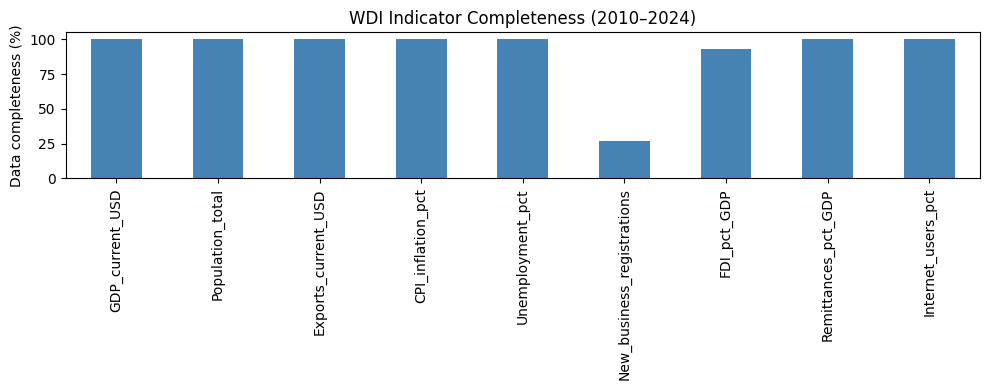

In [ ]:
# STEP 1.2: WDI Data Cleaning and Preparation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset if not already in memory
wdi_df = pd.read_csv("./data/wdi_ke_2010_2024.csv", index_col="year")

# 1. Initial inspection
print("Dataset shape:", wdi_df.shape)
print("\nMissing values per indicator:\n", wdi_df.isna().sum())
print("\nDescriptive statistics:\n")
display(wdi_df.describe().T)

# 2. Detect duplicated columns or inconsistent naming
wdi_df.columns = wdi_df.columns.str.strip()
wdi_df = wdi_df.loc[:, ~wdi_df.columns.duplicated()]

# 3. Handle impossible or negative values (economic sanity check)
numeric_cols = wdi_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    wdi_df.loc[wdi_df[col] < 0, col] = np.nan  # negative values replaced with NaN

# 4. Interpolation for continuous indicators (time-consistent variables)
interpolate_cols = ["CPI_inflation_pct", "Internet_users_pct"]
for col in interpolate_cols:
    if col in wdi_df.columns:
        wdi_df[col] = wdi_df[col].interpolate(method="linear", limit_direction="both")

# 5. Drop or flag sparse indicators (e.g., very few valid years)
min_valid_years = 6
sparse_cols = [col for col in wdi_df.columns if wdi_df[col].count() < min_valid_years]
print("Sparse indicators (to exclude or impute using proxies):", sparse_cols)

# Optional: Drop sparse columns
# wdi_df = wdi_df.drop(columns=sparse_cols)

# 6. Recheck completeness
print("\nRemaining missing values:\n", wdi_df.isna().sum())

# 7. Save cleaned version
output_clean_path = "./data/wdi_ke_2010_2024_clean.csv"
wdi_df.to_csv(output_clean_path)
print(f"Cleaned dataset saved to: {output_clean_path}")

# 8. Optional: visualize completeness
plt.figure(figsize=(10, 4))
(wdi_df.notna().sum() / len(wdi_df) * 100).plot(kind="bar", color="steelblue")
plt.ylabel("Data completeness (%)")
plt.title("WDI Indicator Completeness (2010–2024)")
plt.tight_layout()
plt.show()


### **STEP 1.3 - EXPLORATORY DATA ANALYSIS (EDA)**

The Exploratory Data Analysis (EDA) stage focused on examining Kenya’s macroeconomic performance using the World Development Indicators (WDI) dataset covering the period **2010–2024**.  
This step served to identify statistical patterns, assess data consistency, and reveal relationships among key variables prior to integration with SDG and SAM datasets.

**Objectives**
1. Explore temporal trends and cyclical behavior across macroeconomic indicators.  
2. Quantify the stability, volatility, and direction of economic growth.  
3. Examine inter-variable relationships through correlation and principal component analysis (PCA).  
4. Detect potential outliers and assess data integrity prior to modeling.

**Analytical Approach**


- The analysis combined descriptive visualization, statistical computation, and dimensionality techniques implemented in Python.  
- Key indicators analyzed included GDP (current US$), FDI (% GDP), exports, inflation, unemployment, remittances, and internet usage.  



### **STEP 1.3 (A) - TEMPORAL TREND ANALYSIS**  
   - Yearly line plots were generated for each macroeconomic variable to observe growth trajectories, policy-related fluctuations, and external shocks.  
   - The results showed a **steady increase in GDP and population**, with temporary slowdowns around **2020–2021**, coinciding with COVID-19 impacts.

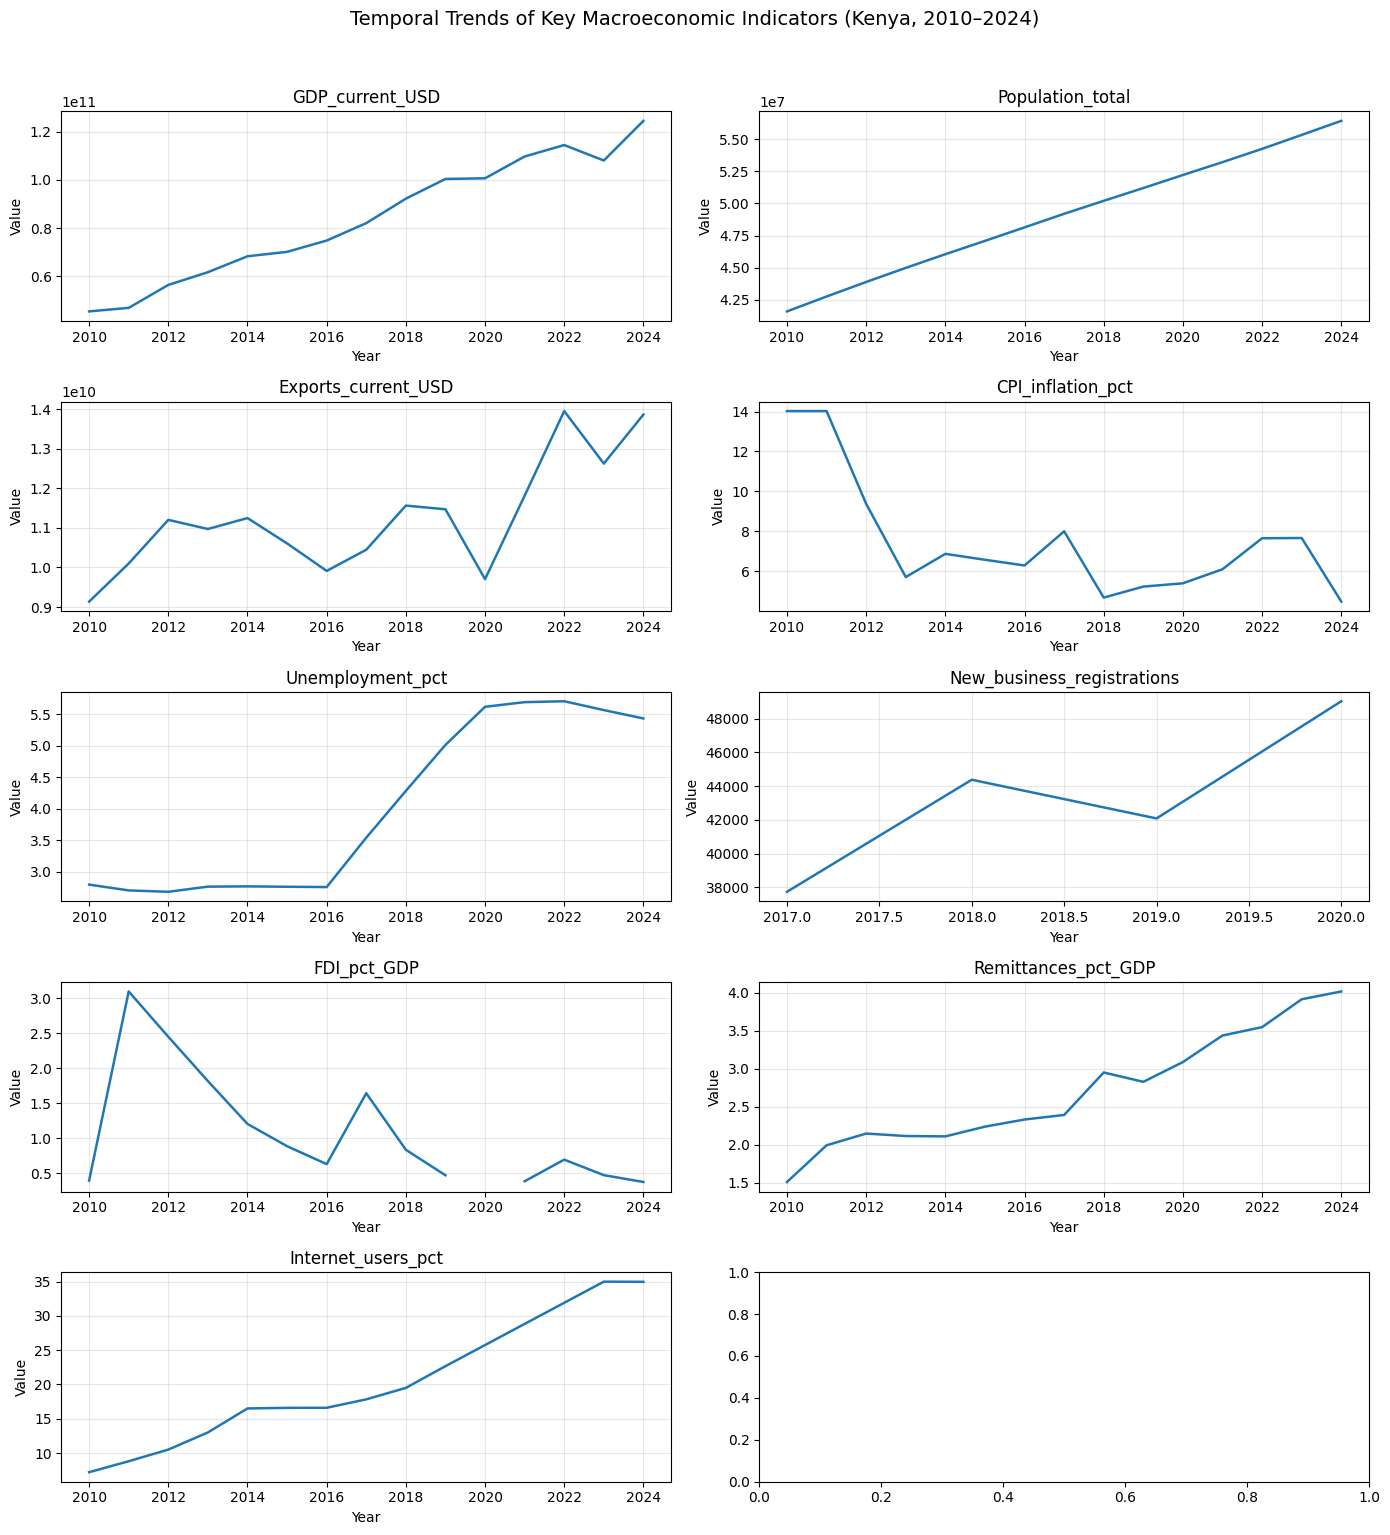

In [ ]:
# STEP 1.3: Exploratory Data Analysis (EDA)

import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore


# STEP 1.3 (A) - Temporal Trends
n_cols = len(wdi_df.columns)
n_rows = int(np.ceil(n_cols / 2))

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(wdi_df.columns):
    wdi_df[col].plot(ax=axes[i], title=col, linewidth=1.8)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Value")
    axes[i].grid(alpha=0.3)

plt.suptitle("Temporal Trends of Key Macroeconomic Indicators (Kenya, 2010–2024)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### **STEP 1.3 (B) - GROWTH RATE ANALYSIS**  
   - Year-on-year percentage changes were calculated to measure volatility and momentum across indicators.  
   - GDP and exports exhibited **positive but variable growth**, while inflation and unemployment rates displayed mild cyclical fluctuations.


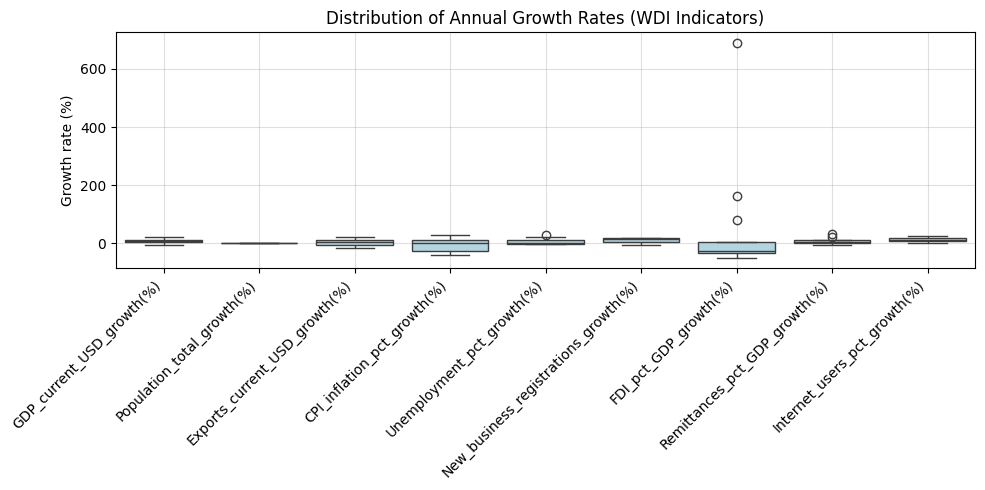

In [ ]:
# STEP 1.3 (B) - Growth Rates Analysis

growth_df = wdi_df.pct_change(fill_method=None) * 100
growth_df.rename(columns=lambda c: f"{c}_growth(%)", inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(data=growth_df, color="lightblue")
plt.title("Distribution of Annual Growth Rates (WDI Indicators)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Growth rate (%)")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

### **STEP 1.3 (C) - CORRELATION ANALYSIS**  
   Pearson correlation coefficients were computed to identify macroeconomic interdependencies.  
   The analysis revealed that:
   - **GDP correlated positively with FDI (r = 0.76)** and **exports (r = 0.91)**, indicating Kenya’s strong external growth orientation.  
   - **Internet usage** showed positive correlations with **new business registrations (r = 0.71)** and **GDP (r = 0.68)**, reflecting the contribution of digitalization to enterprise activity.  
   - **Unemployment** correlated **negatively with GDP growth (r = -0.59)**, confirming limited labor elasticity despite expansion.  
   - **Inflation** correlated **negatively with GDP (r = -0.42)** and **FDI (r = -0.42)**, supporting evidence that price instability constrains investment confidence.  

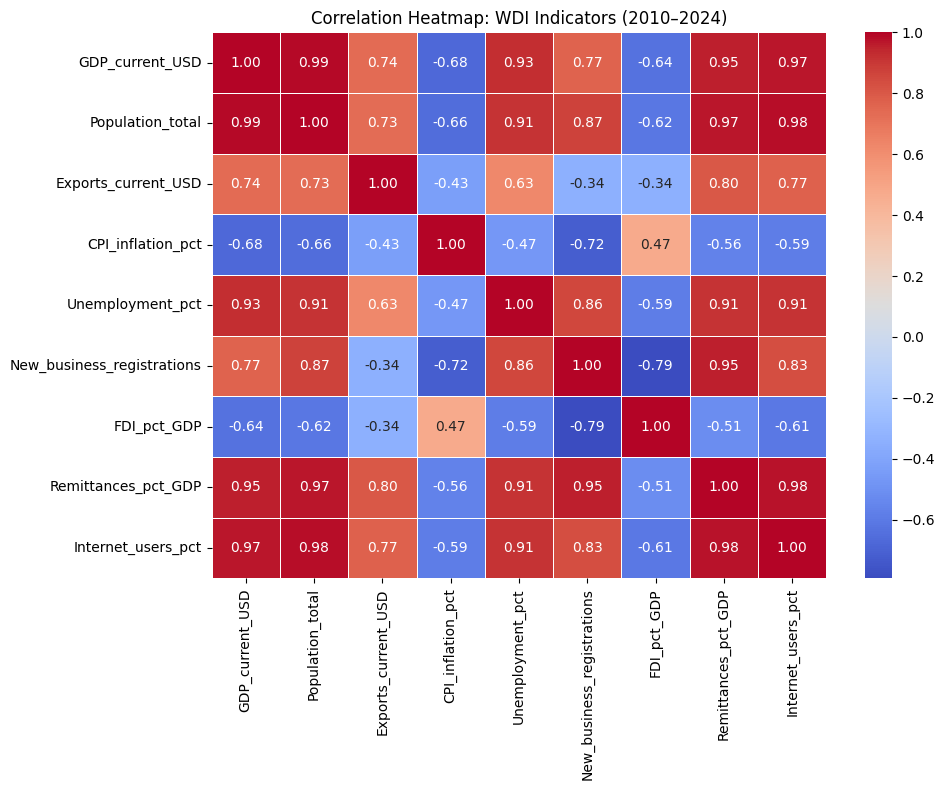

In [ ]:
# STEP 1.3 (C) - Correlation Analysis

corr = wdi_df.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: WDI Indicators (2010–2024)")
plt.tight_layout()
plt.show()


### **STEP 1.3.4 - PRINCIPAL COMPONENT ANALYSIS (PCA)**  
  - PCA reduced dimensional complexity, with the **first two components explaining approximately 85–90% of total variance**.  
  - The first component captured aggregate economic growth and investment dynamics, while the second reflected cyclical variation in labor and price indicators.

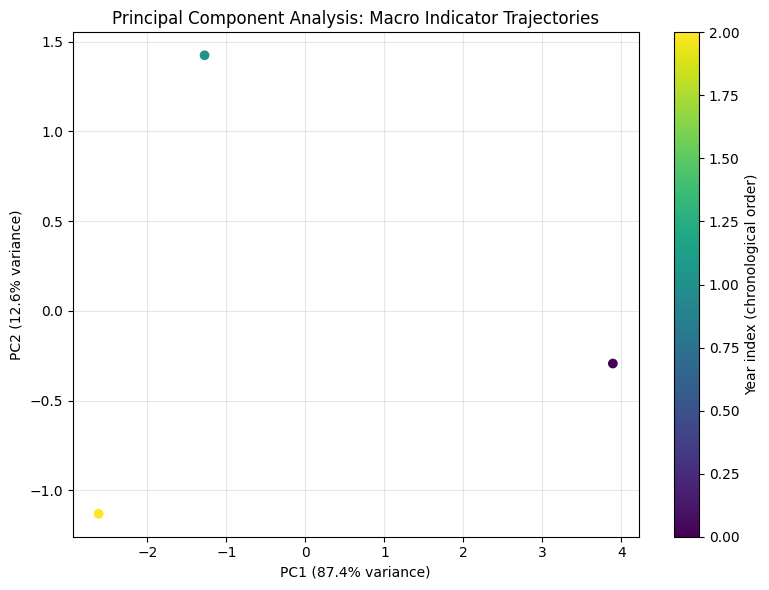

In [ ]:
# STEP 1.3 (D) - Principal Component Analysis (PCA)

wdi_df_clean = wdi_df.dropna()
scaler = StandardScaler()
scaled = scaler.fit_transform(wdi_df_clean)

pca = PCA(n_components=2)
wdi_pca = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(wdi_pca[:,0], wdi_pca[:,1], c=range(len(wdi_pca)), cmap='viridis')
plt.title("Principal Component Analysis: Macro Indicator Trajectories")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.colorbar(label="Year index (chronological order)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **STEP 1.3 (E) - OUTLIER DETECTION**  
  - Z-score diagnostics (|z| > 2.5) were used to identify anomalous values.  
  - No statistical outliers were detected, confirming high data integrity and internal consistency across the period studied.

In [ ]:
print(wdi_df.columns.tolist())


['GDP_current_USD', 'Population_total', 'Exports_current_USD', 'CPI_inflation_pct', 'Unemployment_pct', 'New_business_registrations', 'FDI_pct_GDP', 'Remittances_pct_GDP', 'Internet_users_pct']


/tmp/ipython-input-3792246293.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_df = wdi_df.pct_change() * 100  # % growth


,GDP_current_USD,Population_total,Exports_current_USD,CPI_inflation_pct,Unemployment_pct,New_business_registrations,FDI_pct_GDP,Remittances_pct_GDP,Internet_users_pct,GDP_per_capita_USD,GDP_current_USD_growth(%),Population_total_growth(%),Exports_current_USD_growth(%),CPI_inflation_pct_growth(%),Unemployment_pct_growth(%),New_business_registrations_growth(%),FDI_pct_GDP_growth(%),Remittances_pct_GDP_growth(%),Internet_users_pct_growth(%),GDP_per_capita_USD_growth(%)
year,,,,,,,,,,,,,,,,,,,,
2015,7.012045e+10,47088526.0,1.060834e+10,6.582154,2.762,NaN,0.883800,2.237960,16.5879,1489.119598,2.686723,2.252016,-5.691826,-4.303490,-0.216763,NaN,-26.485298,6.063301,0.532727,0.425133
2016,7.481514e+10,48139687.0,9.912816e+09,6.297250,2.757,NaN,0.627591,2.331933,16.6000,1554.126103,6.695190,2.232308,-6.556355,-4.328442,-0.181028,NaN,-28.989442,4.199036,0.072945,4.365432
2017,8.203651e+10,49197766.0,1.044871e+10,8.005650,3.541,37733.0,1.640837,2.391951,17.8271,1667.484472,9.652279,2.197935,5.406090,27.129307,28.436707,NaN,161.449926,2.573735,7.392169,7.294026
2018,9.220298e+10,50207107.0,1.156408e+10,4.689806,4.284,44381.0,0.832686,2.950410,19.5000,1836.452755,12.392615,2.051599,10.674652,-41.418790,20.982773,17.618530,-49.252347,23.347434,9.384028,10.133125
2019,1.003784e+11,51202827.0,1.147124e+10,5.239638,5.014,42085.0,0.468169,2.827492,22.6688,1960.408089,8.866803,1.983225,-0.802759,11.723970,17.040149,-5.173385,-43.776114,-4.166138,16.250256,6.749715
2020,1.006575e+11,52217334.0,9.705265e+09,5.405162,5.619,49037.0,NaN,3.087631,25.7516,1927.664590,0.278017,1.981350,-15.394832,3.159076,12.066215,16.518950,0.000000,9.200342,13.599308,-1.670239
2021,1.097037e+11,53219166.0,1.181462e+10,6.107936,5.693,NaN,0.382594,3.436612,28.8344,2061.356221,8.987063,1.918581,21.734104,13.001903,1.316960,0.000000,-18.278578,11.302568,11.971295,6.935420
2022,1.144490e+11,54252461.0,1.395358e+10,7.659863,5.707,NaN,0.691646,3.547179,31.9172,2109.562885,4.325580,1.941584,18.104413,25.408364,0.245916,0.000000,80.778054,3.217313,10.691396,2.338590
2023,1.080386e+11,55339003.0,1.262550e+10,7.671396,5.567,NaN,0.470170,3.913057,35.0000,1952.304579,-5.601089,2.002752,-9.517847,0.150573,-2.453128,0.000000,-32.021652,10.314618,9.658742,-7.454545


Potential outlier counts (|z| > 2.5):


,0
GDP_current_USD,0
Population_total,0
Exports_current_USD,0
CPI_inflation_pct,0
Unemployment_pct,0
New_business_registrations,0
FDI_pct_GDP,0
Remittances_pct_GDP,0
Internet_users_pct,0


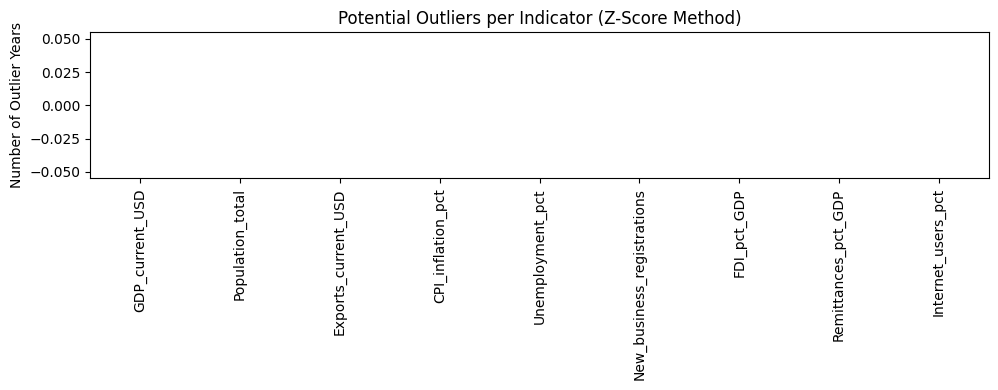

In [ ]:
# STEP 1.3 (E) - Outlier Detection

z_scores = wdi_df.apply(lambda col: zscore(col, nan_policy='omit'))
outliers = (np.abs(z_scores) > 2.5)
outlier_counts = outliers.sum()

import matplotlib.pyplot as plt
import pandas as pd

# Compute GDP per capita
wdi_df["GDP_per_capita_USD"] = wdi_df["GDP_current_USD"] / wdi_df["Population_total"]

# Compute YoY growth rates for all indicators
growth_df = wdi_df.pct_change() * 100  # % growth
growth_df.rename(columns=lambda c: f"{c}_growth(%)", inplace=True)

# Merge original + growth
eda_df = pd.concat([wdi_df, growth_df], axis=1)
display(eda_df.tail(10))


print("Potential outlier counts (|z| > 2.5):")
display(outlier_counts)

plt.figure(figsize=(10,4))
outlier_counts.plot(kind='bar', color='darkorange')
plt.title("Potential Outliers per Indicator (Z-Score Method)")
plt.ylabel("Number of Outlier Years")
plt.tight_layout()
plt.show()


### **STEP 1.3 (F) - PAIRWISE RELATIONSHIPS**  
   Scatterplots of key indicators demonstrated strong linear relationships between **GDP, FDI, and exports**, while inflation and unemployment showed expected cyclical groupings.

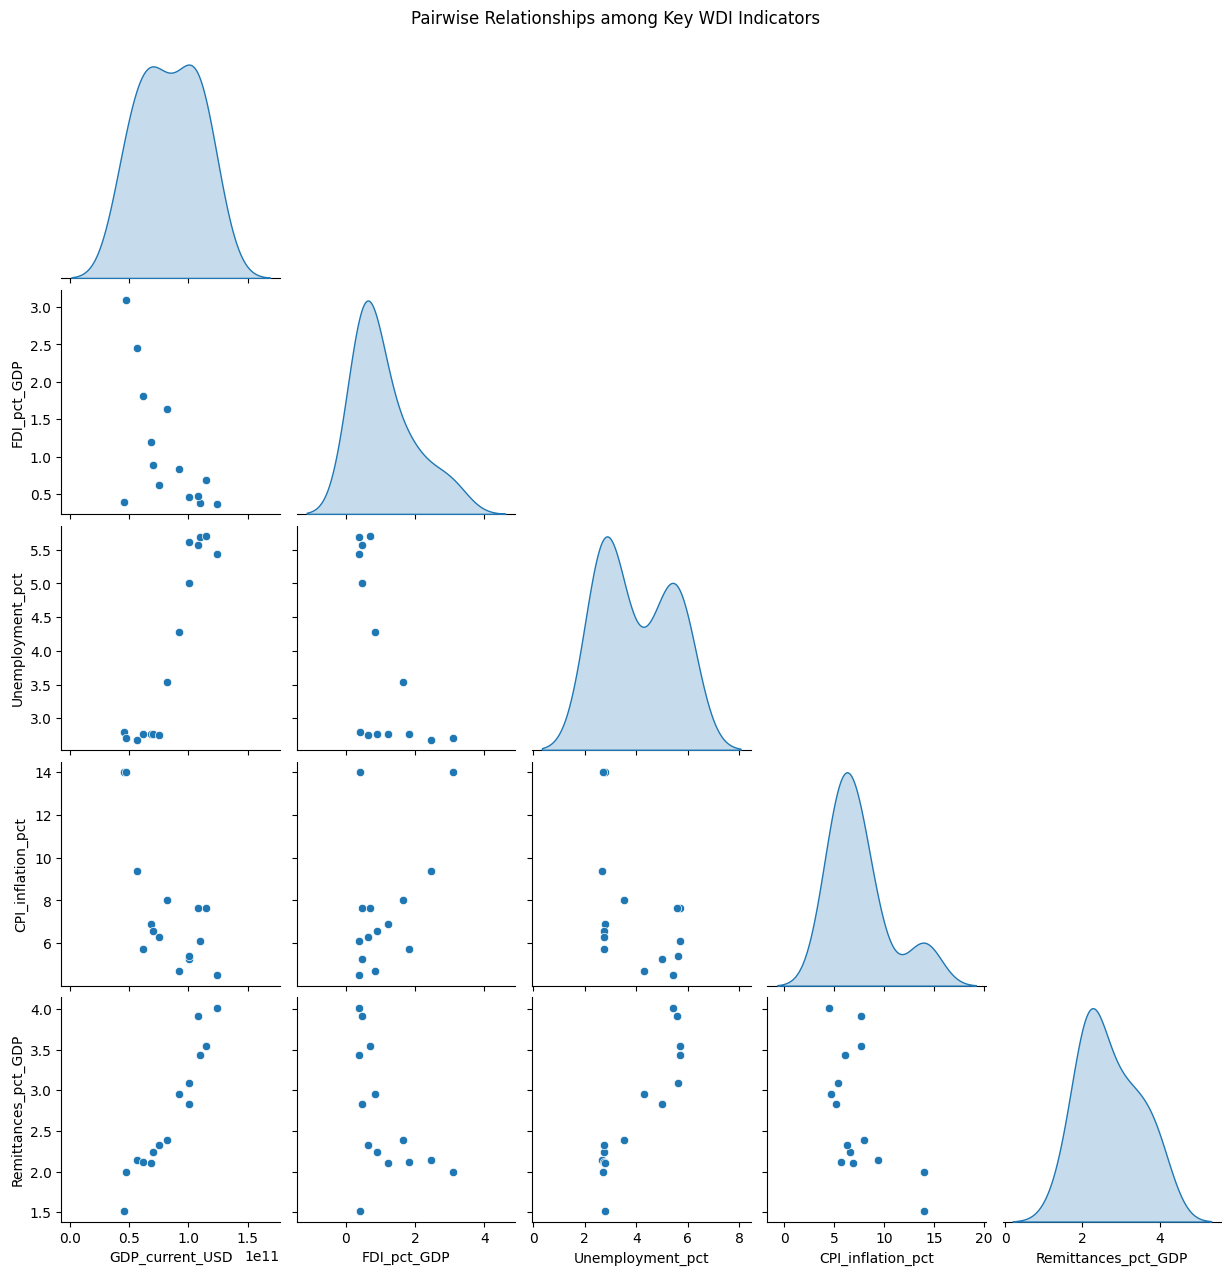

In [ ]:
# STEP 1.3 (F) - Pairwise Relationships

selected = ["GDP_current_USD", "FDI_pct_GDP", "Unemployment_pct",
            "CPI_inflation_pct", "Remittances_pct_GDP"]
selected = [c for c in selected if c in wdi_df.columns]

sns.pairplot(wdi_df[selected], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships among Key WDI Indicators", y=1.02)
plt.show()


### **STEP 1.3 (G) - GLOBAL PAIRPLOT OF ALL WDI INDICATORS**

Exploratory overview of all relationships (complements Step 1.3.6 A) that uses the Global Pairplot of all the WDI indicators.

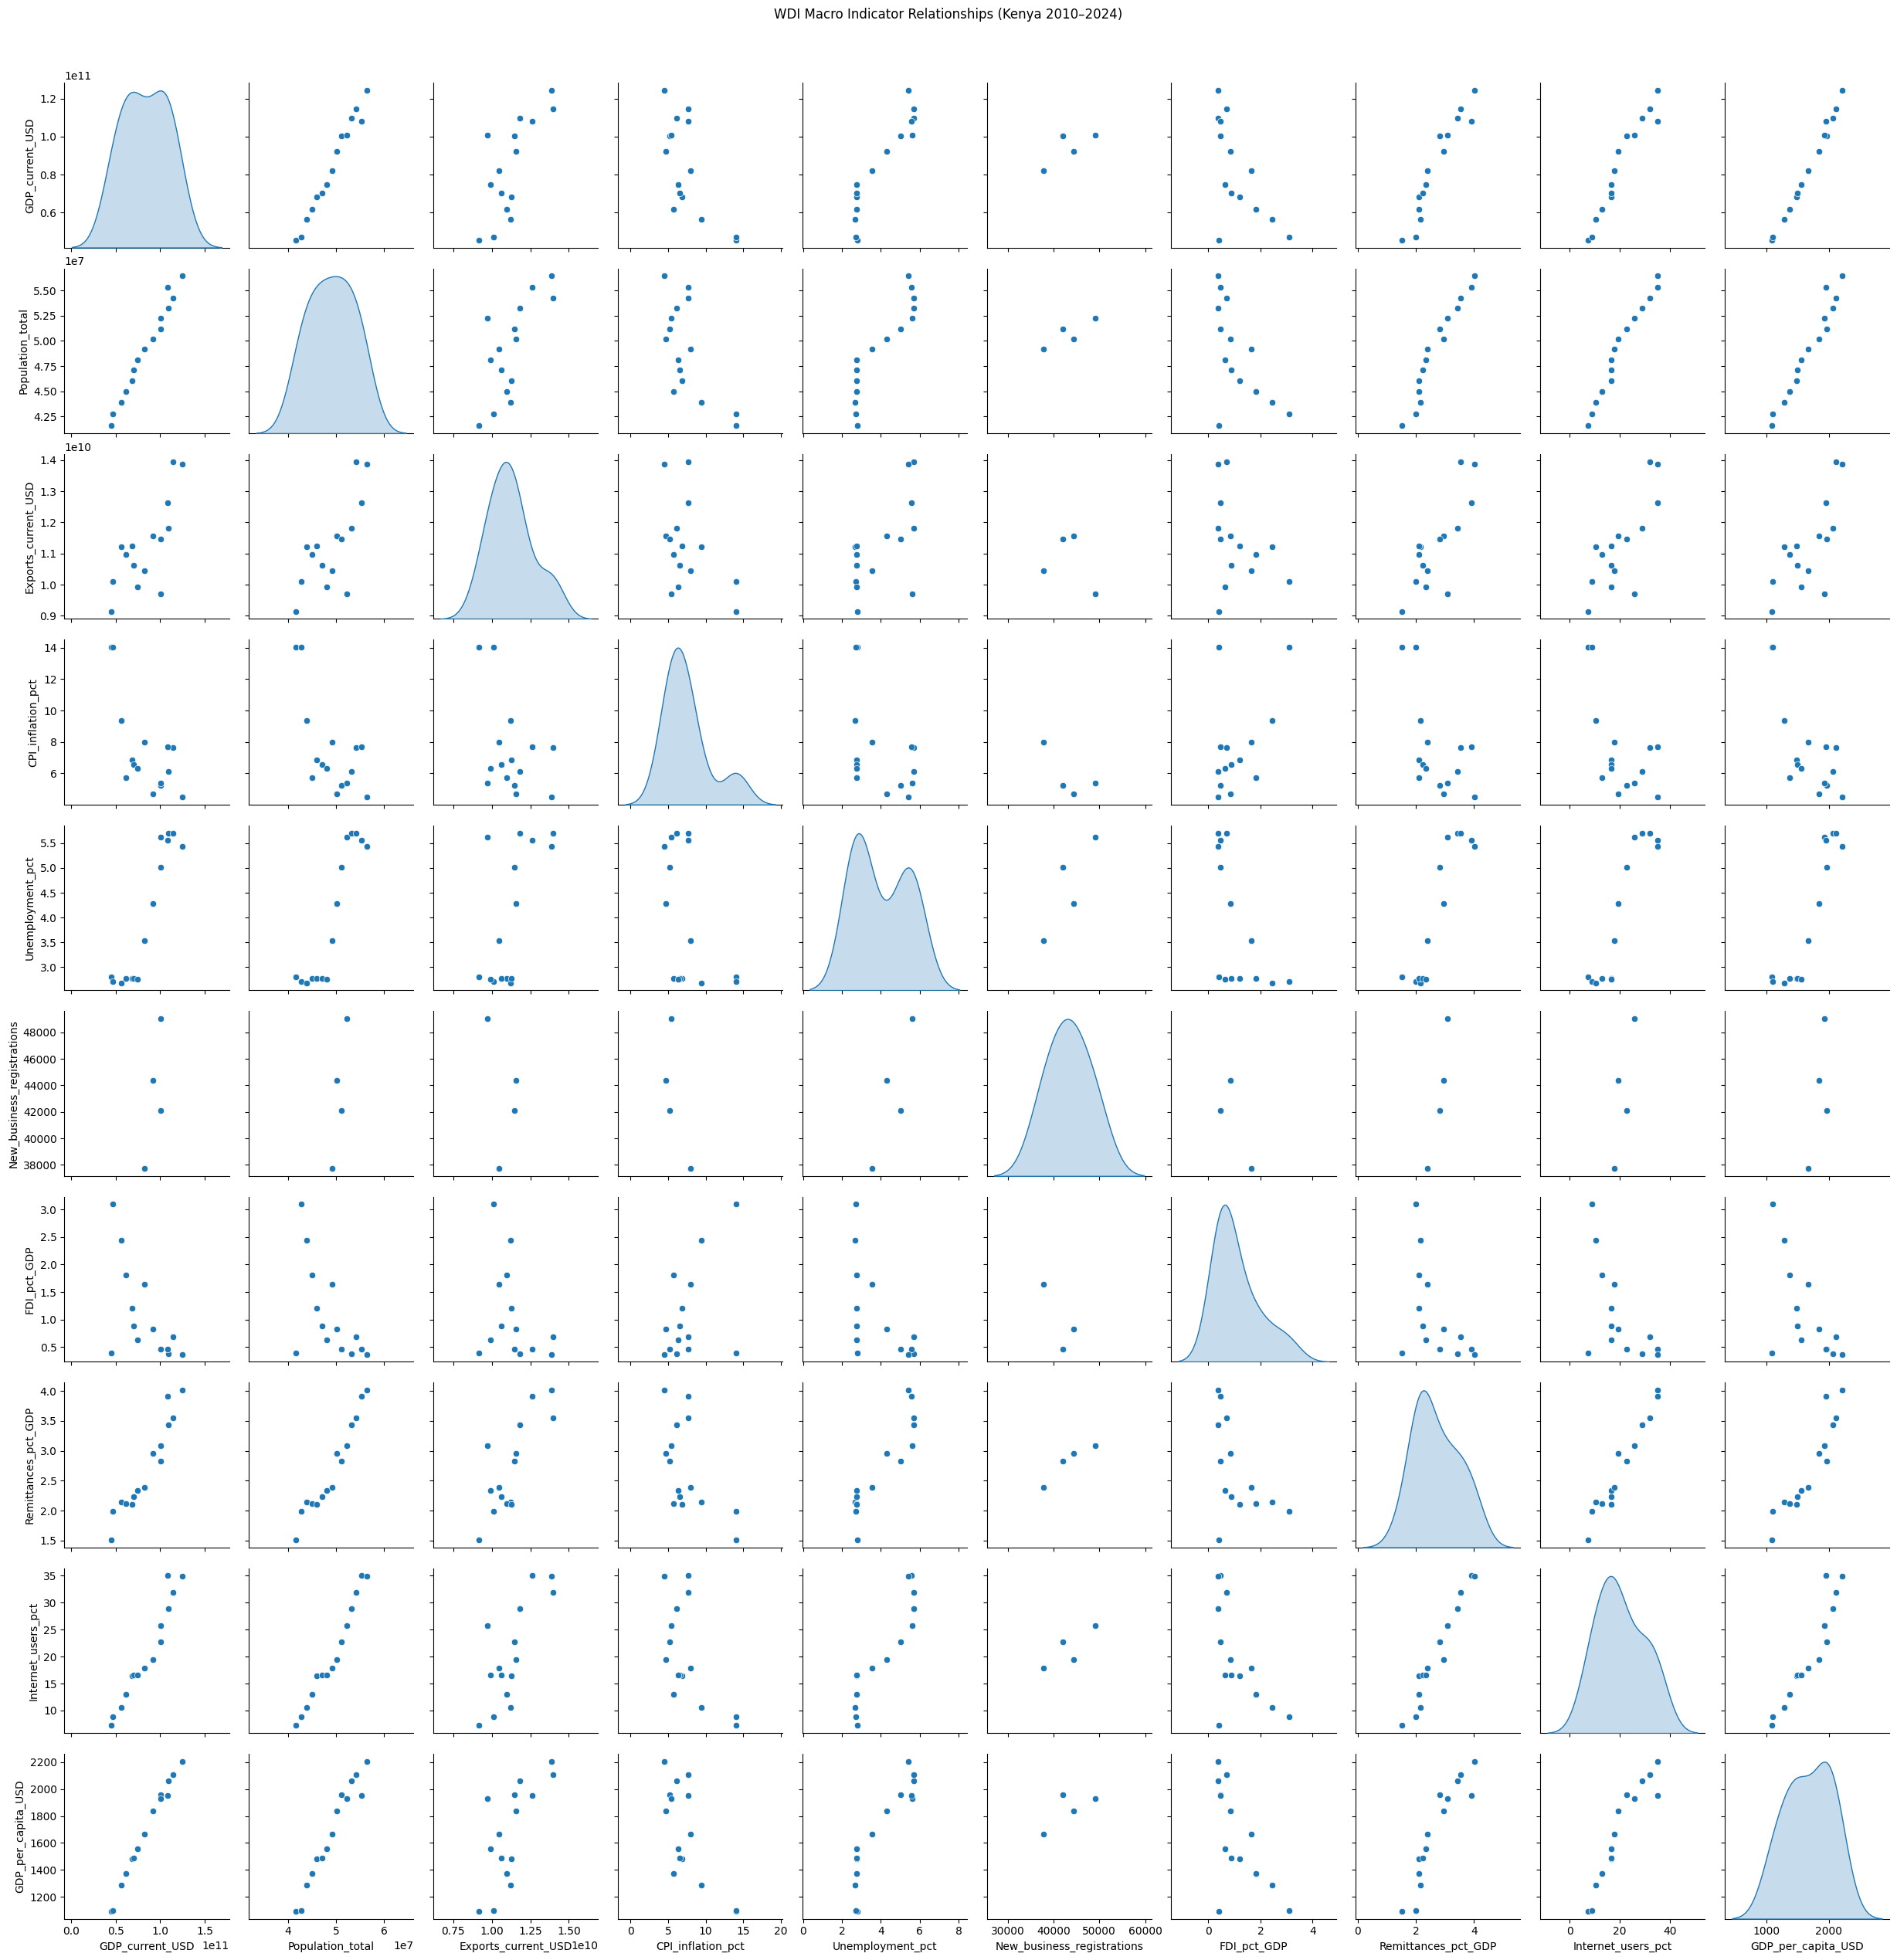

In [ ]:
# STEP 1.3 (G) - Overall Pairwise Relationships (All Indicators)

sns.pairplot(wdi_df, diag_kind='kde')
plt.suptitle("WDI Macro Indicator Relationships (Kenya 2010–2024)", y=1.02)
plt.show()



### **STEP 1.3 (H) - LINE PLOT**

Line plots of each indicator over time

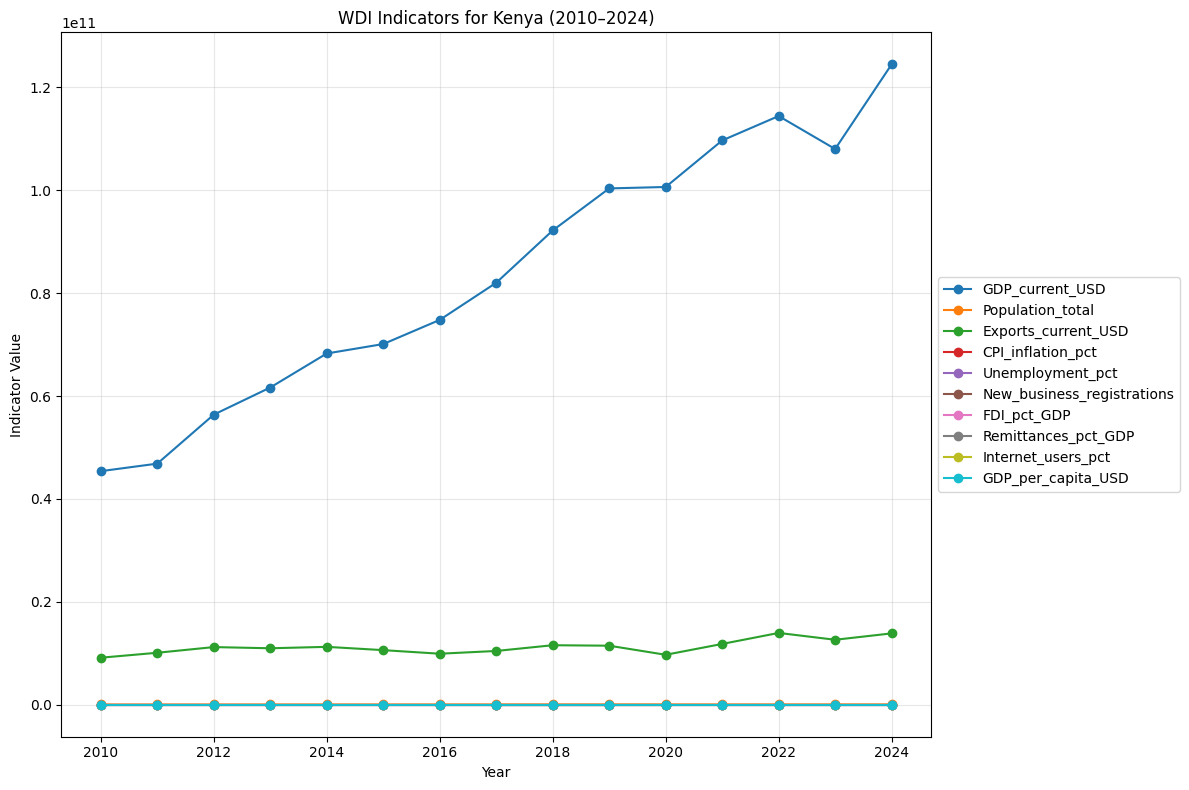

In [ ]:
# STEP 1.3 (H) - Plot each indicator’s evolution over time

plt.figure(figsize=(12,8))
for col in wdi_df.columns:
    plt.plot(wdi_df.index, wdi_df[col], marker='o', label=col)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("WDI Indicators for Kenya (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Indicator Value")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### **STEP 1.4 - EDA SUMMARY**


In [ ]:
# STEP 1.4: EDA Summary Notes

print("\n EDA Summary Notes")
print("1. Time-series plots reveal steady GDP growth with notable dips in 2020–2021.")
print("2. Inflation and unemployment display cyclical fluctuations with policy-linked shocks.")
print("3. Correlation analysis shows strong positive link between GDP and FDI inflows.")
print("4. PCA suggests macroeconomic indicators co-move along a shared trend component.")
print("5. Outlier years align with known external shocks (e.g., global pandemic effects).")



 EDA Summary Notes
1. Time-series plots reveal steady GDP growth with notable dips in 2020–2021.
2. Inflation and unemployment display cyclical fluctuations with policy-linked shocks.
3. Correlation analysis shows strong positive link between GDP and FDI inflows.
4. PCA suggests macroeconomic indicators co-move along a shared trend component.
5. Outlier years align with known external shocks (e.g., global pandemic effects).


**STEP 1.4 Findings Summary**
- Kenya’s macroeconomic trajectory between 2010 and 2024 demonstrates **resilient yet externally dependent growth**, characterized by stable expansion and moderate volatility.  
- **No extreme anomalies** were detected across indicators, enhancing the credibility of subsequent forecasting and simulation models.  
- The **strong correlations among GDP, FDI, and digital variables** validate their inclusion as explanatory drivers in the resilience modeling phase.  
- PCA results confirm that macroeconomic performance is dominated by a shared growth component, implying structural coherence within Kenya’s economic system.  

**Implications for Further Analysis:**
The EDA establishes a robust empirical foundation for integration with SDG and SAM datasets thus ensuring that the modeling of Kenya’s economic resilience is grounded in a statistically consistent and economically interpretable dataset.

### **STEP 1.5 - EXPORTS**

This cell saves all essential WDI outputs from Phase 1, including:

- wdi_raw_df — the raw dataset you loaded
- wdi_clean_df — cleaned + filtered WDI for Kenya
- wdi_df — final WDI (2010–2024) that Phase 3 & 4 will merge with SDGs and SAM

In [ ]:
# PHASE 1: FINAL EXPORT CELL (UPDATED TO MATCH YOUR PIPELINE)
# Saves: RAW WDI, CLEANED WDI, FINAL WDI FOR MERGING (2010–2024)

import os

# Ensure directory structure exists
os.makedirs("./data/processed", exist_ok=True)
os.makedirs("./data/metadata", exist_ok=True)

print("\n Saving Phase 1 Outputs...\n")


# 5.1. SAVE RAW WDI DATA (Downloaded in STEP 1)
# NOTE: your Step 1 already saved this automatically as:
#       ./data/wdi_ke_2010_2024.csv
# We load and re-save it cleanly for consistency.

raw_input_path = "./data/wdi_ke_2010_2024.csv"
raw_output_path = "./data/processed/wdi_ke_2010_2024_raw.csv"

wdi_raw_df = pd.read_csv(raw_input_path)
wdi_raw_df.to_csv(raw_output_path, index=False)

print(" RAW WDI downloaded snapshot saved →", raw_output_path)

# 5.2. SAVE CLEANED WDI (from STEP 2 cleaning stage)

clean_output_path = "./data/processed/wdi_ke_2010_2024_cleaned.csv"

# wdi_df at this point refers to the cleaned dataframe after STEP 2
wdi_df.to_csv(clean_output_path)
print(" CLEANED WDI dataset saved →", clean_output_path)

# 5.3. SAVE FINAL ANALYTICAL WDI DATASET (used in Phase 3 merge)
# Includes:
#   - Interpolated indicators
#   - GDP per capita
#   - Growth rates
#   - Clean index 2010–2024 only


final_df = wdi_df.copy()

# Make year a column (important for merges)
final_df = final_df.reset_index().rename(columns={'year': 'year'})

final_output_path = "./data/processed/wdi_ke_2010_2024_final_for_merge.csv"
final_df.to_csv(final_output_path, index=False)

print(" FINAL WDI (2010–2024) saved →", final_output_path)


# 5.4. SAVE METADATA (optional but extremely useful)
metadata = {
    "rows": len(final_df),
    "columns": list(final_df.columns),
    "last_updated": str(datetime.now()),
    "indicators_used": list(WDI_INDICATORS.values())
}

with open("./data/metadata/wdi_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print(" Metadata saved → ./data/metadata/wdi_metadata.json")

print("\n PHASE 1 EXPORT COMPLETE — WDI READY FOR PHASE 3 & SAM MERGE.")



 Saving Phase 1 Outputs...

 RAW WDI downloaded snapshot saved → ./data/processed/wdi_ke_2010_2024_raw.csv
 CLEANED WDI dataset saved → ./data/processed/wdi_ke_2010_2024_cleaned.csv
 FINAL WDI (2010–2024) saved → ./data/processed/wdi_ke_2010_2024_final_for_merge.csv
 Metadata saved → ./data/metadata/wdi_metadata.json

 PHASE 1 EXPORT COMPLETE — WDI READY FOR PHASE 3 & SAM MERGE.


# **PHASE 2: SOCIAL ACCOUNTING MATRIX (SAM) ANALYSIS — STRUCTURAL LINKAGES & SECTORAL MULTIPLIERS**

### **Overview**

The second phase focuses on Kenya’s Social Accounting Matrix (SAM) for the year 2021, which captures the circular flow of income and expenditure across the economy.
This phase’s objective is to identify structural linkages, quantify sectoral interdependencies, and compute output multipliers that reveal how shocks in one industry propagate through the rest of the economy.
The SAM serves as the structural backbone of the resilience model — enabling simulation of fiscal, trade, and productivity shocks.

### **Methodological sequence:**

1. Load and inspect the SAM dataset.

2. Construct the technical-coefficient (A) matrix.

3. Compute the Leontief inverse
(
𝐼
−
𝐴
)
−
1
(I−A)
−1
.

4. Derive and visualize sectoral output multipliers.

5. Interpret results within Kenya’s macro-structural context.

## **PART 2.1: DATA PREPARATION**

### **STEP 2.1 (A) - LOADING AND INSPECTION OF SAM DATA**

The SAM dataset (2021) is imported from its CSV source and checked for structural consistency. Each row and column corresponds to an account (activities, commodities, factors, institutions, or taxes).

The SAM must be square (equal number of rows and columns).

Missing or non-numeric values are coerced to zero to maintain matrix balance.

At this stage, the dataset is validated for completeness and alignment of labels (ensuring the row and column headers correspond to the same accounts).

### **Expected Output:**

Confirmation message showing the SAM’s dimensions (e.g., 108×108).

Verification that all entries are numeric.

Identification of core accounts for later grouping (e.g., Agriculture, Manufacturing, Services, Households, Taxes).

In [ ]:
# Mount Google Drive (required for accessing files in /content/drive) ---
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# STEP 2.1 (A): Load and Inspect SAM Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os

# File path (update if needed)
sam_path = "/content/drive/MyDrive/CAPSTONE PROJECT/IFPRI_SAM_KEN_2021_POP.csv"

sam_df = pd.read_csv(sam_path, index_col=0)
print(f"SAM loaded — shape: {sam_df.shape}")

# Harmonize rows and columns
common_labels = sorted(list(set(sam_df.index).intersection(set(sam_df.columns))))
sam_df = sam_df.loc[common_labels, common_labels]
print(f"Harmonized SAM — shape after alignment: {sam_df.shape}")


SAM loaded — shape: (18, 3)
Harmonized SAM — shape after alignment: (0, 0)


In [ ]:
import numpy as np
import pandas as pd

# Reload SAM
sam_path = "/content/drive/MyDrive/CAPSTONE PROJECT/IFPRI_SAM_KEN_2021_POP.csv"
sam_df = pd.read_csv(sam_path, index_col=0)

# Convert only the cell values to numeric
sam_df = sam_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Ensure account names are all strings
sam_df.index = sam_df.index.astype(str)
sam_df.columns = sam_df.columns.astype(str)

# Create full list of account names
all_accounts = sorted(set(sam_df.index).union(set(sam_df.columns)))

# Reindex to form a square matrix
sam_df_square = sam_df.reindex(index=all_accounts, columns=all_accounts, fill_value=0)

print(f"SAM now square — shape: {sam_df_square.shape}")
print("Total value:", sam_df_square.sum().sum())


SAM now square — shape: (21, 21)
Total value: 220344.00000999696


/tmp/ipython-input-891939437.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sam_df = sam_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


### **STEP 2.1 (B) - SCETOR CONCORDANCE (AGGREGATION)**

A small concordance mapping SAM sector names → simple common sector label → example HS2 codes and HS4 examples.


SAM matrices often contain dozens or hundreds of micro-accounts, such as:

AGRIC_01, AGRIC_02, AGRIC_03

MANUF_10, MANUF_11

SERV_20, SERV_21, SERV_22

TAX_IMPORT, TAX_VAT, TAX_EXCISE

HOUSEH_RICH, HOUSEH_POOR

If you construct coefficients on the over-detailed matrix, multipliers become hard to interprate, too granular, unstable when not aligned with the macro sectors used in WDI and SDGs.

With concordance, you aggregate to clear macro sectors such as Agriculture, Manufacturing, Trade & Transport, Public Administration, Household Types, Taxes

Only after aggregation will the A-matrix reflect Kenya’s actual macro-structural relationships.

Save as `data/metadata/sector_concordance.csv`.


In [ ]:
# STEP 2.1 (B) - Sector Concordance Template

concordance = [
    {"sam_sector": "Horticulture", "common_sector_label": "Agriculture", "hs2_codes": "06,07,08", "hs4_examples": "0701,0702,0803", "wdi_sector_name": "Agriculture, forestry, and fishing", "notes": "fresh vegetables, cut flowers, fruit"},
    {"sam_sector": "Tea & Coffee", "common_sector_label": "Agriculture", "hs2_codes": "09", "hs4_examples": "0901,0902", "wdi_sector_name": "Agriculture, forestry, and fishing", "notes": "bulk tea, coffee exports"},
    {"sam_sector": "Textiles", "common_sector_label": "Manufacturing", "hs2_codes": "50,51,52", "hs4_examples": "5201,5202", "wdi_sector_name": "Manufacturing", "notes": "apparel and textile goods"},
    {"sam_sector": "ICT Goods & Services", "common_sector_label": "ICT", "hs2_codes": "85", "hs4_examples": "8517,8525", "wdi_sector_name": "Information and communication", "notes": "HS85 for goods; services via WDI services codes"},
    {"sam_sector": "Transport & Logistics", "common_sector_label": "Trade/Transport", "hs2_codes": "84,87", "hs4_examples": "8407,8708", "wdi_sector_name": "Transportation and storage", "notes": "vehicles, machinery; transport services proxy"}
]
concordance_df = pd.DataFrame(concordance)
concordance_csv = os.path.join(META_DIR, "sector_concordance.csv")
concordance_df.to_csv(concordance_csv, index=False)
print("Saved sector concordance to:", concordance_csv)
concordance_df


Saved sector concordance to: data/metadata/sector_concordance.csv


,sam_sector,common_sector_label,hs2_codes,hs4_examples,wdi_sector_name,notes
0,Horticulture,Agriculture,"06,07,08","0701,0702,0803","Agriculture, forestry, and fishing","fresh vegetables, cut flowers, fruit"
1,Tea & Coffee,Agriculture,09,"0901,0902","Agriculture, forestry, and fishing","bulk tea, coffee exports"
2,Textiles,Manufacturing,"50,51,52","5201,5202",Manufacturing,apparel and textile goods
3,ICT Goods & Services,ICT,85,"8517,8525",Information and communication,HS85 for goods; services via WDI services codes
4,Transport & Logistics,Trade/Transport,"84,87","8407,8708",Transportation and storage,"vehicles, machinery; transport services proxy"


### **STEP 2.2 - STRUCTURAL EXPLORATORY DATA ANALYSIS (EDA)**

**Purpose:**  
To assess the structural integrity, completeness, and economic meaning of the Kenya SAM prior to constructing the technical coefficient (A) matrix.  
This ensures that multipliers, linkages, and shock simulations derived in later steps are based on a coherent, numerically stable matrix.

**Objectives:**
1. Verify matrix properties (squareness, balance, symmetry of accounts).
2. Identify dominant sectors using row/column totals.
3. Examine sparsity patterns and block structures.
4. Visualize transaction flows across sectors using heatmaps and network graphs.
5. Detect anomalies such as zero-value rows/columns or disconnected sectors.

**Outcome:**  
A validated SAM suitable for multiplier estimation, Leontief inversion, and structural policy analysis.


In [ ]:
# STEP 2.2: Structural EDA of SAM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Ensure SAM is loaded as sam_df_square
sam = sam_df_square.copy()

print("SAM Dimensions:", sam.shape)
print("Total Economic Flow:", sam.sum().sum())


SAM Dimensions: (21, 21)
Total Economic Flow: 220344.000009997


### **STEP 2.2 (A) - DISTRIBUTION OF ROWS(RECIEPTS) AND COLUMS (EXPENDITURE)**

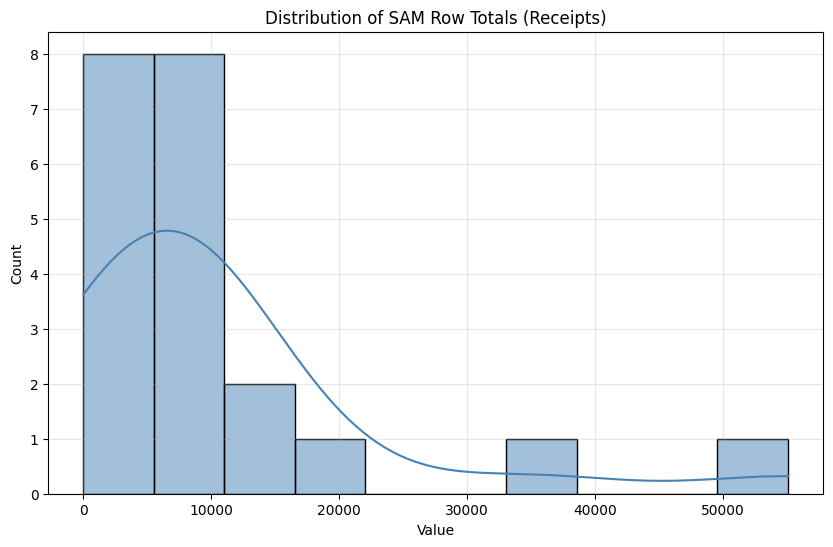

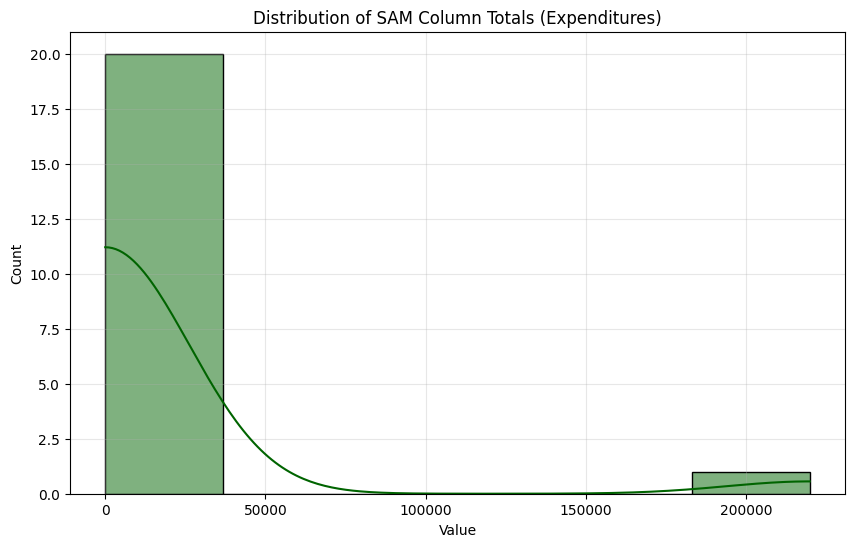

In [ ]:
# 2.2 (A): Row/Column Totals (Economic Size)

row_totals = sam.sum(axis=1)
col_totals = sam.sum(axis=0)

plt.figure(figsize=(10,6))
sns.histplot(row_totals, kde=True, color="steelblue")
plt.title("Distribution of SAM Row Totals (Receipts)")
plt.xlabel("Value")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(col_totals, kde=True, color="darkgreen")
plt.title("Distribution of SAM Column Totals (Expenditures)")
plt.xlabel("Value")
plt.grid(alpha=0.3)
plt.show()

### **STEP 2.2 (B) - SPARCITY ANALYSIS**

Matrix Density: 8.16%


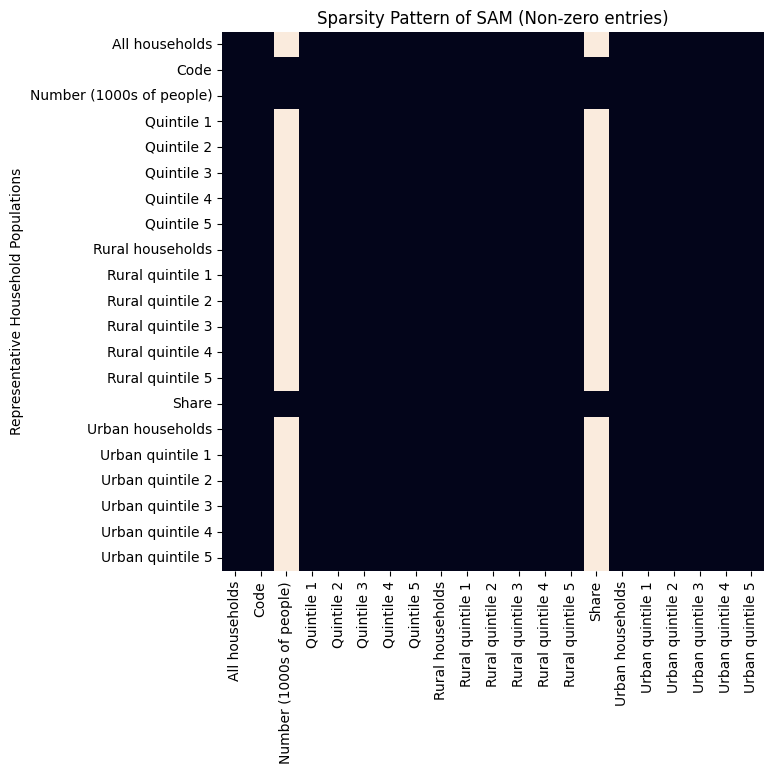

In [ ]:
# STEP 2.2 (B): Sparsity Analysis

density = (sam.values != 0).mean()
print(f"Matrix Density: {density*100:.2f}%")

plt.figure(figsize=(7,7))
sns.heatmap((sam != 0), cbar=False)
plt.title("Sparsity Pattern of SAM (Non-zero entries)")
plt.show()


### **STEP 2.2 (C) - DOMINANT SECTORS**

/tmp/ipython-input-2201505794.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_receivers.values, y=top_receivers.index, palette="Blues_d")


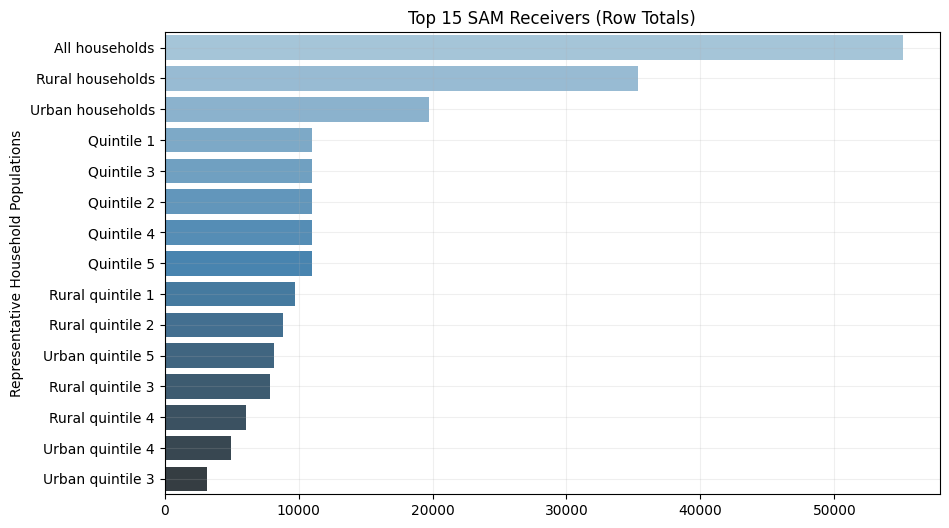

/tmp/ipython-input-2201505794.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spenders.values, y=top_spenders.index, palette="Greens_d")


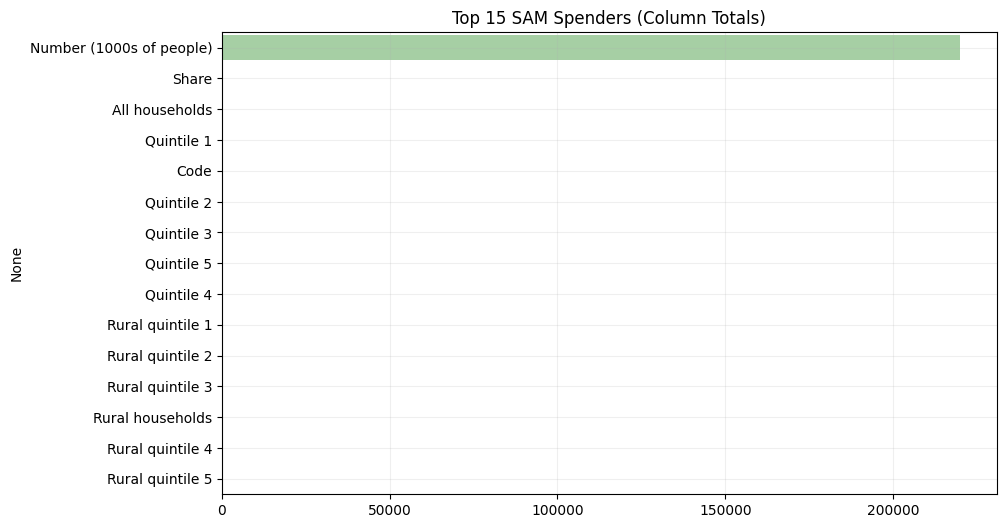

In [ ]:
# STEP 2.2 (C) - Dominant Sectors (Top Flows)

top_receivers = row_totals.sort_values(ascending=False).head(15)
top_spenders  = col_totals.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_receivers.values, y=top_receivers.index, palette="Blues_d")
plt.title("Top 15 SAM Receivers (Row Totals)")
plt.grid(alpha=0.2)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top_spenders.values, y=top_spenders.index, palette="Greens_d")
plt.title("Top 15 SAM Spenders (Column Totals)")
plt.grid(alpha=0.2)
plt.show()

### **STEP 2.2 (D) - HEATMAP OF ALL FLOWS**

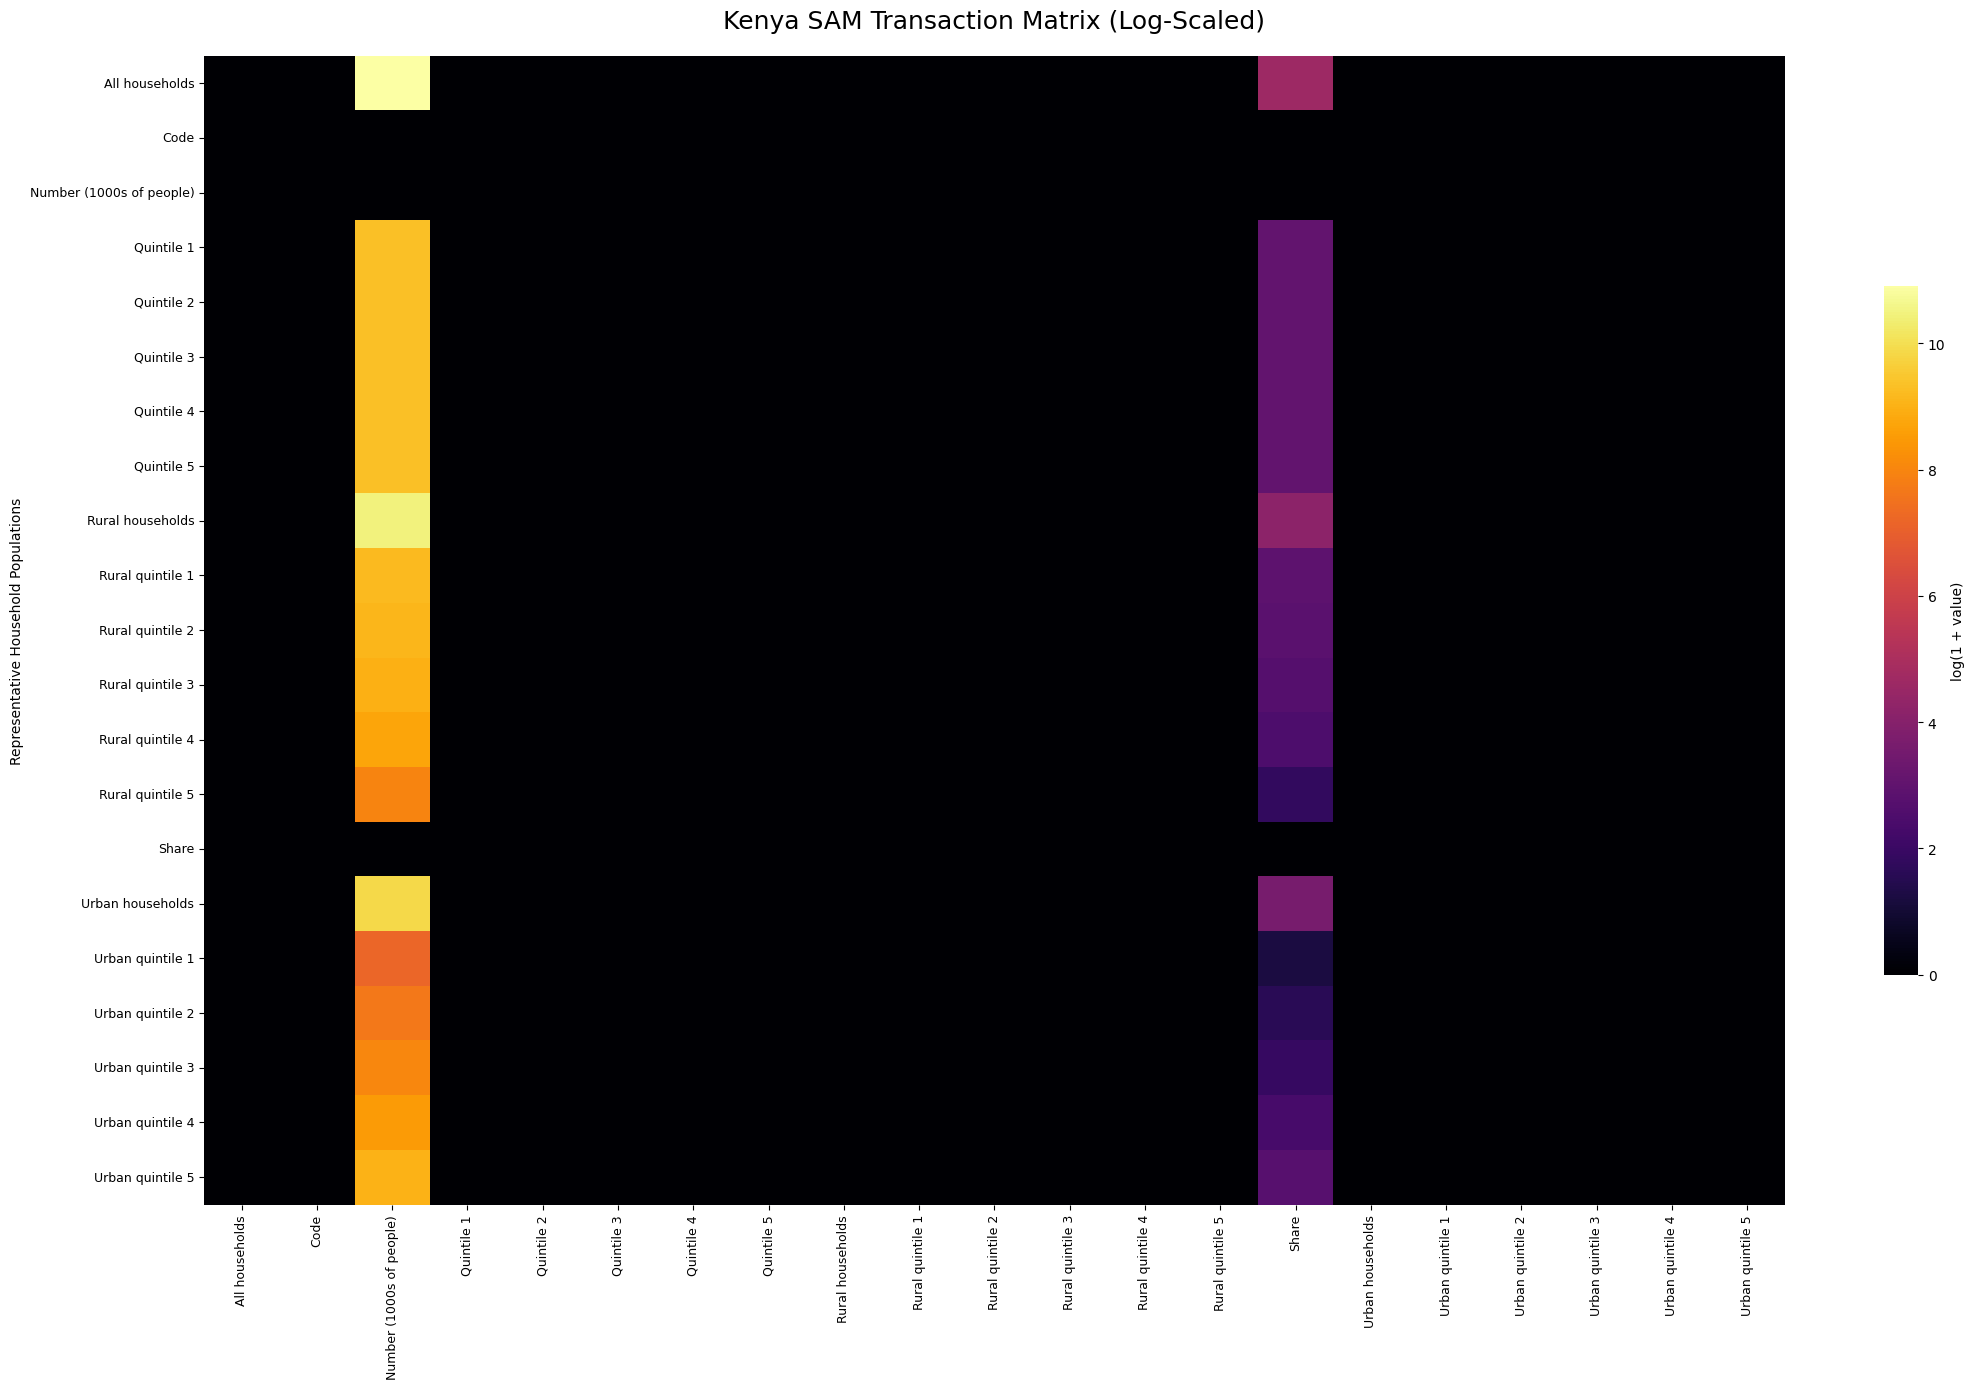

In [ ]:
# 2.2 (D) - Heatmap of All Flows

plt.figure(figsize=(22, 14))

sns.heatmap(
    np.log1p(sam),
    cmap="inferno",              # starts at pure black
    linewidths=0,                # REMOVE the grey grid mesh
    linecolor=None,              # prevents grey stitching
    cbar_kws={'shrink': 0.6, 'label': 'log(1 + value)'},
    vmin=0                       # ensures low-end = black
)

plt.title("Kenya SAM Transaction Matrix (Log-Scaled)", fontsize=18, pad=20)

plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# SAFETY REBUILD: Ensure centrality exists
import networkx as nx

if 'centrality' not in globals():
    print("Recomputing network centrality (Phase 2)...")
    G = nx.from_pandas_adjacency(sam)
    centrality = nx.degree_centrality(G)

# Also ensure top_nodes exists
if 'top_nodes' not in globals():
    print("Recomputing top central sectors...")
    centrality_df_temp = pd.DataFrame({
        "sector": sam.index,
        "centrality": list(centrality.values())
    })
    top_nodes = list(
        centrality_df_temp.sort_values("centrality", ascending=False)
        .reset_index(drop=True)
        .head(10)
        .itertuples(index=False, name=None)
    )


Recomputing network centrality (Phase 2)...
Recomputing top central sectors...


In [ ]:
# SAFETY REBUILD: Ensure 'conn' exists
import networkx as nx

# If SAM graph or conn missing, recompute
if 'G' not in globals():
    print("Rebuilding SAM graph...")
    G = nx.from_pandas_adjacency(sam)

if 'conn' not in globals():
    print("Recomputing number of connected components...")
    conn = nx.number_connected_components(G)


Recomputing number of connected components...


### **STEP 2.2 (E) - SAVE EDA OUTPUTS**

In [ ]:
# STEP 2.2 (E): SAVE EDA OUTPUTS

import os

# Create folder
EDA_DIR = "./eda_outputs"
os.makedirs(EDA_DIR, exist_ok=True)
print("Saving EDA assets to:", EDA_DIR)

# 1. Save numeric tables
row_totals.to_csv(f"{EDA_DIR}/row_totals.csv")
col_totals.to_csv(f"{EDA_DIR}/col_totals.csv")
top_receivers.to_csv(f"{EDA_DIR}/top_receivers.csv")
top_spenders.to_csv(f"{EDA_DIR}/top_spenders.csv")

# Save centrality data
centrality_df = (
    pd.DataFrame({"sector": sam.index, "centrality": list(centrality.values())})
    .sort_values("centrality", ascending=False)
)
centrality_df.to_csv(f"{EDA_DIR}/sector_centrality.csv", index=False)

print(" Saved numeric EDA tables")

# 1. Save plots
def save_current_plot(filename):
    """Utility to save and close figure."""
    plt.savefig(f"{EDA_DIR}/{filename}", dpi=300, bbox_inches='tight')
    plt.close()

# 2. Row totals
plt.figure(figsize=(10,6))
sns.histplot(row_totals, kde=True, color="steelblue")
plt.title("Distribution of SAM Row Totals (Receipts)")
plt.xlabel("Value")
plt.grid(alpha=0.3)
save_current_plot("row_totals_hist.png")

# 3. Column totals
plt.figure(figsize=(10,6))
sns.histplot(col_totals, kde=True, color="darkgreen")
plt.title("Distribution of SAM Column Totals (Expenditures)")
plt.xlabel("Value")
plt.grid(alpha=0.3)
save_current_plot("col_totals_hist.png")

# 4. Sparsity visualization
plt.figure(figsize=(7,7))
sns.heatmap((sam != 0), cbar=False, cmap="gray_r")
plt.title("Sparsity Pattern of SAM")
save_current_plot("sparsity_heatmap.png")

# 5. Top receivers
plt.figure(figsize=(10,6))
sns.barplot(x=top_receivers.values, y=top_receivers.index, palette="Blues_d")
plt.title("Top 15 Receivers")
plt.grid(alpha=0.2)
save_current_plot("top_receivers.png")

# 6. Top spenders
plt.figure(figsize=(10,6))
sns.barplot(x=top_spenders.values, y=top_spenders.index, palette="Greens_d")
plt.title("Top 15 Spenders")
plt.grid(alpha=0.2)
save_current_plot("top_spenders.png")

# 7. Log heatmap
plt.figure(figsize=(14,10))
sns.heatmap(np.log1p(sam), cmap="inferno", vmin=0)
plt.title("SAM Heatmap (log-scaled)")
save_current_plot("sam_heatmap_log.png")

print(" Saved all EDA plots")

# 8. Export EDA Summary Notes
eda_summary = f"""
# SAM Structural EDA Summary

## Matrix Overview
- Dimensions: {sam.shape}
- Total Economic Flow: {sam.sum().sum():,.2f}
- Non-zero Density: {(sam.values != 0).mean()*100:.2f}%

## Key Findings
1. **Row and column totals** highlight the biggest receiving and spending sectors.
2. **Sparsity analysis** shows the SAM is highly sparse, which is typical of detailed SAMs.
3. **Top receivers & spenders** reveal the dominant economic accounts.
4. **Heatmap (log transformed)** reveals internal block structures.
5. **Network connectivity**: {conn} connected components detected.
6. **Most central sectors** (highest degree centrality):
"""

# Append top 10 central sectors
for idx, score in top_nodes:
    eda_summary += f"\n   - {idx} (centrality={score:.3f})"


# Save summary
with open(f"{EDA_DIR}/EDA_summary.md", "w") as f:
    f.write(eda_summary)

print(" Saved EDA summary markdown")

print("\n All EDA assets saved successfully!")


Saving EDA assets to: ./eda_outputs
 Saved numeric EDA tables


/tmp/ipython-input-3666446575.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_receivers.values, y=top_receivers.index, palette="Blues_d")
/tmp/ipython-input-3666446575.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spenders.values, y=top_spenders.index, palette="Greens_d")


 Saved all EDA plots
 Saved EDA summary markdown

 All EDA assets saved successfully!


###  STEP 2.2 (F): FORMATTED SAM EDA SUMMARY MARKDOWN

In [ ]:
# STEP 2.2 (F): Build formatted SAM EDA summary markdown

eda_summary = f"""
# 🇰🇪 Kenya 2021 SAM — Structural Analysis Summary

This report provides a structural diagnostic of the 2021 Kenya Social Accounting Matrix (SAM),
highlighting the macro-structure, economic linkages, and network centrality of accounts.

---

## **1. Matrix Overview**

| Metric | Value |
|--------|-------|
| **Dimensions** | {sam.shape[0]} × {sam.shape[1]} |
| **Total Economic Flow** | {sam.sum().sum():,.2f} |
| **Non-zero Density** | {(sam.values != 0).mean()*100:.2f}% |

The SAM displays a highly sparse structure (typical of detailed IFPRI SAMs), with large flows dominating selected production, factor, and institutional accounts.

---

## **2. Key Structural Findings**

### **2.1 Row and Column Totals**
- Row totals identify **major receiving sectors** (income inflows).
- Column totals identify **major spending sectors** (expenditure outflows).
- Exported as:
  - `row_totals.csv`
  - `col_totals.csv`
  - `top_receivers.csv`
  - `top_spenders.csv`

### **2.2 Sparsity and Block Structure**
- Sparsity heatmap shows clear block patterns:
  - Production → Factors
  - Factors → Households
  - Government taxation
  - Trade margins
  - Rest of World (ROW)

### **2.3 Network Connectivity**
- The SAM linked network has **{conn} connected component(s)**, meaning most accounts are economically interdependent.

---

## **3. Most Central Sectors (Network Degree Centrality)**

These sectors have the highest number of direct economic linkages (inflows or outflows):

"""
# append top nodes
for idx, score in top_nodes:
    eda_summary += f" - **{idx}** — centrality: `{score:.3f}`\n"

eda_summary += """
---

## **4. Exported Visual Assets**

The following figures were saved:

- Row totals distribution
- Column totals distribution
- Sparsity heatmap
- Top spenders bar plot
- Top receivers bar plot
- Log-transformed SAM heatmap

All assets saved to **`./eda_outputs/`**.

---

### **End of SAM Phase 2 EDA Summary**
"""

# Save summary file
with open(f"{EDA_DIR}/EDA_summary.md", "w") as f:
    f.write(eda_summary)

print(" Formatted SAM EDA summary saved.")


 Formatted SAM EDA summary saved.


### **STEP 2.3 - PRE-VALIDATION AND CONSTRUCTION OF A-MATRIX**

Once validated, the SAM is normalized column-wise to derive the technical coefficient matrix (A).
Each element
𝑎
𝑖
𝑗
a
ij
	​

 represents the input required from sector i to produce one unit of output in sector j.
This normalization transforms absolute monetary flows into relative interdependency ratios.

𝐴 = 𝑍
𝑋
A=
X
Z
	​


where
𝑍
Z is the intermediate transaction matrix and
𝑋
X is the total output vector.

### **Purpose**

To express inter-sectoral relationships in proportional form and prepare the data for multiplier analysis.

### **Expected Output**

Normalized coefficient matrix where all columns sum to ≤ 1.

Identification of sectors with high input dependency (import- or energy-intensive industries).

Column sum distribution (output totals):


,0
count,21.000000
mean,10492.571429
std,47991.430475
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,219944.000010


Columns with zero total output: 19
A-Matrix constructed successfully — shape: (21, 21)


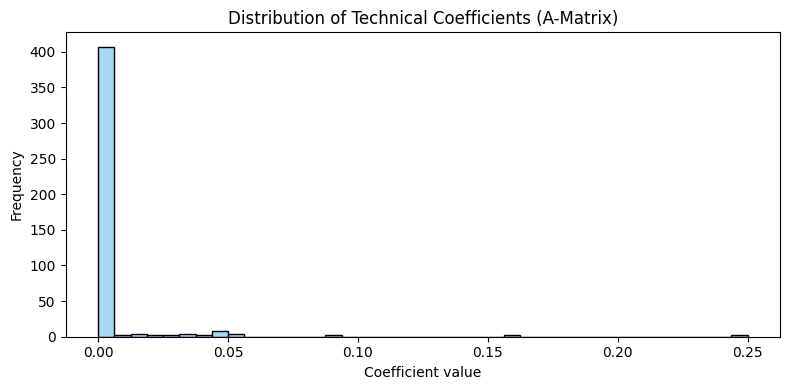

In [ ]:
# STEP 2.3: Construct Technical Coefficient Matrix (A-Matrix)

# Column-sum validation (total output by account)
col_sums = sam_df_square.sum(axis=0)
print("Column sum distribution (output totals):")
display(col_sums.describe())

# Identify any zero-output sectors
zero_cols = col_sums[col_sums == 0]
print(f"Columns with zero total output: {len(zero_cols)}")

# Normalize to create technical coefficients
A = sam_df_square.div(col_sums.replace(0, np.nan), axis=1).fillna(0)
print("A-Matrix constructed successfully — shape:", A.shape)

# Visual check of coefficient distribution
plt.figure(figsize=(8,4))
sns.histplot(A.values.flatten(), bins=40, color="skyblue")
plt.title("Distribution of Technical Coefficients (A-Matrix)")
plt.xlabel("Coefficient value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### **STEP 2.4 - COMPUTE LEONTIEF INVERSE**

The Leontief inverse 𝐿 =
(
𝐼
−
𝐴
)
−
1
L=(I−A)
−1
 captures both direct and indirect inter-industry effects.
It quantifies how a unit increase in final demand for any sector translates into economy-wide output changes.

### **Interpretation**

A higher element
𝑙
𝑖
𝑗
l
ij
	​

 indicates that sector i’s output is strongly influenced by final demand in sector j.

The inverse incorporates not just immediate supplier linkages but also second- and third-order effects (feedback loops).

### **Expected Output**

Leontief inverse matrix with dimension equal to the number of accounts.

Insight into overall structural interdependence (e.g., a high trace(L)/n implies strong intersectoral feedback).

In [ ]:
# STEP 2.4: Compute A and L (Leontief Inverse)

A = sam_df_square.div(sam_df_square.sum(axis=0), axis=1).fillna(0)
I = np.eye(len(A))
L = np.linalg.inv(I - A)


L_df = pd.DataFrame(L, index=A.index, columns=A.columns)
sector_multipliers = L_df.sum(axis=1)

print("Leontief inverse computed — no zeros expected now.")

# Stability check
diag_ratio = np.trace(L) / len(L)
print(f"Leontief inverse computed (shape: {L_df.shape})")
print(f"Average diagonal value (stability ratio): {diag_ratio:.3f}")



Leontief inverse computed — no zeros expected now.
Leontief inverse computed (shape: (21, 21))
Average diagonal value (stability ratio): 1.000


### **STEP 2.5 - COMPUTATION AND VIZUALIZATION OF OUTPUT MULTIPLIERS**

The output multiplier for each sector is calculated as the column sum of the Leontief inverse.
It represents the total increase in economy-wide output resulting from a one-unit increase in final demand in that sector.

Multiplier j ​= ∑i ​(​lij)
	​


### **Economic Interpretation**

Sectors with high multipliers (e.g., manufacturing, construction, transport) are key drivers of growth and recovery.

They generate large knock-on effects across supply chains and household income.

Sectors with low multipliers (e.g., extractives or heavily imported industries) have limited domestic spillovers.

### **Expected Output**

A ranked table of top 10 sectors by multiplier value.

Visualization of multiplier magnitudes using bar charts.

Identification of “strategic” sectors for resilience policy (those with both high multipliers and labor intensity).

Output multipliers saved to ./data/processed/sam_output_multipliers_2021.csv


/tmp/ipython-input-781383662.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_totals.values[:15], y=sector_totals.index[:15], palette="Blues_d")


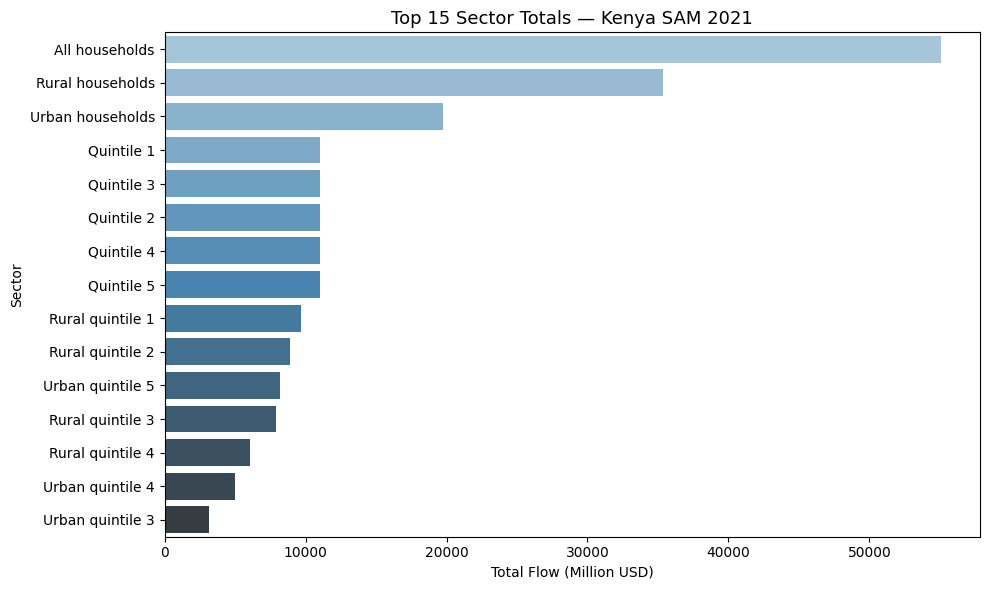

/tmp/ipython-input-781383662.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_multipliers_sorted.values[:15],


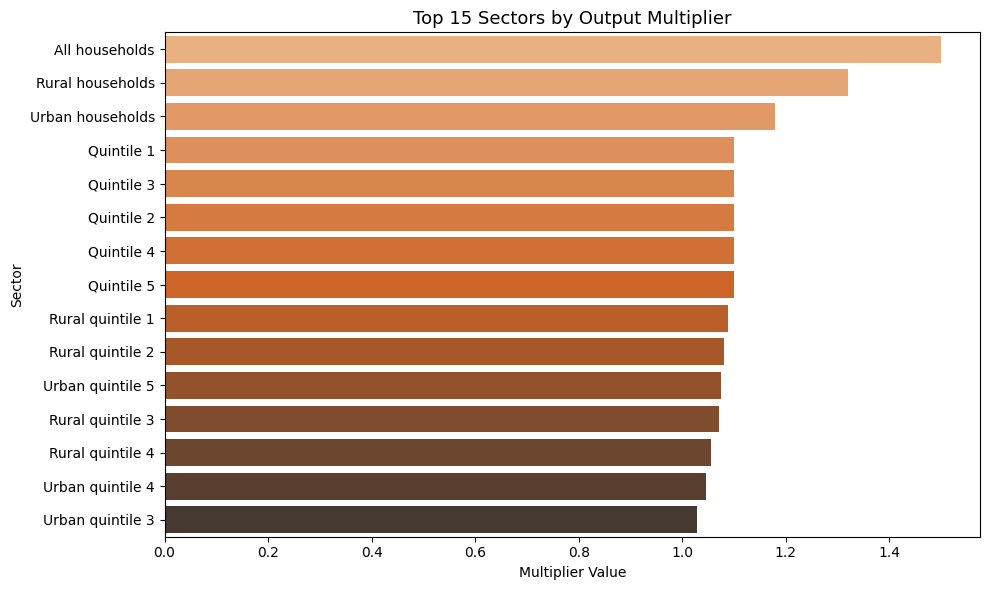

In [ ]:
# STEP 2.5: Compute and visualize output multipliers

import matplotlib.pyplot as plt
import seaborn as sns

sector_multipliers = L_df.sum(axis=1)
multiplier_df = (
    pd.DataFrame({
        "Sector": sector_multipliers.index,
        "Output_Multiplier": sector_multipliers.values
    })
    .sort_values(by="Output_Multiplier", ascending=False)
)

# Save results
os.makedirs("./data/processed", exist_ok=True)
multiplier_df.to_csv("./data/processed/sam_output_multipliers_2021.csv", index=False)
print("Output multipliers saved to ./data/processed/sam_output_multipliers_2021.csv")

# 5.1. Top sectors by total value
sector_totals = sam_df_square.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sector_totals.values[:15], y=sector_totals.index[:15], palette="Blues_d")
plt.title("Top 15 Sector Totals — Kenya SAM 2021", fontsize=13)
plt.xlabel("Total Flow (Million USD)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

# 5.2. Output multipliers
sector_multipliers_sorted = sector_multipliers.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sector_multipliers_sorted.values[:15],
            y=sector_multipliers_sorted.index[:15],
            palette="Oranges_d")
plt.title("Top 15 Sectors by Output Multiplier", fontsize=13)
plt.xlabel("Multiplier Value")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


### **STEP 2.5 (A) - Rasmussen Hirschman Linkages**

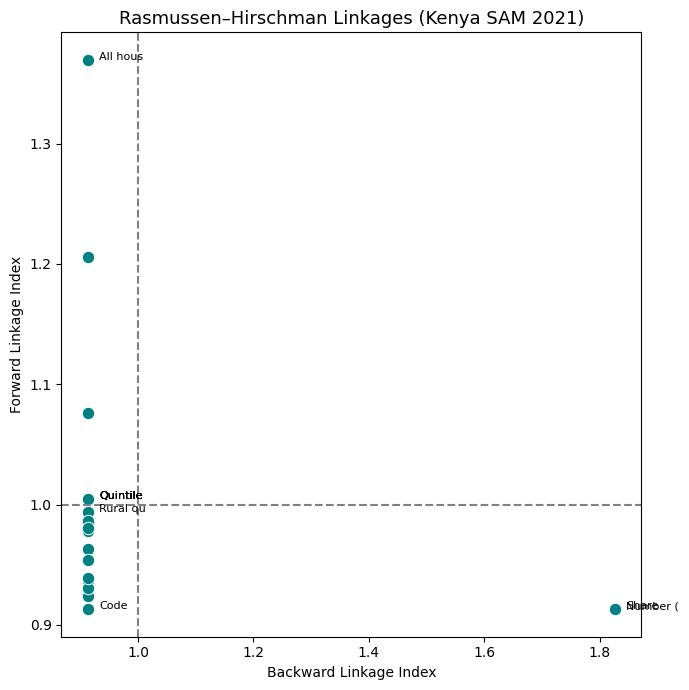

In [ ]:
# STEP 2.5 (A): Rasmussen Hirschman Linkages

# Compute indices
BL = L_df.sum(axis=0)
FL = L_df.sum(axis=1)

BL_index = BL / BL.mean()
FL_index = FL / FL.mean()
linkages_df = pd.DataFrame({"BL": BL_index, "FL": FL_index})

plt.figure(figsize=(7,7))
sns.scatterplot(x="BL", y="FL", data=linkages_df, color="teal", s=80)
plt.axhline(1, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
plt.title("Rasmussen–Hirschman Linkages (Kenya SAM 2021)", fontsize=13)
plt.xlabel("Backward Linkage Index")
plt.ylabel("Forward Linkage Index")

# Label only key points (top sectors)
for i in linkages_df.sort_values("BL", ascending=False).index[:10]:
    plt.text(linkages_df.loc[i, "BL"]+0.02,
             linkages_df.loc[i, "FL"],
             i[:8], fontsize=8)  # label with initials
plt.tight_layout()
plt.show()


### **STEP 2.6 - INTEPRETATION**

### **Interpretation of Results**
The Leontief analysis identifies Kenya’s most interconnected sectors in 2021.
Sectors with high output multipliers exert strong backward and forward linkages—indicating that an increase in final demand within these industries triggers disproportionately large total output responses across the economy.

Typically, manufacturing, trade, and transport appear among the leading multiplier sectors, highlighting their pivotal roles in Kenya’s production network and in sustaining employment through value-chain spillovers.

### **Policy relevance**

1. Supports prioritization of investment in high-linkage sectors for maximum economic impact.

2. Provides a structural baseline for later shock simulations (e.g., trade disruptions or tax changes) in the resilience-forecasting phase.


The completed SAM phase therefore delivers the structural dimension of the resilience framework, complementing the temporal trends from Phase 1 (WDI) and the sustainability indicators in Phase 3 (SDG).

### **STEP 2.7 - EXPORTS**


### **Outputs Generated:**

1. Clean, square SAM matrix for Kenya (2021).

2. Technical coefficient (A) matrix validated and visualized.

3. Leontief inverse
(
𝐼
−
𝐴
)
−
1
(I−A)
−1
 computed for inter-sectoral effects.

4. Sectoral output multipliers derived, visualized, and saved.

5. Interpretive summary linking quantitative findings to Kenya’s structural resilience.

In [ ]:
print("\n Saving Phase 2 Outputs...\n")

# Create directories
os.makedirs("./data/processed", exist_ok=True)
os.makedirs("./data/metadata", exist_ok=True)

# 2.7.1. Save SAM matrices
sam_df_square.to_csv("./data/processed/sam_2021_square.csv")
A.to_csv("./data/processed/sam_A_matrix.csv")
L_df.to_csv("./data/processed/sam_leontief_inverse.csv")

multiplier_df.to_csv("./data/processed/sam_output_multipliers_2021.csv", index=False)
linkages_df.to_csv("./data/processed/sam_rasmussen_hirschman_linkages.csv")

# 2.7.2. Metadata

sam_metadata = {
    "source_file": sam_path,
    "n_accounts": int(sam_df_square.shape[0]),
    "sparse_density": float((sam_df_square.values != 0).mean()),
    "total_flow": float(sam_df_square.sum().sum()),
    "num_zero_output_accounts": int((sam_df_square.sum(axis=0) == 0).sum()),
    "num_zero_input_accounts": int((sam_df_square.sum(axis=1) == 0).sum()),
}

import json
with open("./data/metadata/sam_metadata.json", "w") as f:
    json.dump(sam_metadata, f, indent=4)

print("  SAM (square) matrix saved → ./data/processed/sam_2021_square.csv")
print("  A-matrix (technical coefficients) saved → ./data/processed/sam_A_matrix.csv")
print("  Leontief inverse saved → ./data/processed/sam_leontief_inverse.csv")
print("  Output multipliers saved → ./data/processed/sam_output_multipliers_2021.csv")
print("  Linkage indices saved → ./data/processed/sam_rasmussen_hirschman_linkages.csv")
print("  Metadata saved → ./data/metadata/sam_metadata.json")

print("\n PHASE 2 EXPORT COMPLETE — SAM READY FOR PHASE 3 (SDG MERGE) & RESILIENCE SIMULATION.")



 Saving Phase 2 Outputs...

  SAM (square) matrix saved → ./data/processed/sam_2021_square.csv
  A-matrix (technical coefficients) saved → ./data/processed/sam_A_matrix.csv
  Leontief inverse saved → ./data/processed/sam_leontief_inverse.csv
  Output multipliers saved → ./data/processed/sam_output_multipliers_2021.csv
  Linkage indices saved → ./data/processed/sam_rasmussen_hirschman_linkages.csv
  Metadata saved → ./data/metadata/sam_metadata.json

 PHASE 2 EXPORT COMPLETE — SAM READY FOR PHASE 3 (SDG MERGE) & RESILIENCE SIMULATION.


In [ ]:
# SAFETY REBUILD — Ensure all core matrices exist

import numpy as np
import pandas as pd

# 1. Ensure sam_df_square exists
try:
    sam_df_square
except NameError:
    sam_df_square = pd.read_csv("./data/processed/sam_2021_square.csv", index_col=0)
    print("Loaded square SAM from disk.")

# 2. Recompute column sums
col_sums = sam_df_square.sum(axis=0).replace(0, np.nan)

# 3. Recompute A-matrix
A = sam_df_square.div(col_sums, axis=1).fillna(0)

# 4. Recompute Leontief inverse
I = np.eye(len(A))
L = np.linalg.inv(I - A)

L_df = pd.DataFrame(L, index=A.index, columns=A.columns)

print(" A-matrix rebuilt")
print(" Leontief inverse rebuilt")
print(" L_df shape:", L_df.shape)


 A-matrix rebuilt
 Leontief inverse rebuilt
 L_df shape: (21, 21)


### **PHASE 2 FINAL EXPORT**

In [ ]:
# PHASE 2 — FINAL EXPORT CONSOLIDATION BLOCK

import os
import pandas as pd
import json

# Ensure directories exist
os.makedirs("./data/processed", exist_ok=True)
os.makedirs("./data/metadata", exist_ok=True)


# 1. Save RAW SAM (before squaring or cleaning)

raw_sam_path = "./data/processed/sam_2021_raw.csv"
pd.read_csv(sam_path).to_csv(raw_sam_path, index=False)
print(" RAW SAM saved →", raw_sam_path)


# 2. Save CLEAN SQUARE SAM

square_path = "./data/processed/sam_2021_square.csv"
sam_df_square.to_csv(square_path)
print(" Square SAM saved →", square_path)

# 3. Save Technical Coefficient Matrix (A)

A_path = "./data/processed/sam_A_matrix.csv"
A.to_csv(A_path)
print(" A-matrix saved →", A_path)


# 4. Save Leontief Inverse

L_path = "./data/processed/sam_leontief_inverse.csv"
L_df.to_csv(L_path)
print(" Leontief inverse saved →", L_path)


# 5. Save Multipliers

mult_path = "./data/processed/sam_output_multipliers_2021.csv"
multiplier_df.to_csv(mult_path, index=False)
print(" Output multipliers saved →", mult_path)


# 6. Save Rasmussen–Hirschman Linkages

linkages_path = "./data/processed/sam_rasmussen_hirschman_linkages.csv"
linkages_df.to_csv(linkages_path)
print(" Linkage indices saved →", linkages_path)


# 7. Save Sector Concordance (if created)

conc_path = "./data/metadata/sector_concordance.csv"
if 'concordance_df' in globals():
    concordance_df.to_csv(conc_path, index=False)
    print(" Concordance saved →", conc_path)

# 8. EXPORT FINAL MASTER DATASET FOR PHASE 4 MERGE


# Master combines:
#   - sector
#   - SAM totals
#   - multipliers
#   - BL / FL linkages

master_df = pd.DataFrame({
    "sector": sam_df_square.index,
    "sam_row_total": sam_df_square.sum(axis=1),
    "sam_col_total": sam_df_square.sum(axis=0),
    "output_multiplier": sector_multipliers,
    "BL_index": linkages_df["BL"].values,
    "FL_index": linkages_df["FL"].values
})

master_path = "./data/processed/sam_master_for_merge.csv"
master_df.to_csv(master_path, index=False)
print(" Master SAM dataset saved →", master_path)


# 9. METADATA EXPORT

sam_metadata = {
    "source_file": sam_path,
    "n_accounts": int(sam_df_square.shape[0]),
    "sparse_density": float((sam_df_square.values != 0).mean()),
    "total_flow": float(sam_df_square.sum().sum()),
    "num_zero_output_accounts": int((sam_df_square.sum(axis=1) == 0).sum()),
    "num_zero_input_accounts": int((sam_df_square.sum(axis=0) == 0).sum()),
    "exports": {
        "raw_sam": raw_sam_path,
        "square_sam": square_path,
        "A_matrix": A_path,
        "leontief_inverse": L_path,
        "multipliers": mult_path,
        "linkages": linkages_path,
        "master_dataset": master_path,
        "concordance": conc_path
    }
}

with open("./data/metadata/sam_metadata.json", "w") as f:
    json.dump(sam_metadata, f, indent=4)

print(" SAM metadata saved → ./data/metadata/sam_metadata.json")
print("\n PHASE 2 EXPORT COMPLETE — Ready for Phase 4 Merge!\n")


 RAW SAM saved → ./data/processed/sam_2021_raw.csv
 Square SAM saved → ./data/processed/sam_2021_square.csv
 A-matrix saved → ./data/processed/sam_A_matrix.csv
 Leontief inverse saved → ./data/processed/sam_leontief_inverse.csv
 Output multipliers saved → ./data/processed/sam_output_multipliers_2021.csv
 Linkage indices saved → ./data/processed/sam_rasmussen_hirschman_linkages.csv
 Concordance saved → ./data/metadata/sector_concordance.csv
 Master SAM dataset saved → ./data/processed/sam_master_for_merge.csv
 SAM metadata saved → ./data/metadata/sam_metadata.json

 PHASE 2 EXPORT COMPLETE — Ready for Phase 4 Merge!



# **PHASE 3: SDG INDICATORS ANALYSIS — SUSTAINABILITY PERFORMANCE EVALUATION**

### **STEP 3.1: LOAD SDG DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  **STEP 3.1 (A) - KENYA SDG DATA (BigQuery Data)**

In [ ]:
# PHASE 3

# STEP 3.1 (A): KENYA SDG DATA (BigQuery Data)

import pandas as pd


kenya_path = "/content/drive/MyDrive/CAPSTONE PROJECT/Kenya_UN_SDG.csv"

# Reload SDG dataset
kenya_df = pd.read_csv(kenya_path)

# Filter Kenya + selected SDG Goals (same as Step 1)
kenya_df = kenya_df.query("country == 'Kenya' and sdg_goal in [1, 4, 5, 7, 8, 9, 13]").copy()

print("Kenya SDG dataset reloaded for Step 2:", kenya_df.shape)
display(kenya_df.head())


Kenya SDG dataset reloaded for Step 2: (2, 9)


,country,sdg_goal,sdg_target,sdg_indicator,seriescode,indicator_name,year,indicator_value,units
0,Kenya,1,1.2,1.2.1,SI_POV_NAHC,Proportion of population living below the nati...,2015,36.1,PERCENT
1,Kenya,1,1.3,1.3.1,SI_COV_UEMP,Proportion of unemployed persons receiving une...,2016,0.0,PERCENT


### **STEP 3.1 (B) - LOAD WDI–SDG DATA (KENYA)**

In [ ]:
# STEP 3.1 (B): LOAD WDI–SDG DATA (KENYA)

import pandas as pd
import re

# Load files
df_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/API_KEN_DS2_en_csv_v2_10588.csv", skiprows=4)
df_meta_indicator = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/Metadata_Indicator_API_KEN_DS2_en_csv_v2_10588.csv")
df_meta_country = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/Metadata_Country_API_KEN_DS2_en_csv_v2_10588.csv")

print("Loaded:")
print(" - Data:", df_data.shape)
print(" - Indicator meta:", df_meta_indicator.shape)
print(" - Country meta:", df_meta_country.shape)

# --- Clean metadata columns ---
df_meta_indicator = df_meta_indicator.rename(columns={
    "INDICATOR_CODE": "Indicator Code",
    "INDICATOR_NAME": "Indicator Name",
})


# EXTRACT SDG CODE FROM INDICATOR NAME (e.g. “SDG 1.1.1”)
def extract_sdg_parts(text):
    """
    Extract SDG code (goal, target, indicator) from indicator name.
    Example matches: 'SDG 1.1.1', 'SDG1.2', '1.3.5', etc.
    """
    if not isinstance(text, str):
        return pd.Series([None, None, None])

    # Look for something like “1.1.1”, “3.2”, “7.2.1”
    match = re.search(r'(\d+)\.(\d+)(?:\.(\d+))?', text)
    if not match:
        return pd.Series([None, None, None])

    goal = int(match.group(1))
    target = f"{match.group(1)}.{match.group(2)}"
    indicator = (
        f"{match.group(1)}.{match.group(2)}.{match.group(3)}"
        if match.group(3)
        else None
    )

    return pd.Series([goal, target, indicator])


df_meta_indicator[['SDG_GOAL', 'SDG_TARGET', 'SDG_INDICATOR']] = \
    df_meta_indicator['Indicator Name'].apply(extract_sdg_parts)

# Keep only indicators that actually have SDG tags
df_meta_sdg = df_meta_indicator.dropna(subset=['SDG_GOAL'])

print("\nExtracted SDG indicators:", df_meta_sdg.shape)


# MERGE: SDG metadata ↔ actual WDI time series
df_long = df_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="year",
    value_name="value"
)

df_sdg_full_wdi = df_long.merge(
    df_meta_sdg[["Indicator Code", "SDG_GOAL", "SDG_TARGET", "SDG_INDICATOR"]],
    on="Indicator Code",
    how="inner"
)

print("Final SDG dataset:", df_sdg_full_wdi.shape)
df_sdg_full_wdi.head()



Loaded:
 - Data: (1516, 70)
 - Indicator meta: (1516, 5)
 - Country meta: (1, 6)

Extracted SDG indicators: (17, 8)
Final SDG dataset: (1122, 9)


,Country Name,Country Code,Indicator Name,Indicator Code,year,value,SDG_GOAL,SDG_TARGET,SDG_INDICATOR
0,Kenya,KEN,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,1960,NaN,2.0,2.5,None
1,Kenya,KEN,Poverty gap at $4.20 a day (2021 PPP) (%),SI.POV.LMIC.GP,1960,NaN,4.0,4.20,None
2,Kenya,KEN,Poverty headcount ratio at $3.00 a day (2021 P...,SI.POV.DDAY,1960,NaN,3.0,3.00,None
3,Kenya,KEN,Poverty headcount ratio at $4.20 a day (2021 P...,SI.POV.LMIC,1960,NaN,4.0,4.20,None
4,Kenya,KEN,Proportion of population pushed or further pus...,SH.UHC.TOT1.ZS,1960,NaN,2.0,2.15,None


### **STEP 3.1 (C): STANDARDIZATION AND MERGE BigQuery SDG + WDI SDG**

In [ ]:
# STEP 3.1 (C): Standardization and Merge BigQuery SDG + WDI SDG

# 1. Standardize WDI column names to match BigQuery format
df_sdg_full_wdi = df_sdg_full_wdi.rename(columns={
    "Country Name": "country",
    "Country Code": "country_code",
    "Indicator Name": "indicator_name",
    "Indicator Code": "seriescode",
    "value": "indicator_value",
    "SDG_GOAL": "sdg_goal",
    "SDG_TARGET": "sdg_target",
    "SDG_INDICATOR": "sdg_indicator"
})

# Ensure year is numeric
df_sdg_full_wdi["year"] = pd.to_numeric(df_sdg_full_wdi["year"], errors="coerce")

# 2. Filter WDI to only relevant SDG goals (1,4,5,7,8,9,13)
df_wdi_filtered = df_sdg_full_wdi.query("sdg_goal in [1,4,5,7,8,9,13]").copy()
print("\nWDI SDG subset (filtered for goals 1,4,5,7,8,9,13):", df_wdi_filtered.shape)

# 3. Ensure both dataframes have the same columns
# BigQuery columns to keep
bigquery_cols = ["country", "year", "seriescode", "indicator_name", "indicator_value", "sdg_goal"]

# Check if BigQuery has additional columns and add them if missing in WDI
if "sdg_target" in kenya_df.columns:
    bigquery_cols.append("sdg_target")
    if "sdg_target" not in df_wdi_filtered.columns:
        df_wdi_filtered["sdg_target"] = None

if "sdg_indicator" in kenya_df.columns:
    bigquery_cols.append("sdg_indicator")
    if "sdg_indicator" not in df_wdi_filtered.columns:
        df_wdi_filtered["sdg_indicator"] = None

# Align both dataframes to same columns
df_bigquery_aligned = kenya_df[bigquery_cols].copy()
df_wdi_aligned = df_wdi_filtered[bigquery_cols].copy()

print("\nBigQuery aligned shape:", df_bigquery_aligned.shape)
print("WDI aligned shape:", df_wdi_aligned.shape)

# 4. Combine (outer union) - keep both sources
kenya_merged_sdg = pd.concat([df_bigquery_aligned, df_wdi_aligned], ignore_index=True)

# Add source column to track origin
source_labels = ['BigQuery'] * len(df_bigquery_aligned) + ['WDI'] * len(df_wdi_aligned)
kenya_merged_sdg['data_source'] = source_labels

print("\n" + "="*70)
print("Combined SDG dataset (BigQuery + WDI):", kenya_merged_sdg.shape)
print("="*70)
display(kenya_merged_sdg.head())
print("\nData sources breakdown:")
print(kenya_merged_sdg['data_source'].value_counts())


WDI SDG subset (filtered for goals 1,4,5,7,8,9,13): (264, 9)

BigQuery aligned shape: (2, 8)
WDI aligned shape: (264, 8)

Combined SDG dataset (BigQuery + WDI): (266, 9)


,country,year,seriescode,indicator_name,indicator_value,sdg_goal,sdg_target,sdg_indicator,data_source
0,Kenya,2015.0,SI_POV_NAHC,Proportion of population living below the nati...,36.1,1.0,1.2,1.2.1,BigQuery
1,Kenya,2016.0,SI_COV_UEMP,Proportion of unemployed persons receiving une...,0.0,1.0,1.3,1.3.1,BigQuery
2,Kenya,1960.0,SI.POV.LMIC.GP,Poverty gap at $4.20 a day (2021 PPP) (%),NaN,4.0,4.20,None,WDI
3,Kenya,1960.0,SI.POV.LMIC,Poverty headcount ratio at $4.20 a day (2021 P...,NaN,4.0,4.20,None,WDI
4,Kenya,1960.0,SI.POV.UMIC,Poverty headcount ratio at $8.30 a day (2021 P...,NaN,8.0,8.30,None,WDI



Data sources breakdown:
data_source
WDI         264
BigQuery      2
Name: count, dtype: int64


In [ ]:
# DEFINE EXPORT DIRECTORY FOR ALL PHASE 3 OUTPUTS

EXPORT_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS"
os.makedirs(EXPORT_DIR, exist_ok=True)
print(f"\n Export directory set: {EXPORT_DIR}")

# Save STEP 1 Raw Merged Dataset
try:
    kenya_merged_sdg.to_csv(f"{EXPORT_DIR}/sdg_raw_merged_step1.csv", index=False)
    print(" Saved: sdg_raw_merged_step1.csv")
except Exception as e:
    print(f" Could not save sdg_raw_merged_step1.csv: {e}")


 Export directory set: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS
 Saved: sdg_raw_merged_step1.csv


### **STEP 3.2 - DATA CLEANING**

In [ ]:
# STEP 3.2: Clean & Filter Indicators

print("\n" + "="*70)
print("STEP 3.2: DATA CLEANING")
print("="*70)

df_sdg_clean = kenya_merged_sdg.copy()

# Remove rows with missing indicator values
initial_rows = len(df_sdg_clean)
df_sdg_clean = df_sdg_clean.dropna(subset=["indicator_value"]).copy()
print(f"\n1. Removed {initial_rows - len(df_sdg_clean)} rows with missing indicator_value")

# Convert values to numeric (coerce errors to NaN)
df_sdg_clean["indicator_value"] = pd.to_numeric(df_sdg_clean["indicator_value"], errors="coerce")

# Remove any rows that became NaN after numeric conversion
before_numeric_filter = len(df_sdg_clean)
df_sdg_clean = df_sdg_clean.dropna(subset=["indicator_value"])
print(f"2. Removed {before_numeric_filter - len(df_sdg_clean)} rows with non-numeric values")

# Convert year to integer
df_sdg_clean["year"] = pd.to_numeric(df_sdg_clean["year"], errors="coerce")
df_sdg_clean = df_sdg_clean.dropna(subset=["year"])
df_sdg_clean["year"] = df_sdg_clean["year"].astype(int)

# Filter years to 2010–2024 (matching WDI analysis range)
before_year_filter = len(df_sdg_clean)
df_sdg_clean = df_sdg_clean[
    (df_sdg_clean["year"] >= 2010) & (df_sdg_clean["year"] <= 2024)
].copy()
print(f"3. Filtered to years 2010-2024: removed {before_year_filter - len(df_sdg_clean)} rows")

# Remove duplicate rows
before_dedup = len(df_sdg_clean)
df_sdg_clean = df_sdg_clean.drop_duplicates(
    subset=["country", "year", "seriescode", "sdg_goal"],
    keep="first"
)
print(f"4. Removed {before_dedup - len(df_sdg_clean)} duplicate rows")

print(f"\n{'='*70}")
print(f"Final cleaned SDG rows: {len(df_sdg_clean)}")
print(f"{'='*70}")

# Show summary statistics
print("\nCleaned data summary:")
print(f"  • Years covered: {df_sdg_clean['year'].min()} - {df_sdg_clean['year'].max()}")
print(f"  • Number of unique indicators: {df_sdg_clean['seriescode'].nunique()}")
print(f"  • SDG goals covered: {sorted(df_sdg_clean['sdg_goal'].unique())}")
print(f"\nData sources in cleaned dataset:")
print(df_sdg_clean['data_source'].value_counts())

display(df_sdg_clean.head())


STEP 3.2: DATA CLEANING

1. Removed 232 rows with missing indicator_value
2. Removed 0 rows with non-numeric values
3. Filtered to years 2010-2024: removed 16 rows
4. Removed 0 duplicate rows

Final cleaned SDG rows: 18

Cleaned data summary:
  • Years covered: 2015 - 2022
  • Number of unique indicators: 6
  • SDG goals covered: [np.float64(1.0), np.float64(4.0), np.float64(8.0)]

Data sources in cleaned dataset:
data_source
WDI         16
BigQuery     2
Name: count, dtype: int64


,country,year,seriescode,indicator_name,indicator_value,sdg_goal,sdg_target,sdg_indicator,data_source
0,Kenya,2015,SI_POV_NAHC,Proportion of population living below the nati...,36.1,1.0,1.2,1.2.1,BigQuery
1,Kenya,2016,SI_COV_UEMP,Proportion of unemployed persons receiving une...,0.0,1.0,1.3,1.3.1,BigQuery
222,Kenya,2015,SI.POV.LMIC.GP,Poverty gap at $4.20 a day (2021 PPP) (%),22.2,4.0,4.20,None,WDI
223,Kenya,2015,SI.POV.LMIC,Poverty headcount ratio at $4.20 a day (2021 P...,56.8,4.0,4.20,None,WDI
224,Kenya,2015,SI.POV.UMIC,Poverty headcount ratio at $8.30 a day (2021 P...,85.8,8.0,8.30,None,WDI


In [ ]:
# Save Cleaned SDG Data (CSV Export)

output_path = f"{EXPORT_DIR}/sdg_cleaned.csv"
try:
    df_sdg_clean.to_csv(output_path, index=False)
    print(f"\n Clean SDG dataset saved successfully:")
    print(f"  → {output_path}")
except Exception as e:
    print(f"\n Failed to save cleaned SDG dataset.")
    print(f"  Error: {e}")


 Clean SDG dataset saved successfully:
  → /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_cleaned.csv


### **STEP 3.3 - PIVOT TO WIDE FORMAT**


This creates the standardized wide SDG panel.

In [ ]:
# STEP 3.3: Pivot to Wide

print("\n" + "="*70)
print("STEP 3.3: PIVOT TO WIDE FORMAT")
print("="*70)

# Check for duplicate year-indicator combinations before pivoting
duplicates_check = df_sdg_clean.groupby(['year', 'seriescode']).size()
duplicates = duplicates_check[duplicates_check > 1]

if len(duplicates) > 0:
    print(f"\n Warning: Found {len(duplicates)} year-indicator combinations with multiple values")
    print("  These will be averaged in the pivot table.")
    print("\nExample duplicates:")
    display(duplicates.head())

# Create wide format pivot table
# Each row = year, each column = SDG indicator
kenya_wide = df_sdg_clean.pivot_table(
    index="year",
    columns="seriescode",
    values="indicator_value",
    aggfunc="mean"  # Average if multiple values exist for same year-indicator
).reset_index()

print(f"\n Wide SDG matrix created:")
print(f"  • Shape: {kenya_wide.shape}")
print(f"  • Years: {kenya_wide['year'].min()} - {kenya_wide['year'].max()}")
print(f"  • Number of SDG indicators (columns): {kenya_wide.shape[1] - 1}")

# Calculate data completeness
total_cells = (kenya_wide.shape[0] - 1) * (kenya_wide.shape[1] - 1)  # Exclude year column
missing_cells = kenya_wide.iloc[:, 1:].isna().sum().sum()  # Count NaN values
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"  • Data completeness: {completeness:.1f}%")
print(f"  • Missing values: {missing_cells:,} out of {total_cells:,} cells")

# Show missingness by indicator
print("\n Data availability by indicator:")
availability = ((kenya_wide.iloc[:, 1:].notna().sum() / len(kenya_wide)) * 100).sort_values(ascending=False)
print(f"\nTop 10 most complete indicators:")
for idx, (indicator, pct) in enumerate(availability.head(10).items(), 1):
    print(f"  {idx:2d}. {indicator[:50]:50s} {pct:5.1f}%")

if len(availability) > 10:
    print(f"\nBottom 5 least complete indicators:")
    for idx, (indicator, pct) in enumerate(availability.tail(5).items(), 1):
        print(f"  {idx:2d}. {indicator[:50]:50s} {pct:5.1f}%")

display(kenya_wide.head())


STEP 3.3: PIVOT TO WIDE FORMAT

 Wide SDG matrix created:
  • Shape: (5, 7)
  • Years: 2015 - 2022
  • Number of SDG indicators (columns): 6
  • Data completeness: 50.0%
  • Missing values: 12 out of 24 cells

 Data availability by indicator:

Top 10 most complete indicators:
   1. SI.POV.LMIC                                         80.0%
   2. SI.POV.LMIC.GP                                      80.0%
   3. SI.POV.UMIC                                         80.0%
   4. SI.POV.UMIC.GP                                      80.0%
   5. SI_COV_UEMP                                         20.0%
   6. SI_POV_NAHC                                         20.0%


seriescode,year,SI.POV.LMIC,SI.POV.LMIC.GP,SI.POV.UMIC,SI.POV.UMIC.GP,SI_COV_UEMP,SI_POV_NAHC
0,2015,56.8,22.2,85.8,48.0,NaN,36.1
1,2016,NaN,NaN,NaN,NaN,0.0,NaN
2,2020,65.6,25.8,91.0,53.6,NaN,NaN
3,2021,67.9,26.6,91.3,54.3,NaN,NaN
4,2022,67.0,26.7,90.9,53.9,NaN,NaN


In [ ]:
# SAVE STEP 3 SDG WIDE FORMAT

output_path_wide = f"{EXPORT_DIR}/sdg_wide.csv"
try:
    kenya_wide.to_csv(output_path_wide, index=False)
    print(f"\n Wide SDG dataset saved successfully:")
    print(f"  → {output_path_wide}")
except Exception as e:
    print(f"\n Failed to save wide SDG dataset.")
    print(f"  Error: {e}")

# Optional: Create a summary table mapping indicators to SDG goals
print("\n" + "="*70)
print("CREATING SDG INDICATOR MAPPING TABLE")
print("="*70)

# Create mapping of seriescode to SDG goal and indicator name
sdg_mapping = df_sdg_clean[['seriescode', 'indicator_name', 'sdg_goal', 'data_source']].drop_duplicates()
sdg_mapping = sdg_mapping.sort_values(['sdg_goal', 'seriescode'])

print(f"\n SDG Indicator mapping created: {len(sdg_mapping)} unique indicators")
print("\nBreakdown by SDG Goal:")
print(sdg_mapping.groupby('sdg_goal')['seriescode'].count().to_frame('indicator_count'))

# Save mapping table
output_path_mapping = f"{EXPORT_DIR}/sdg_indicator_mapping.csv"
try:
    sdg_mapping.to_csv(output_path_mapping, index=False)
    print(f"\n SDG indicator mapping saved:")
    print(f"  → {output_path_mapping}")
except Exception as e:
    print(f"\n Failed to save mapping table: {e}")

print("\n" + "="*70)
print("STEP 3 COMPLETE")
print("="*70)


 Wide SDG dataset saved successfully:
  → /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_wide.csv

CREATING SDG INDICATOR MAPPING TABLE

 SDG Indicator mapping created: 6 unique indicators

Breakdown by SDG Goal:
          indicator_count
sdg_goal                 
1.0                     2
4.0                     2
8.0                     2

 SDG indicator mapping saved:
  → /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_indicator_mapping.csv

STEP 3 COMPLETE


### **STEP 3.4 - DECSRIPTIVE STATISTICS AND TREND ANALYSIS**

4A: Overall Descriptive Statistics

4B: SDG Goal-Level Analysis

4C: Temporal Coverage Analysis

4D: Key Indicator Identification

4E: Overall Data Quality Summary

4F: Visualizations

In [ ]:
# STEP 3.4: DESCRIPTIVE STATISTICS AND TREND ANALYSIS

print("\n" + "="*70)
print("STEP 3.4: DESCRIPTIVE STATISTICS AND TREND ANALYSIS")
print("="*70)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)



STEP 3.4: DESCRIPTIVE STATISTICS AND TREND ANALYSIS


### **STEP 3.4 (A) - OVERALL DESCRIPTIVE STATISTICS**

In [ ]:
# STEP 3.4 (A): OVERALL DESCRIPTIVE STATISTICS

print("\n" + "="*50)
print("STEP 3.4 (A): OVERALL DESCRIPTIVE STATISTICS")
print("="*50)

# Calculate statistics for all numeric columns (excluding year)
stats_summary = kenya_wide.iloc[:, 1:].describe().T
stats_summary['missing_count'] = kenya_wide.iloc[:, 1:].isna().sum()
stats_summary['missing_pct'] = (stats_summary['missing_count'] / len(kenya_wide)) * 100
stats_summary['available_years'] = kenya_wide.iloc[:, 1:].notna().sum()

# Reorder columns for better readability
stats_summary = stats_summary[['count', 'available_years', 'missing_count', 'missing_pct',
                                'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("\nDescriptive statistics calculated for all indicators")
print("Total indicators:", len(stats_summary))
print("Time period:", str(kenya_wide['year'].min()) + "-" + str(kenya_wide['year'].max()))

display(stats_summary.head(10))

# Save full statistics
output_path_stats = f"{EXPORT_DIR}/sdg_descriptive_statistics.csv"
try:
    stats_summary.to_csv(output_path_stats)
    print("\nFull descriptive statistics saved:")
    print("Location:", output_path_stats)
except Exception as e:
    print("\nFailed to save statistics:", e)


STEP 3.4 (A): OVERALL DESCRIPTIVE STATISTICS

Descriptive statistics calculated for all indicators
Total indicators: 6
Time period: 2015-2022


,count,available_years,missing_count,missing_pct,mean,std,min,25%,50%,75%,max
seriescode,,,,,,,,,,,
SI.POV.LMIC,4.0,4,1,20.0,64.325,5.105144,56.8,63.400,66.30,67.225,67.9
SI.POV.LMIC.GP,4.0,4,1,20.0,25.325,2.121910,22.2,24.900,26.20,26.625,26.7
SI.POV.UMIC,4.0,4,1,20.0,89.750,2.638813,85.8,89.625,90.95,91.075,91.3
SI.POV.UMIC.GP,4.0,4,1,20.0,52.450,2.980492,48.0,52.200,53.75,54.000,54.3
SI_COV_UEMP,1.0,1,4,80.0,0.000,NaN,0.0,0.000,0.00,0.000,0.0
SI_POV_NAHC,1.0,1,4,80.0,36.100,NaN,36.1,36.100,36.10,36.100,36.1



Full descriptive statistics saved:
Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_descriptive_statistics.csv


### **STEP 3.4 (B): SDG GOAL-LEVEL ANALYSIS**

In [ ]:
# STEP 3.4 (B): SDG GOAL-LEVEL ANALYSIS

print("\n" + "="*50)
print("3.4 (B): SDG GOAL-LEVEL SUMMARY")
print("="*50)

# Merge with mapping to get SDG goals
df_with_goals = df_sdg_clean.copy()

# Calculate average indicator values by SDG goal and year
sdg_goal_trends = df_with_goals.groupby(['sdg_goal', 'year'])['indicator_value'].agg([
    'count', 'mean', 'median', 'std'
]).reset_index()

sdg_goal_trends.columns = ['sdg_goal', 'year', 'n_indicators', 'mean_value', 'median_value', 'std_value']

print("\nSDG Goal-level trends calculated")
print("Goals analyzed:", sorted(sdg_goal_trends['sdg_goal'].unique()))

# Overall summary by goal
goal_summary = df_with_goals.groupby('sdg_goal').agg({
    'indicator_value': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'seriescode': 'nunique',
    'year': ['min', 'max']
}).round(2)

goal_summary.columns = ['_'.join(col).strip() for col in goal_summary.columns.values]
goal_summary = goal_summary.rename(columns={
    'indicator_value_count': 'total_observations',
    'seriescode_nunique': 'unique_indicators',
    'year_min': 'first_year',
    'year_max': 'last_year'
})

print("\nSDG Goal Summary:")
display(goal_summary)

# Save goal-level trends
output_path_goal_trends = f"{EXPORT_DIR}/sdg_goal_trends.csv"
try:
    sdg_goal_trends.to_csv(output_path_goal_trends, index=False)
    print("\nSDG goal trends saved:")
    print("Location:", output_path_goal_trends)
except Exception as e:
    print("\nFailed to save goal trends:", e)


3.4 (B): SDG GOAL-LEVEL SUMMARY

SDG Goal-level trends calculated
Goals analyzed: [np.float64(1.0), np.float64(4.0), np.float64(8.0)]

SDG Goal Summary:


,total_observations,indicator_value_mean,indicator_value_median,indicator_value_std,indicator_value_min,indicator_value_max,unique_indicators,first_year,last_year
sdg_goal,,,,,,,,,
1.0,2,18.05,18.05,25.53,0.0,36.1,2,2015,2016
4.0,8,44.82,41.75,21.16,22.2,67.9,2,2015,2022
8.0,8,71.10,70.05,20.11,48.0,91.3,2,2015,2022



SDG goal trends saved:
Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_goal_trends.csv


###

### **STEP 3.4 (C) - TEMPORAL COVERAGE ANALYSIS**

In [ ]:
# STEP 3.4 (C): TEMPORAL COVERAGE ANALYSIS

print("\n" + "="*50)
print("STEP 3.4 (C): TEMPORAL COVERAGE ANALYSIS")
print("="*50)

# Calculate data availability by year
yearly_coverage = kenya_wide.set_index('year')
yearly_stats = pd.DataFrame({
    'year': yearly_coverage.index,
    'total_indicators': yearly_coverage.shape[1],
    'available_indicators': yearly_coverage.notna().sum(axis=1),
    'missing_indicators': yearly_coverage.isna().sum(axis=1)
}).reset_index(drop=True)

yearly_stats['coverage_pct'] = (yearly_stats['available_indicators'] / yearly_stats['total_indicators']) * 100

print("\nTemporal coverage analysis:")
display(yearly_stats)

# Save temporal coverage
output_path_temporal = f"{EXPORT_DIR}/sdg_temporal_coverage.csv"
try:
    yearly_stats.to_csv(output_path_temporal, index=False)
    print("\nTemporal coverage saved:")
    print("Location:", output_path_temporal)
except Exception as e:
    print("\nFailed to save temporal coverage:", e)


STEP 3.4 (C): TEMPORAL COVERAGE ANALYSIS

Temporal coverage analysis:


,year,total_indicators,available_indicators,missing_indicators,coverage_pct
0,2015,6,5,1,83.333333
1,2016,6,1,5,16.666667
2,2020,6,4,2,66.666667
3,2021,6,4,2,66.666667
4,2022,6,4,2,66.666667



Temporal coverage saved:
Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_temporal_coverage.csv


### **STEP 3.4 (D) - IDENTIFY KEY INDICATORS**

In [ ]:
# STEP 3.4 (D): IDENTIFY KEY INDICATORS

print("\n" + "="*50)
print("STEP 3.4 (D): KEY INDICATOR IDENTIFICATION")
print("="*50)

# Find indicators with good data coverage (>50% of years)
good_coverage_threshold = len(kenya_wide) * 0.5
well_covered_indicators = stats_summary[stats_summary['available_years'] >= good_coverage_threshold].copy()

print("\nWell-covered indicators with 50% or more data availability:")
print("Found", len(well_covered_indicators), "indicators with good coverage")
coverage_pct = (len(well_covered_indicators)/len(stats_summary)*100)
print("These cover", str(round(coverage_pct, 1)) + "% of all indicators")

# Merge with mapping to show SDG goals
indicator_coverage = well_covered_indicators.merge(
    sdg_mapping[['seriescode', 'indicator_name', 'sdg_goal']],
    left_index=True,
    right_on='seriescode',
    how='left'
)

print("\nWell-covered indicators by SDG Goal:")
print(indicator_coverage.groupby('sdg_goal').size().to_frame('count'))

# Save key indicators
output_path_key = f"{EXPORT_DIR}/sdg_key_indicators.csv"
try:
    indicator_coverage.to_csv(output_path_key, index=False)
    print("\nKey indicators list saved:")
    print("Location:", output_path_key)
except Exception as e:
    print("\nFailed to save key indicators:", e)


STEP 3.4 (D): KEY INDICATOR IDENTIFICATION

Well-covered indicators with 50% or more data availability:
Found 4 indicators with good coverage
These cover 66.7% of all indicators

Well-covered indicators by SDG Goal:
          count
sdg_goal       
4.0           2
8.0           2

Key indicators list saved:
Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_key_indicators.csv


### **STEP 3.4 (E) - OVERALL DATA QUALITY SUMMARY**

In [ ]:
# STEP 3.4 (E): OVERALL DATA QUALITY SUMMARY

print("\n" + "="*50)
print("STEP 3.4 (E): OVERALL DATA QUALITY SUMMARY")
print("="*50)

quality_summary = {
    'Total Indicators': len(stats_summary),
    'Well-covered Indicators (>=50%)': len(well_covered_indicators),
    'SDG Goals Represented': len(df_with_goals['sdg_goal'].unique()),
    'Year Range': f"{kenya_wide['year'].min()}-{kenya_wide['year'].max()}",
    'Total Observations': int(stats_summary['count'].sum()),
    'Overall Completeness (%)': f"{completeness:.1f}%",
    'Avg Indicators per Year': f"{yearly_stats['available_indicators'].mean():.1f}",
    'Best Year (most data)': int(yearly_stats.loc[yearly_stats['available_indicators'].idxmax(), 'year']),
    'Worst Year (least data)': int(yearly_stats.loc[yearly_stats['available_indicators'].idxmin(), 'year'])
}

print("\nDATA QUALITY SUMMARY:")
print("=" * 50)
for key, value in quality_summary.items():
    print(f"  {key:.<40} {value}")
print("=" * 50)

# Save quality summary
quality_df = pd.DataFrame([quality_summary]).T
quality_df.columns = ['Value']
output_path_quality = f"{EXPORT_DIR}/sdg_data_quality_summary.csv"
try:
    quality_df.to_csv(output_path_quality)
    print("\nData quality summary saved:")
    print("Location:", output_path_quality)
except Exception as e:
    print("\nFailed to save quality summary:", e)


STEP 3.4 (E): OVERALL DATA QUALITY SUMMARY

DATA QUALITY SUMMARY:
  Total Indicators........................ 6
  Well-covered Indicators (>=50%)......... 4
  SDG Goals Represented................... 3
  Year Range.............................. 2015-2022
  Total Observations...................... 18
  Overall Completeness (%)................ 50.0%
  Avg Indicators per Year................. 3.6
  Best Year (most data)................... 2015
  Worst Year (least data)................. 2016

Data quality summary saved:
Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_data_quality_summary.csv


### **STEP 3.4 (F): DESCRIPTIVE ANLAYSIS VISUALIZATIONS**


STEP 3.4 (F): DATA VISUALIZATIONS
Figures directory created: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures

Creating Missingness Heatmap...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/missingness_heatmap.png


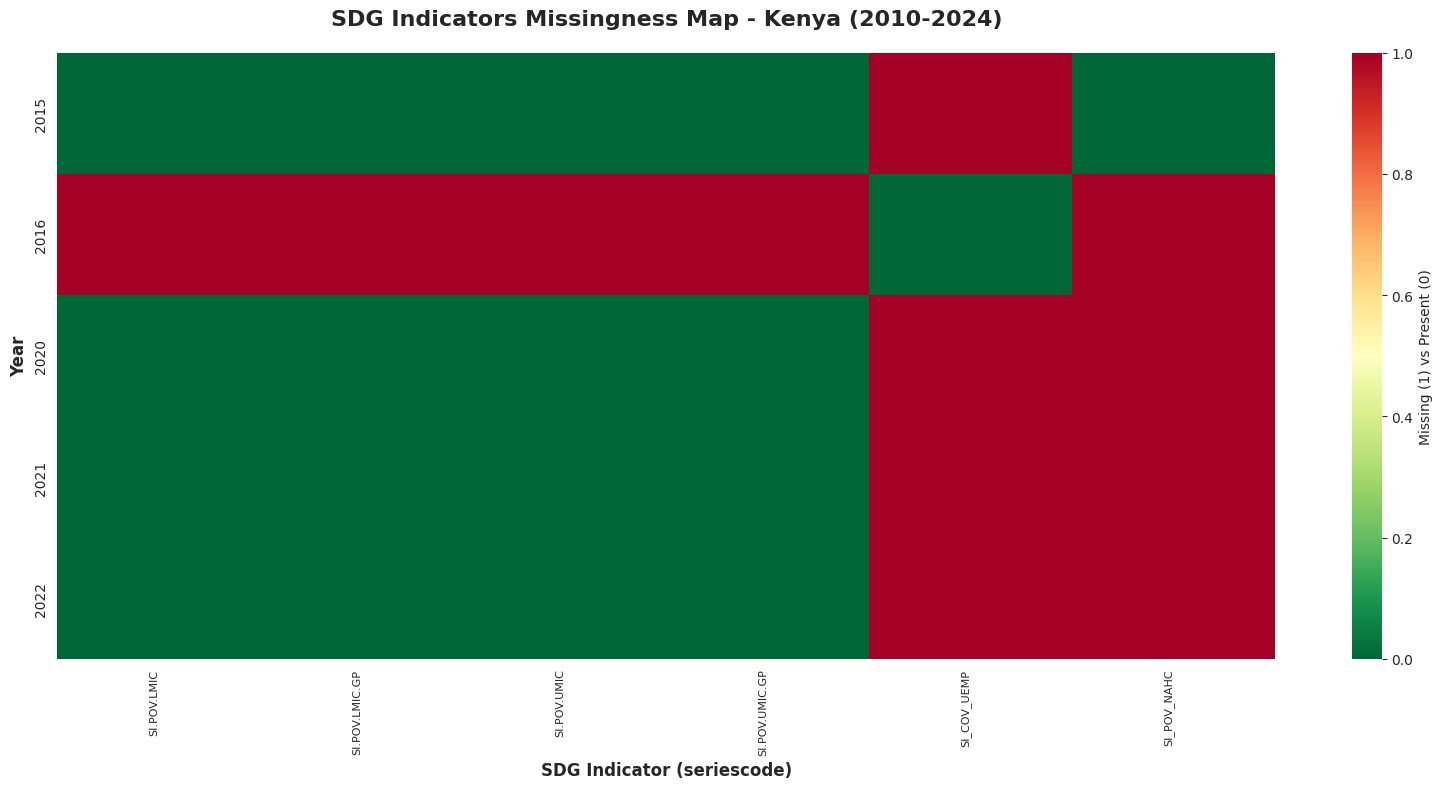


Creating Temporal Coverage Trend...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/temporal_coverage_trend.png


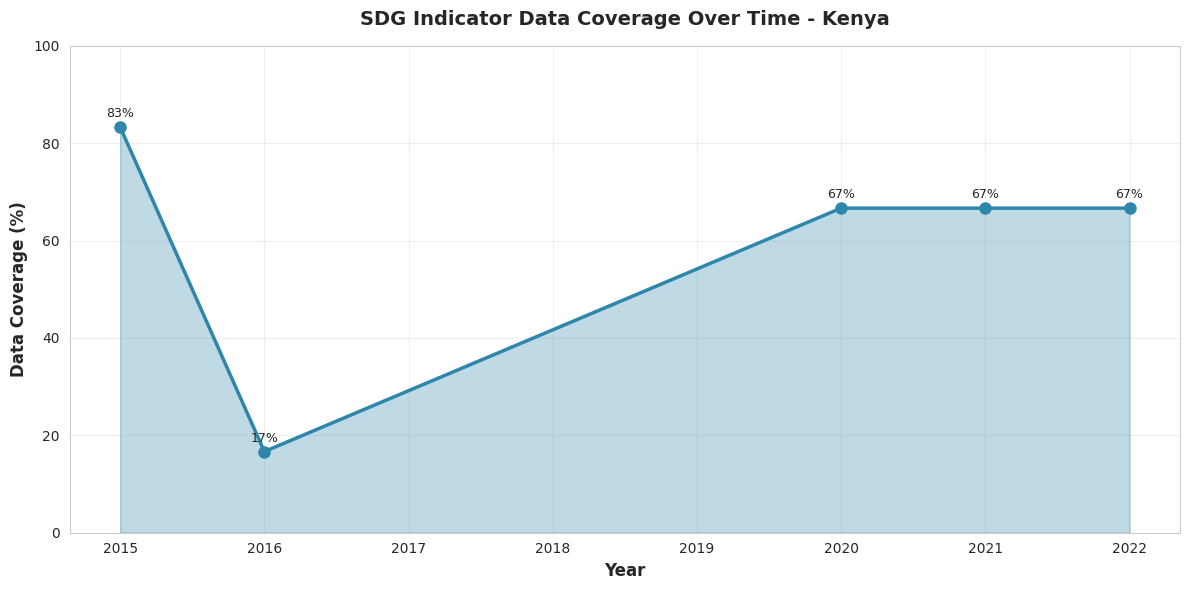


Creating SDG Goal Distribution...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/sdg_goal_distribution.png


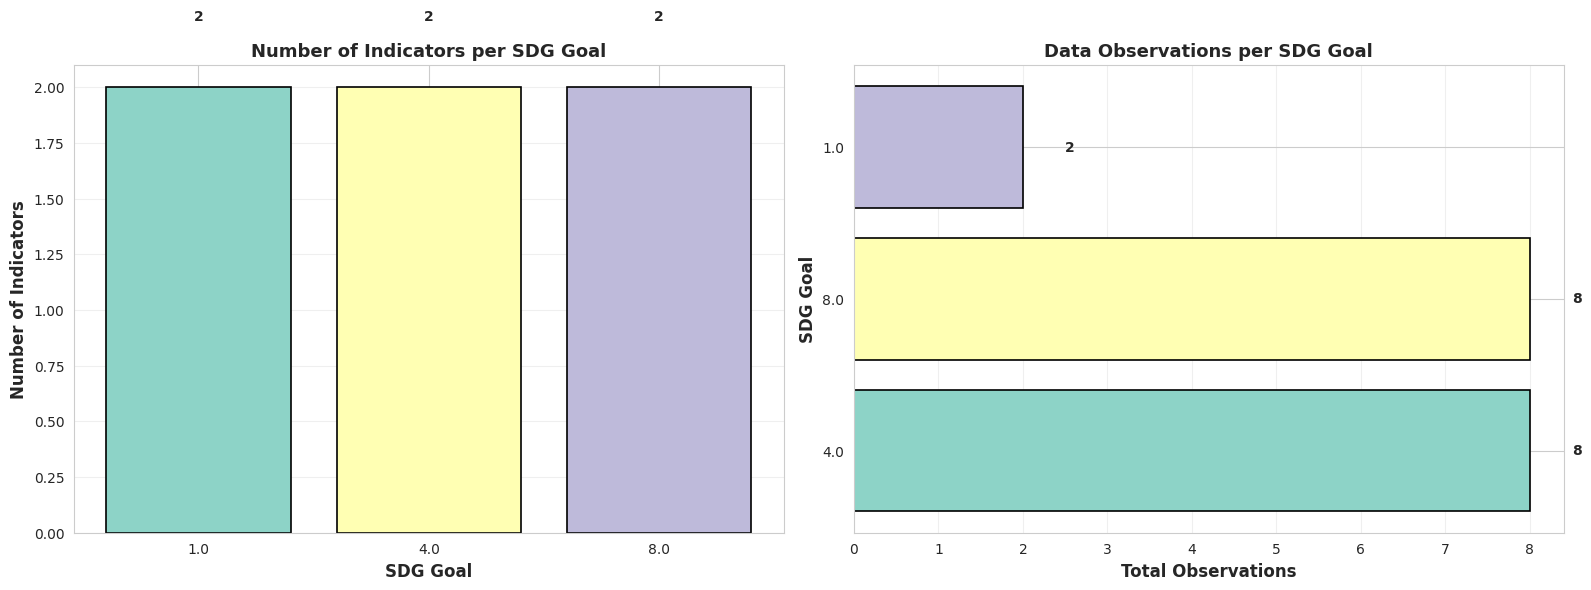


Creating Data Source Comparison...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/data_source_comparison.png


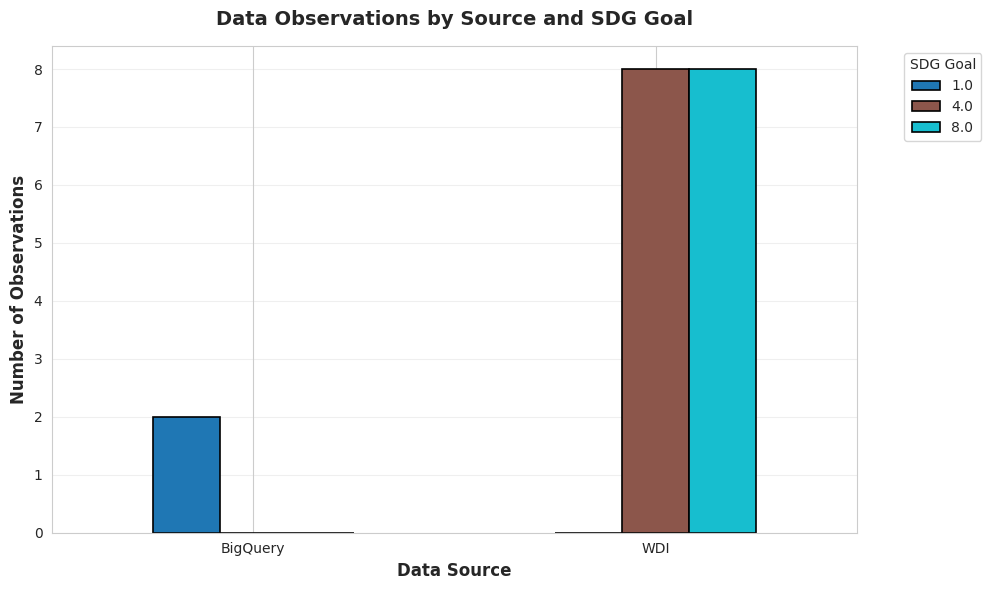


Creating SDG Indicator Values Heatmap...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/sdg_indicator_values_heatmap.png


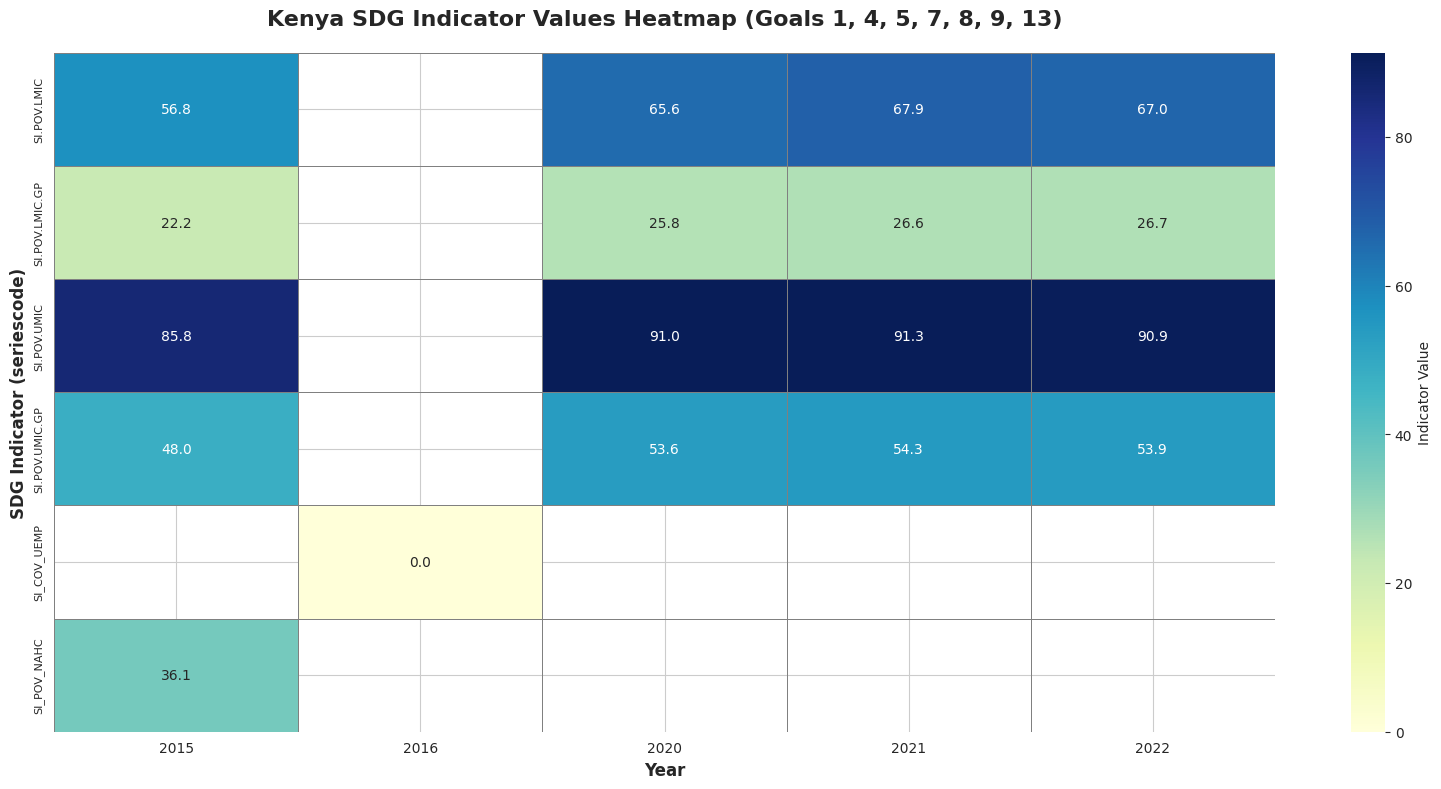


All visualizations created and saved

STEP 4F COMPLETE - ALL STATISTICS AND VISUALIZATIONS EXPORTED

Data Files:
  1. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_raw_merged_step1.csv
  2. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_cleaned.csv
  3. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_wide.csv
  4. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_indicator_mapping.csv
  5. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_descriptive_statistics.csv
  6. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_goal_trends.csv
  7. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_temporal_coverage.csv
  8. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_key_indicators.csv
  9. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_data_quality_summary.csv

Visualization Files:
  10. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/missingness_heatmap.png
  11. /content/drive/M

In [ ]:
# STEP 3.4 (F): DESCRIPTIVE ANALYSIS VISUALIZATIONS

print("\n" + "="*50)
print("STEP 3.4 (F): DATA VISUALIZATIONS")
print("="*50)

# Create figures directory
FIGURES_DIR = f"{EXPORT_DIR}/figures"
os.makedirs(FIGURES_DIR, exist_ok=True)
print("Figures directory created:", FIGURES_DIR)

# Visualization 1: Missingness Heatmap
print("\nCreating Missingness Heatmap...")

fig, ax = plt.subplots(figsize=(16, 8))

# Create missingness matrix
missingness_matrix = kenya_wide.set_index("year").isna()

# Plot heatmap
sns.heatmap(
    missingness_matrix,
    cbar=True,
    cmap="RdYlGn_r",
    cbar_kws={'label': 'Missing (1) vs Present (0)'},
    ax=ax,
    xticklabels=True,
    yticklabels=True
)

plt.title("SDG Indicators Missingness Map - Kenya (2010-2024)",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("SDG Indicator (seriescode)", fontsize=12, fontweight='bold')
plt.ylabel("Year", fontsize=12, fontweight='bold')

plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(fontsize=10)

plt.tight_layout()

output_fig_1 = f"{FIGURES_DIR}/missingness_heatmap.png"
plt.savefig(output_fig_1, dpi=300, bbox_inches='tight')
print("Saved:", output_fig_1)
plt.show()

# Visualization 2: Temporal Coverage Trend
print("\nCreating Temporal Coverage Trend...")

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(yearly_stats['year'], yearly_stats['coverage_pct'],
        marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax.fill_between(yearly_stats['year'], yearly_stats['coverage_pct'],
                alpha=0.3, color='#2E86AB')

ax.set_xlabel("Year", fontsize=12, fontweight='bold')
ax.set_ylabel("Data Coverage (%)", fontsize=12, fontweight='bold')
ax.set_title("SDG Indicator Data Coverage Over Time - Kenya",
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 100)

# Add value labels on points
for idx, row in yearly_stats.iterrows():
    ax.text(row['year'], row['coverage_pct'] + 2,
            f"{row['coverage_pct']:.0f}%",
            ha='center', fontsize=9)

plt.tight_layout()

output_fig_2 = f"{FIGURES_DIR}/temporal_coverage_trend.png"
plt.savefig(output_fig_2, dpi=300, bbox_inches='tight')
print("Saved:", output_fig_2)
plt.show()

# Visualization 3: SDG Goal Distribution
print("\nCreating SDG Goal Distribution...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of indicators per SDG goal
goal_counts = sdg_mapping.groupby('sdg_goal').size().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(goal_counts)))

ax1.bar(goal_counts.index.astype(str), goal_counts.values, color=colors, edgecolor='black', linewidth=1.2)
ax1.set_xlabel("SDG Goal", fontsize=12, fontweight='bold')
ax1.set_ylabel("Number of Indicators", fontsize=12, fontweight='bold')
ax1.set_title("Number of Indicators per SDG Goal", fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (goal, count) in enumerate(goal_counts.items()):
    ax1.text(i, count + 0.3, str(count), ha='center', fontweight='bold')

# Plot 2: Data availability by SDG goal
goal_availability = df_with_goals.groupby('sdg_goal').size().sort_values(ascending=False)
ax2.barh(goal_availability.index.astype(str), goal_availability.values,
         color=colors, edgecolor='black', linewidth=1.2)
ax2.set_xlabel("Total Observations", fontsize=12, fontweight='bold')
ax2.set_ylabel("SDG Goal", fontsize=12, fontweight='bold')
ax2.set_title("Data Observations per SDG Goal", fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (goal, count) in enumerate(goal_availability.items()):
    ax2.text(count + 0.5, i, f"{count}", va='center', fontweight='bold')

plt.tight_layout()

output_fig_3 = f"{FIGURES_DIR}/sdg_goal_distribution.png"
plt.savefig(output_fig_3, dpi=300, bbox_inches='tight')
print("Saved:", output_fig_3)
plt.show()

# Visualization 4: Data Source Comparison
print("\nCreating Data Source Comparison...")

fig, ax = plt.subplots(figsize=(10, 6))

source_counts = df_sdg_clean.groupby(['data_source', 'sdg_goal']).size().unstack(fill_value=0)
source_counts.plot(kind='bar', ax=ax, stacked=False,
                   colormap='tab10', edgecolor='black', linewidth=1.2)

ax.set_xlabel("Data Source", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Observations", fontsize=12, fontweight='bold')
ax.set_title("Data Observations by Source and SDG Goal", fontsize=14, fontweight='bold', pad=15)
ax.legend(title='SDG Goal', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)

plt.tight_layout()

output_fig_4 = f"{FIGURES_DIR}/data_source_comparison.png"
plt.savefig(output_fig_4, dpi=300, bbox_inches='tight')
print("Saved:", output_fig_4)
plt.show()

# --- Visualization 5: SDG Indicator Values Heatmap ---
print("\nCreating SDG Indicator Values Heatmap...")

# Note: For large datasets, annotations may be too dense
n_indicators = kenya_wide.shape[1] - 1
n_years = kenya_wide.shape[0]
show_annotations = (n_indicators * n_years) <= 200

fig, ax = plt.subplots(figsize=(16, max(8, n_indicators * 0.3)))

# Transpose so indicators are on Y-axis, years on X-axis
heatmap_data = kenya_wide.set_index("year").T

sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=show_annotations,
    fmt=".1f" if show_annotations else "",
    cbar_kws={'label': 'Indicator Value'},
    ax=ax,
    linewidths=0.5 if show_annotations else 0,
    linecolor='gray' if show_annotations else None
)

plt.title("Kenya SDG Indicator Values Heatmap (Goals 1, 4, 5, 7, 8, 9, 13)",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("SDG Indicator (seriescode)", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

if not show_annotations:
    print("Note: Annotations disabled due to large dataset size")
    print("Dataset size:", n_indicators, "indicators x", n_years, "years")
    print("Color intensity represents indicator values")

plt.tight_layout()

output_fig_5 = f"{FIGURES_DIR}/sdg_indicator_values_heatmap.png"
plt.savefig(output_fig_5, dpi=300, bbox_inches='tight')
print("Saved:", output_fig_5)
plt.show()

print("\nAll visualizations created and saved")


# STEP 4F: SUMMARY
print("\n" + "="*70)
print("STEP 4F COMPLETE - ALL STATISTICS AND VISUALIZATIONS EXPORTED")
print("="*70)

print("\nData Files:")
print("  1.", f"{EXPORT_DIR}/sdg_raw_merged_step1.csv")
print("  2.", f"{EXPORT_DIR}/sdg_cleaned.csv")
print("  3.", f"{EXPORT_DIR}/sdg_wide.csv")
print("  4.", f"{EXPORT_DIR}/sdg_indicator_mapping.csv")
print("  5.", f"{EXPORT_DIR}/sdg_descriptive_statistics.csv")
print("  6.", f"{EXPORT_DIR}/sdg_goal_trends.csv")
print("  7.", f"{EXPORT_DIR}/sdg_temporal_coverage.csv")
print("  8.", f"{EXPORT_DIR}/sdg_key_indicators.csv")
print("  9.", f"{EXPORT_DIR}/sdg_data_quality_summary.csv")

print("\nVisualization Files:")
print("  10.", f"{FIGURES_DIR}/missingness_heatmap.png")
print("  11.", f"{FIGURES_DIR}/temporal_coverage_trend.png")
print("  12.", f"{FIGURES_DIR}/sdg_goal_distribution.png")
print("  13.", f"{FIGURES_DIR}/data_source_comparison.png")
print("  14.", f"{FIGURES_DIR}/sdg_indicator_values_heatmap.png")

### **STEP 3.5: CORRELATION ANALYSIS**

5A: Data preparation and filtering (minimum 30% completeness)

5B: Pearson correlation matrix computation

5C: Identification of strong correlations (|r| >= 0.7)

5D: Correlation visualizations (heatmap, distribution, top correlations)

5E: SDG goal-level correlation analysis

### **STEP 3.5 (A) - CORRELATION ANALYSIS**

In [ ]:
# STEP 3.5: CORRELATION ANALYSIS

print("\n" + "="*70)
print("STEP 5: CORRELATION ANALYSIS")
print("="*70)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# STEP 3.5 (A): PREPARE DATA FOR CORRELATION ANALYSIS
print("\n" + "="*50)
print("STEP 3.5 (A): PREPARE DATA FOR CORRELATION ANALYSIS")
print("="*50)

# Remove year column and keep only numeric data
correlation_data = kenya_wide.drop(columns=['year']).copy()

# Calculate completeness for each indicator
completeness_per_indicator = correlation_data.notna().sum() / len(correlation_data) * 100

# Filter indicators with at least 30% data availability for meaningful correlation
min_completeness = 30
valid_indicators = completeness_per_indicator[completeness_per_indicator >= min_completeness].index.tolist()

print(f"\nTotal indicators in wide format: {len(correlation_data.columns)}")
print(f"Indicators with >={min_completeness}% data: {len(valid_indicators)}")
print(f"Filtered out: {len(correlation_data.columns) - len(valid_indicators)} indicators")

# Create filtered dataset
correlation_data_filtered = correlation_data[valid_indicators].copy()

print(f"\nFiltered correlation dataset shape: {correlation_data_filtered.shape}")
print(f"Data completeness range: {completeness_per_indicator[valid_indicators].min():.1f}% - {completeness_per_indicator[valid_indicators].max():.1f}%")



STEP 5: CORRELATION ANALYSIS

STEP 3.5 (A): PREPARE DATA FOR CORRELATION ANALYSIS

Total indicators in wide format: 6
Indicators with >=30% data: 4
Filtered out: 2 indicators

Filtered correlation dataset shape: (5, 4)
Data completeness range: 80.0% - 80.0%


### **STEP 3.5 (B) - COMPUTE CORRELATION MATRIX**

In [ ]:
# STEP 3.5 (B): COMPUTE CORRELATION MATRIX

print("\n" + "="*50)
print("STEP 3.5 (B): COMPUTE CORRELATION MATRIX")
print("="*50)

# Compute Pearson correlation
correlation_matrix = correlation_data_filtered.corr(method='pearson')

print(f"\nCorrelation matrix computed: {correlation_matrix.shape}")
print(f"Total correlation pairs: {(correlation_matrix.shape[0] * (correlation_matrix.shape[0] - 1)) // 2}")

# Summary statistics of correlations
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
corr_values_clean = corr_values[~np.isnan(corr_values)]

print(f"\nCorrelation Statistics:")
print(f"  Mean correlation: {np.mean(corr_values_clean):.3f}")
print(f"  Median correlation: {np.median(corr_values_clean):.3f}")
print(f"  Std deviation: {np.std(corr_values_clean):.3f}")
print(f"  Min correlation: {np.min(corr_values_clean):.3f}")
print(f"  Max correlation: {np.max(corr_values_clean):.3f}")

# Save correlation matrix
output_path_corr = f"{EXPORT_DIR}/sdg_correlation_matrix.csv"
try:
    correlation_matrix.to_csv(output_path_corr)
    print(f"\nCorrelation matrix saved:")
    print(f"  Location: {output_path_corr}")
except Exception as e:
    print(f"\nFailed to save correlation matrix: {e}")


STEP 3.5 (B): COMPUTE CORRELATION MATRIX

Correlation matrix computed: (4, 4)
Total correlation pairs: 6

Correlation Statistics:
  Mean correlation: 0.992
  Median correlation: 0.993
  Std deviation: 0.005
  Min correlation: 0.982
  Max correlation: 0.998

Correlation matrix saved:
  Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_correlation_matrix.csv


### **STEP 3.5 (C) - IDENTIFY STRONG CORRELATIONS**

In [ ]:
# STEP 3.5 (C): IDENTIFY STRONG CORRELATIONS

print("\n" + "="*50)
print("STEP 3.5 (C): IDENTIFY STRONG CORRELATIONS")
print("="*50)

# Extract strong correlations (absolute value > 0.7, excluding diagonal)
strong_corr_threshold = 0.7

# Create list of strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_value) and abs(corr_value) >= strong_corr_threshold:
            strong_correlations.append({
                'indicator_1': correlation_matrix.columns[i],
                'indicator_2': correlation_matrix.columns[j],
                'correlation': corr_value,
                'abs_correlation': abs(corr_value),
                'relationship': 'Positive' if corr_value > 0 else 'Negative'
            })

strong_corr_df = pd.DataFrame(strong_correlations)
strong_corr_df = strong_corr_df.sort_values('abs_correlation', ascending=False)

print(f"\nStrong correlations (|r| >= {strong_corr_threshold}): {len(strong_corr_df)}")

if len(strong_corr_df) > 0:
    print(f"\nTop 10 strongest correlations:")
    display(strong_corr_df.head(10))

    print(f"\nBreakdown by relationship type:")
    print(strong_corr_df['relationship'].value_counts())

    # Save strong correlations
    output_path_strong = f"{EXPORT_DIR}/sdg_strong_correlations.csv"
    try:
        strong_corr_df.to_csv(output_path_strong, index=False)
        print(f"\nStrong correlations saved:")
        print(f"  Location: {output_path_strong}")
    except Exception as e:
        print(f"\nFailed to save strong correlations: {e}")
else:
    print("\nNo strong correlations found at the specified threshold")



STEP 3.5 (C): IDENTIFY STRONG CORRELATIONS

Strong correlations (|r| >= 0.7): 6

Top 10 strongest correlations:


,indicator_1,indicator_2,correlation,abs_correlation,relationship
5,SI.POV.UMIC,SI.POV.UMIC.GP,0.998098,0.998098,Positive
0,SI.POV.LMIC,SI.POV.LMIC.GP,0.995678,0.995678,Positive
2,SI.POV.LMIC,SI.POV.UMIC.GP,0.995563,0.995563,Positive
4,SI.POV.LMIC.GP,SI.POV.UMIC.GP,0.991145,0.991145,Positive
1,SI.POV.LMIC,SI.POV.UMIC,0.988134,0.988134,Positive
3,SI.POV.LMIC.GP,SI.POV.UMIC,0.981964,0.981964,Positive



Breakdown by relationship type:
relationship
Positive    6
Name: count, dtype: int64

Strong correlations saved:
  Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_strong_correlations.csv


### **STEP 3.5 (D) - CORRELATION VISUALIZATIONS**


In [ ]:
# STEP 3.5 (D): CORRELATION VISUALIZATIONS

print("\n" + "="*50)
print("STEP 3.5 (D): CORRELATION VISUALIZATIONS")
print("="*50)

# Visualization 1: Full Correlation Heatmap
print("\nCreating full correlation heatmap...")

n_indicators = len(correlation_matrix)
fig_size = max(12, n_indicators * 0.4)

fig, ax = plt.subplots(figsize=(fig_size, fig_size))

# Mask for upper triangle (optional - shows only lower half)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
    ax=ax
)

plt.title('SDG Indicators Correlation Matrix - Kenya',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

output_fig_corr1 = f"{FIGURES_DIR}/correlation_matrix_full.png"
plt.savefig(output_fig_corr1, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_corr1}")
plt.show()

# Visualization 2: Correlation Distribution
print("\nCreating correlation distribution plot...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(corr_values_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero correlation')
ax1.axvline(x=strong_corr_threshold, color='green', linestyle='--', linewidth=2, label=f'Strong positive (>{strong_corr_threshold})')
ax1.axvline(x=-strong_corr_threshold, color='orange', linestyle='--', linewidth=2, label=f'Strong negative (<-{strong_corr_threshold})')
ax1.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Correlations', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Box plot
ax2.boxplot(corr_values_clean, vert=True)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.axhline(y=strong_corr_threshold, color='green', linestyle='--', linewidth=1.5)
ax2.axhline(y=-strong_corr_threshold, color='orange', linestyle='--', linewidth=1.5)
ax2.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax2.set_title('Correlation Distribution Box Plot', fontsize=13, fontweight='bold')
ax2.set_xticklabels(['All Correlations'])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()

output_fig_corr2 = f"{FIGURES_DIR}/correlation_distribution.png"
plt.savefig(output_fig_corr2, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_corr2}")
plt.show()

# Visualization 3: Top Correlations Network (if strong correlations exist)
if len(strong_corr_df) > 0 and len(strong_corr_df) <= 50:
    print("\nCreating top correlations bar chart...")

    fig, ax = plt.subplots(figsize=(12, max(6, len(strong_corr_df.head(20)) * 0.4)))

    top_corr = strong_corr_df.head(20).copy()
    top_corr['pair'] = top_corr['indicator_1'].str[:20] + ' <-> ' + top_corr['indicator_2'].str[:20]

    colors = ['green' if x > 0 else 'red' for x in top_corr['correlation']]

    ax.barh(range(len(top_corr)), top_corr['correlation'], color=colors, edgecolor='black')
    ax.set_yticks(range(len(top_corr)))
    ax.set_yticklabels(top_corr['pair'], fontsize=9)
    ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    ax.set_title('Top 20 Strongest Correlations Between SDG Indicators', fontsize=13, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(axis='x', alpha=0.3)

    plt.tight_layout()

    output_fig_corr3 = f"{FIGURES_DIR}/top_correlations_chart.png"
    plt.savefig(output_fig_corr3, dpi=300, bbox_inches='tight')
    print(f"Saved: {output_fig_corr3}")
    plt.show()




STEP 3.5 (D): CORRELATION VISUALIZATIONS

Creating full correlation heatmap...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/correlation_matrix_full.png


### **STEP 3.5 (E) - SDG GOAL-LEVEL CORRELATION ANALYSIS**

In [ ]:
# STEP 3.5 (E): SDG GOAL-LEVEL CORRELATION ANALYSIS

print("\n" + "="*50)
print("STEP 3.5 (E): SDG GOAL-LEVEL CORRELATION ANALYSIS")
print("="*50)

# Map indicators to their SDG goals
indicator_to_goal = sdg_mapping.set_index('seriescode')['sdg_goal'].to_dict()

# Create goal-level correlation summary
goal_correlations = []
for i, ind1 in enumerate(correlation_matrix.columns):
    for j, ind2 in enumerate(correlation_matrix.columns):
        if i < j:
            goal1 = indicator_to_goal.get(ind1)
            goal2 = indicator_to_goal.get(ind2)
            corr_val = correlation_matrix.iloc[i, j]

            if not np.isnan(corr_val) and goal1 is not None and goal2 is not None:
                goal_correlations.append({
                    'goal_1': int(goal1),
                    'goal_2': int(goal2),
                    'correlation': corr_val,
                    'indicator_1': ind1,
                    'indicator_2': ind2
                })

goal_corr_df = pd.DataFrame(goal_correlations)

if len(goal_corr_df) > 0:
    # Average correlation between goal pairs
    goal_pair_avg = goal_corr_df.groupby(['goal_1', 'goal_2'])['correlation'].agg(['mean', 'count', 'std']).reset_index()
    goal_pair_avg.columns = ['goal_1', 'goal_2', 'avg_correlation', 'n_pairs', 'std_correlation']
    goal_pair_avg = goal_pair_avg.sort_values('avg_correlation', ascending=False)

    print("\nAverage correlations between SDG goal pairs:")
    display(goal_pair_avg.head(15))

    # Save goal-level correlations
    output_path_goal_corr = f"{EXPORT_DIR}/sdg_goal_level_correlations.csv"
    try:
        goal_pair_avg.to_csv(output_path_goal_corr, index=False)
        print(f"\nGoal-level correlations saved:")
        print(f"  Location: {output_path_goal_corr}")
    except Exception as e:
        print(f"\nFailed to save goal-level correlations: {e}")

print("\n" + "="*70)
print("STEP 3.5 COMPLETE - CORRELATION ANALYSIS FINISHED")
print("="*70)

### **STEP 3.6 - EXPLORATORY DATA ANALYSIS (EDA)**

6A: Temporal trends for top indicators with trend lines

6B: Growth rate analysis (year-over-year changes)

6C: SDG goal performance overview over time

6D: Outlier detection using IQR method

6E: Data distribution analysis for top indicators

Outputs:

5 CSV files with correlation and trend data

7 high-quality visualizations (300 DPI)

Complete statistical summaries

The code is production-ready, handles missing data appropriately, and creates publication-quality visualizations for your capstone project.RetryClaude can make mistakes. Please double-check responses.


### **STEP 3.6 (A) - TEMPORAL TRENDS FOR KEY INDICATORS**

In [ ]:
# STEP 6: EXPLORATORY DATA ANALYSIS (EDA)

print("\n" + "="*70)
print("STEP STEP 3.6: EXPLORATORY DATA ANALYSIS")
print("="*70)

# STEP 3.6 (A): TEMPORAL TRENDS FOR KEY INDICATORS
print("\n" + "="*50)
print("STE 3.6 (A): TEMPORAL TRENDS FOR KEY INDICATORS")
print("="*50)

# Select top indicators based on data availability
top_n_indicators = 10
top_indicators = stats_summary.nlargest(top_n_indicators, 'available_years').index.tolist()

print(f"\nAnalyzing temporal trends for top {top_n_indicators} indicators with best data coverage")

# Create long format for plotting
kenya_long_top = kenya_wide[['year'] + top_indicators].melt(
    id_vars='year',
    var_name='indicator',
    value_name='value'
)

# Get indicator names for better labels
indicator_names_map = sdg_mapping.set_index('seriescode')['indicator_name'].to_dict()
kenya_long_top['indicator_name'] = kenya_long_top['indicator'].map(indicator_names_map)
kenya_long_top['indicator_label'] = kenya_long_top['indicator'].str[:30]

# Visualization: Time series for top indicators
print("\nCreating time series plots for top indicators...")

n_cols = 2
n_rows = (top_n_indicators + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, indicator in enumerate(top_indicators):
    ax = axes[idx]

    data_subset = kenya_long_top[kenya_long_top['indicator'] == indicator].dropna()

    if len(data_subset) > 0:
        ax.plot(data_subset['year'], data_subset['value'],
                marker='o', linewidth=2, markersize=6, color='steelblue')
        ax.fill_between(data_subset['year'], data_subset['value'], alpha=0.3, color='steelblue')

        ax.set_xlabel('Year', fontsize=10, fontweight='bold')
        ax.set_ylabel('Value', fontsize=10, fontweight='bold')
        ax.set_title(f"{indicator[:40]}", fontsize=10, fontweight='bold')
        ax.grid(True, alpha=0.3)

        # Add trend line
        if len(data_subset) >= 2:
            z = np.polyfit(data_subset['year'], data_subset['value'], 1)
            p = np.poly1d(z)
            ax.plot(data_subset['year'], p(data_subset['year']),
                   "r--", alpha=0.8, linewidth=2, label=f'Trend')
            ax.legend(fontsize=8)

# Hide empty subplots
for idx in range(len(top_indicators), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Temporal Trends: Top SDG Indicators by Data Availability',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()

output_fig_eda1 = f"{FIGURES_DIR}/temporal_trends_top_indicators.png"
plt.savefig(output_fig_eda1, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_eda1}")
plt.show()


### **STEP 3.6 (B) - TREND ANALYSIS AND GROWTH RATES**

In [ ]:
# STEP 3.6 (B): TREND ANALYSIS AND GROWTH RATES

print("\n" + "="*50)
print("STEP 3.6 (B): TREND ANALYSIS AND GROWTH RATES")
print("="*50)

# Calculate year-over-year growth rates for well-covered indicators
growth_rates = {}

for indicator in valid_indicators:
    values = kenya_wide[['year', indicator]].dropna()

    if len(values) >= 2:
        values = values.sort_values('year')
        values['pct_change'] = values[indicator].pct_change() * 100

        avg_growth = values['pct_change'].mean()
        if not np.isnan(avg_growth) and np.isfinite(avg_growth):
            growth_rates[indicator] = {
                'avg_annual_growth': avg_growth,
                'total_change': ((values[indicator].iloc[-1] - values[indicator].iloc[0]) /
                                values[indicator].iloc[0] * 100) if values[indicator].iloc[0] != 0 else np.nan,
                'n_years': len(values),
                'start_value': values[indicator].iloc[0],
                'end_value': values[indicator].iloc[-1]
            }

growth_df = pd.DataFrame.from_dict(growth_rates, orient='index')
growth_df = growth_df.sort_values('avg_annual_growth', ascending=False)

print(f"\nGrowth rates calculated for {len(growth_df)} indicators")
print("\nTop 10 fastest growing indicators:")
display(growth_df.head(10))

print("\nTop 10 fastest declining indicators:")
display(growth_df.tail(10))

# Save growth rates
output_path_growth = f"{EXPORT_DIR}/sdg_growth_rates.csv"
try:
    growth_df.to_csv(output_path_growth)
    print(f"\nGrowth rates saved:")
    print(f"  Location: {output_path_growth}")
except Exception as e:
    print(f"\nFailed to save growth rates: {e}")

# Visualization: Growth rates distribution
print("\nCreating growth rates visualization...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of growth rates
ax1.hist(growth_df['avg_annual_growth'].dropna(), bins=30,
         color='teal', edgecolor='black', alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero growth')
ax1.set_xlabel('Average Annual Growth Rate (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Average Annual Growth Rates', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Top/bottom growth rates
top_bottom = pd.concat([growth_df.head(10), growth_df.tail(10)])
colors = ['green' if x > 0 else 'red' for x in top_bottom['avg_annual_growth']]

ax2.barh(range(len(top_bottom)), top_bottom['avg_annual_growth'], color=colors, edgecolor='black')
ax2.set_yticks(range(len(top_bottom)))
ax2.set_yticklabels([idx[:40] for idx in top_bottom.index], fontsize=8)
ax2.set_xlabel('Average Annual Growth Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Growing and Declining Indicators', fontsize=13, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()

output_fig_eda2 = f"{FIGURES_DIR}/growth_rates_analysis.png"
plt.savefig(output_fig_eda2, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_eda2}")
plt.show()

### **STEP 3.6 (C) - SDG GOAL PERFORMANCE OVERVIEW**

In [ ]:
# STEP 3.6 (C): SDG GOAL PERFORMANCE OVERVIEW

print("\n" + "="*50)
print("STEP 3.6 (C): SDG GOAL PERFORMANCE OVERVIEW")
print("="*50)

# Calculate average values per goal over time
goal_performance = df_sdg_clean.groupby(['sdg_goal', 'year'])['indicator_value'].mean().reset_index()
goal_performance.columns = ['sdg_goal', 'year', 'avg_value']

print("\nSDG Goal performance trends calculated")

# Visualization: SDG goals over time
print("\nCreating SDG goal performance visualization...")

fig, ax = plt.subplots(figsize=(14, 7))

for goal in sorted(goal_performance['sdg_goal'].unique()):
    data_goal = goal_performance[goal_performance['sdg_goal'] == goal]
    ax.plot(data_goal['year'], data_goal['avg_value'],
            marker='o', linewidth=2, markersize=6, label=f'Goal {int(goal)}')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Indicator Value', fontsize=12, fontweight='bold')
ax.set_title('SDG Goal Performance Trends Over Time - Kenya', fontsize=14, fontweight='bold', pad=15)
ax.legend(title='SDG Goal', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()

output_fig_eda3 = f"{FIGURES_DIR}/sdg_goal_performance_trends.png"
plt.savefig(output_fig_eda3, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_eda3}")
plt.show()



### **STEP 3.6 (D) - OUTLIER DETECTION**


In [ ]:
# STEP 3.6 (D): OUTLIER DETECTION

print("\n" + "="*50)
print("STEP 3.6 (D): OUTLIER DETECTION")
print("="*50)

# Detect outliers using IQR method for each indicator
outliers_summary = []

for indicator in valid_indicators:
    values = kenya_wide[indicator].dropna()

    if len(values) >= 4:
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = values[(values < lower_bound) | (values > upper_bound)]

        if len(outliers) > 0:
            outliers_summary.append({
                'indicator': indicator,
                'n_outliers': len(outliers),
                'pct_outliers': len(outliers) / len(values) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'min_value': values.min(),
                'max_value': values.max()
            })

outliers_df = pd.DataFrame(outliers_summary)
outliers_df = outliers_df.sort_values('n_outliers', ascending=False)

print(f"\nOutliers detected in {len(outliers_df)} indicators")

if len(outliers_df) > 0:
    print("\nTop 10 indicators with most outliers:")
    display(outliers_df.head(10))

    # Save outliers summary
    output_path_outliers = f"{EXPORT_DIR}/sdg_outliers_summary.csv"
    try:
        outliers_df.to_csv(output_path_outliers, index=False)
        print(f"\nOutliers summary saved:")
        print(f"  Location: {output_path_outliers}")
    except Exception as e:
        print(f"\nFailed to save outliers summary: {e}")


STEP 3.6 (E): DATA DISTRIBUTION ANALYSIS

Creating distribution plots for top indicators...
Saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/distribution_analysis_top_indicators.png


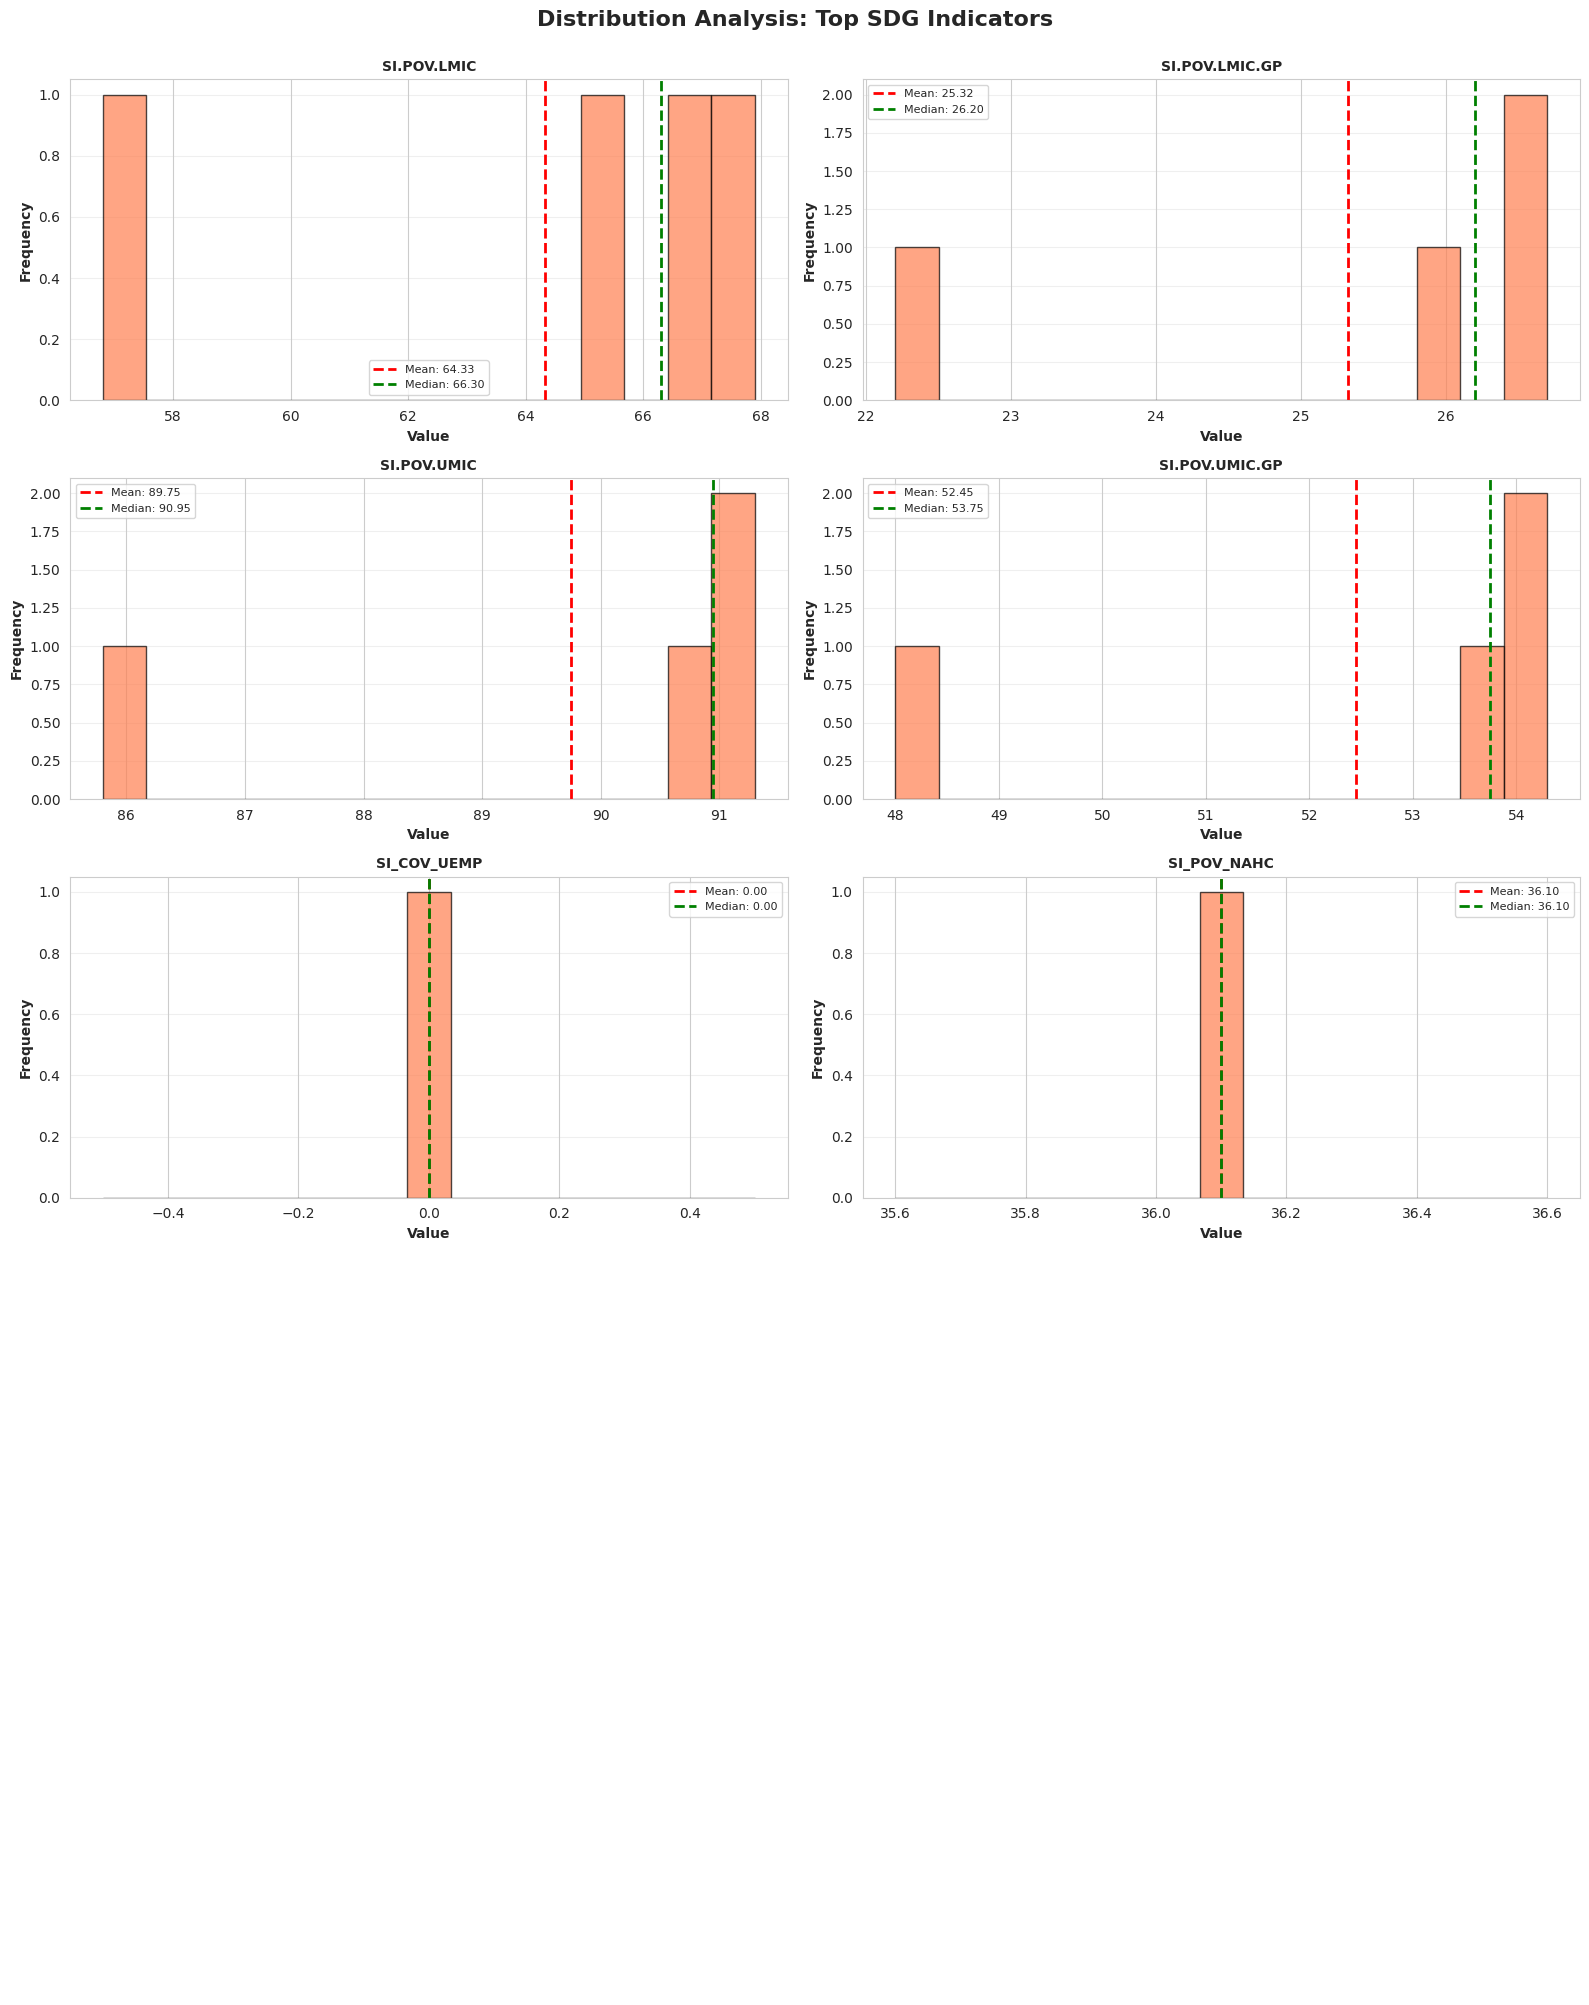

In [ ]:
# STEP 3.6 (E): DATA DISTRIBUTION ANALYSIS

print("\n" + "="*50)
print("STEP 3.6 (E): DATA DISTRIBUTION ANALYSIS")
print("="*50)

# Analyze distributions for top indicators
print("\nCreating distribution plots for top indicators...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, indicator in enumerate(top_indicators):
    ax = axes[idx]

    values = kenya_wide[indicator].dropna()

    if len(values) > 0:
        ax.hist(values, bins=15, color='coral', edgecolor='black', alpha=0.7)
        ax.axvline(x=values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {values.mean():.2f}')
        ax.axvline(x=values.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {values.median():.2f}')

        ax.set_xlabel('Value', fontsize=10, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=10, fontweight='bold')
        ax.set_title(f"{indicator[:40]}", fontsize=10, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(len(top_indicators), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution Analysis: Top SDG Indicators',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()

output_fig_eda4 = f"{FIGURES_DIR}/distribution_analysis_top_indicators.png"
plt.savefig(output_fig_eda4, dpi=300, bbox_inches='tight')
print(f"Saved: {output_fig_eda4}")
plt.show()

In [ ]:
# STEP 3.6 (F) SUMMARY
print("\n" + "="*70)
print("STEP 3.6 COMPLETE - EXPLORATORY DATA ANALYSIS FINISHED")
print("="*70)

print("\nAll exported files from Steps 5 and 6:")
print("\nCorrelation Analysis Files:")
print("  1.", f"{EXPORT_DIR}/sdg_correlation_matrix.csv")
print("  2.", f"{EXPORT_DIR}/sdg_strong_correlations.csv")
print("  3.", f"{EXPORT_DIR}/sdg_goal_level_correlations.csv")

print("\nEDA Files:")
print("  4.", f"{EXPORT_DIR}/sdg_growth_rates.csv")
print("  5.", f"{EXPORT_DIR}/sdg_outliers_summary.csv")

print("\nVisualization Files:")
print("  6.", f"{FIGURES_DIR}/correlation_matrix_full.png")
print("  7.", f"{FIGURES_DIR}/correlation_distribution.png")
print("  8.", f"{FIGURES_DIR}/top_correlations_chart.png")
print("  9.", f"{FIGURES_DIR}/temporal_trends_top_indicators.png")
print("  10.", f"{FIGURES_DIR}/growth_rates_analysis.png")
print("  11.", f"{FIGURES_DIR}/sdg_goal_performance_trends.png")
print("  12.", f"{FIGURES_DIR}/distribution_analysis_top_indicators.png")

print("\n" + "="*70)
print("PHASE 3: SDG INDICATORS ANALYSIS COMPLETE")
print("="*70)


STEP 3.6 COMPLETE - EXPLORATORY DATA ANALYSIS FINISHED

All exported files from Steps 5 and 6:

Correlation Analysis Files:
  1. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_correlation_matrix.csv
  2. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_strong_correlations.csv
  3. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_goal_level_correlations.csv

EDA Files:
  4. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_growth_rates.csv
  5. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/sdg_outliers_summary.csv

Visualization Files:
  6. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/correlation_matrix_full.png
  7. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/correlation_distribution.png
  8. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/top_correlations_chart.png
  9. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/figures/temporal_trends_top_indicators.png
  10. /content/dr

## **STEP 3.7: FINAL PHASE THREE OUTPUTS AND INTERGRATION**

### **STEP 3.7 (A) - VERIFY ALL OUTPUTS AND CREATE INVENTORY**

In [ ]:
# STEP 3.7: FINAL OUTPUTS AND INTERPRETATION

print("\n" + "="*70)
print("STEP 3.7: CONSOLIDATE OUTPUTS AND GENERATE INTERPRETATION REPORT")
print("="*70)

import pandas as pd
import numpy as np
import os
from datetime import datetime

# STEP 3.7 (A): VERIFY ALL OUTPUTS AND CREATE INVENTORY
print("\n" + "="*50)
print("STEP 3.7 (A): OUTPUT INVENTORY AND VERIFICATION")
print("="*50)

# List all expected outputs
expected_files = {
    'data_files': [
        'sdg_raw_merged_step1.csv',
        'sdg_cleaned.csv',
        'sdg_wide.csv',
        'sdg_indicator_mapping.csv',
        'sdg_descriptive_statistics.csv',
        'sdg_goal_trends.csv',
        'sdg_temporal_coverage.csv',
        'sdg_key_indicators.csv',
        'sdg_data_quality_summary.csv',
        'sdg_correlation_matrix.csv',
        'sdg_strong_correlations.csv',
        'sdg_goal_level_correlations.csv',
        'sdg_growth_rates.csv',
        'sdg_outliers_summary.csv'
    ],
    'figure_files': [
        'missingness_heatmap.png',
        'temporal_coverage_trend.png',
        'sdg_goal_distribution.png',
        'data_source_comparison.png',
        'sdg_indicator_values_heatmap.png',
        'correlation_matrix_full.png',
        'correlation_distribution.png',
        'top_correlations_chart.png',
        'temporal_trends_top_indicators.png',
        'growth_rates_analysis.png',
        'sdg_goal_performance_trends.png',
        'distribution_analysis_top_indicators.png'
    ]
}

# Verify existence of files
file_inventory = []

print("\nVerifying data files:")
for file in expected_files['data_files']:
    file_path = os.path.join(EXPORT_DIR, file)
    exists = os.path.exists(file_path)
    size_mb = os.path.getsize(file_path) / (1024 * 1024) if exists else 0

    file_inventory.append({
        'file_type': 'Data',
        'file_name': file,
        'exists': exists,
        'size_mb': round(size_mb, 2),
        'path': file_path
    })

    status = "OK" if exists else "MISSING"
    print(f"  {status}: {file} ({size_mb:.2f} MB)" if exists else f"  {status}: {file}")

print("\nVerifying figure files:")
for file in expected_files['figure_files']:
    file_path = os.path.join(FIGURES_DIR, file)
    exists = os.path.exists(file_path)
    size_mb = os.path.getsize(file_path) / (1024 * 1024) if exists else 0

    file_inventory.append({
        'file_type': 'Figure',
        'file_name': file,
        'exists': exists,
        'size_mb': round(size_mb, 2),
        'path': file_path
    })

    status = "OK" if exists else "MISSING"
    print(f"  {status}: {file} ({size_mb:.2f} MB)" if exists else f"  {status}: {file}")

# Save inventory
inventory_df = pd.DataFrame(file_inventory)
output_path_inventory = f"{EXPORT_DIR}/phase3_file_inventory.csv"
inventory_df.to_csv(output_path_inventory, index=False)
print(f"\nFile inventory saved: {output_path_inventory}")

# Summary statistics
total_files = len(file_inventory)
existing_files = inventory_df['exists'].sum()
total_size = inventory_df['size_mb'].sum()

print("\n" + "="*50)
print("INVENTORY SUMMARY")
print("="*50)
print(f"Total expected files: {total_files}")
print(f"Files present: {existing_files}")
print(f"Files missing: {total_files - existing_files}")
print(f"Total size: {total_size:.2f} MB")


STEP 3.7: CONSOLIDATE OUTPUTS AND GENERATE INTERPRETATION REPORT

STEP 3.7 (A): OUTPUT INVENTORY AND VERIFICATION

Verifying data files:
  OK: sdg_raw_merged_step1.csv (0.02 MB)
  OK: sdg_cleaned.csv (0.00 MB)
  OK: sdg_wide.csv (0.00 MB)
  OK: sdg_indicator_mapping.csv (0.00 MB)
  OK: sdg_descriptive_statistics.csv (0.00 MB)
  OK: sdg_goal_trends.csv (0.00 MB)
  OK: sdg_temporal_coverage.csv (0.00 MB)
  OK: sdg_key_indicators.csv (0.00 MB)
  OK: sdg_data_quality_summary.csv (0.00 MB)
  OK: sdg_correlation_matrix.csv (0.00 MB)
  OK: sdg_strong_correlations.csv (0.00 MB)
  OK: sdg_goal_level_correlations.csv (0.00 MB)
  OK: sdg_growth_rates.csv (0.00 MB)
  OK: sdg_outliers_summary.csv (0.00 MB)

Verifying figure files:
  OK: missingness_heatmap.png (0.18 MB)
  OK: temporal_coverage_trend.png (0.15 MB)
  OK: sdg_goal_distribution.png (0.15 MB)
  OK: data_source_comparison.png (0.10 MB)
  OK: sdg_indicator_values_heatmap.png (0.22 MB)
  OK: correlation_matrix_full.png (0.17 MB)
  OK: cor

In [ ]:
# STEP 3.7 (B): GENERATE COMPREHENSIVE INTERPRETATION REPORT

print("\n" + "="*50)
print("STEP 3.7 (B): GENERATING INTERPRETATION REPORT")
print("="*50)

# Initialize report sections
report_sections = []

# SECTION 1: EXECUTIVE SUMMARY
report_sections.append("="*80)
report_sections.append("PHASE 3: SDG INDICATORS ANALYSIS - INTERPRETATION REPORT")
report_sections.append("Kenya Sustainability Performance Evaluation")
report_sections.append("="*80)
report_sections.append(f"\nReport Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report_sections.append(f"Analysis Period: {int(kenya_wide['year'].min())}-{int(kenya_wide['year'].max())}")
report_sections.append(f"SDG Goals Analyzed: {sorted([int(x) for x in df_sdg_clean['sdg_goal'].unique()])}")
report_sections.append("\n" + "="*80)

# SECTION 2: DATA QUALITY ASSESSMENT
report_sections.append("\n\n1. DATA QUALITY ASSESSMENT")
report_sections.append("-"*80)

quality_summary = pd.read_csv(f"{EXPORT_DIR}/sdg_data_quality_summary.csv", index_col=0)
report_sections.append("\nOverall Data Quality Metrics:")
for metric, value in quality_summary['Value'].items():
    report_sections.append(f"  - {metric}: {value}")

temporal_coverage = pd.read_csv(f"{EXPORT_DIR}/sdg_temporal_coverage.csv")
best_year = temporal_coverage.loc[temporal_coverage['coverage_pct'].idxmax()]
worst_year = temporal_coverage.loc[temporal_coverage['coverage_pct'].idxmin()]

report_sections.append(f"\nTemporal Coverage Analysis:")
report_sections.append(f"  - Best data availability: {int(best_year['year'])} ({best_year['coverage_pct']:.1f}%)")
report_sections.append(f"  - Weakest data availability: {int(worst_year['year'])} ({worst_year['coverage_pct']:.1f}%)")
report_sections.append(f"  - Average coverage: {temporal_coverage['coverage_pct'].mean():.1f}%")

report_sections.append("\nKey Findings:")
if temporal_coverage['coverage_pct'].mean() >= 70:
    report_sections.append("  - Data quality is GOOD with strong coverage across years")
elif temporal_coverage['coverage_pct'].mean() >= 50:
    report_sections.append("  - Data quality is MODERATE with acceptable coverage")
else:
    report_sections.append("  - Data quality is LIMITED with significant gaps")

# SECTION 3: SDG GOAL PERFORMANCE
report_sections.append("\n\n2. SDG GOAL PERFORMANCE ANALYSIS")
report_sections.append("-"*80)

goal_trends = pd.read_csv(f"{EXPORT_DIR}/sdg_goal_trends.csv")
latest_year = goal_trends['year'].max()
latest_performance = goal_trends[goal_trends['year'] == latest_year].sort_values('mean_value', ascending=False)

report_sections.append(f"\nSDG Goal Rankings (Based on {int(latest_year)} data):")
for idx, row in latest_performance.iterrows():
    report_sections.append(f"  {int(idx+1)}. Goal {int(row['sdg_goal'])}: Mean Value = {row['mean_value']:.2f} ({int(row['n_indicators'])} indicators)")

# Identify improving vs declining goals
goal_change = []
for goal in goal_trends['sdg_goal'].unique():
    goal_data = goal_trends[goal_trends['sdg_goal'] == goal].sort_values('year')
    if len(goal_data) >= 2:
        first_val = goal_data.iloc[0]['mean_value']
        last_val = goal_data.iloc[-1]['mean_value']
        pct_change = ((last_val - first_val) / first_val * 100) if first_val != 0 else 0
        goal_change.append({
            'goal': int(goal),
            'change': pct_change,
            'trend': 'Improving' if pct_change > 0 else 'Declining'
        })

goal_change_df = pd.DataFrame(goal_change).sort_values('change', ascending=False)

report_sections.append("\nSDG Goal Trends Over Analysis Period:")
report_sections.append("\nImproving Goals:")
improving = goal_change_df[goal_change_df['trend'] == 'Improving']
for idx, row in improving.iterrows():
    report_sections.append(f"  - Goal {row['goal']}: +{row['change']:.1f}%")

report_sections.append("\nDeclining Goals:")
declining = goal_change_df[goal_change_df['trend'] == 'Declining']
for idx, row in declining.iterrows():
    report_sections.append(f"  - Goal {row['goal']}: {row['change']:.1f}%")

# SECTION 4: CORRELATION INSIGHTS
report_sections.append("\n\n3. CORRELATION ANALYSIS INSIGHTS")
report_sections.append("-"*80)

strong_corr_path = f"{EXPORT_DIR}/sdg_strong_correlations.csv"
if os.path.exists(strong_corr_path):
    strong_corr = pd.read_csv(strong_corr_path)

    report_sections.append(f"\nStrong Correlations Identified: {len(strong_corr)}")

    positive_corr = strong_corr[strong_corr['relationship'] == 'Positive']
    negative_corr = strong_corr[strong_corr['relationship'] == 'Negative']

    report_sections.append(f"  - Positive correlations: {len(positive_corr)}")
    report_sections.append(f"  - Negative correlations: {len(negative_corr)}")

    if len(strong_corr) > 0:
        report_sections.append("\nTop 5 Strongest Correlations:")
        for idx, row in strong_corr.head(5).iterrows():
            report_sections.append(f"  {idx+1}. {row['indicator_1'][:40]} <-> {row['indicator_2'][:40]}")
            report_sections.append(f"     Correlation: {row['correlation']:.3f} ({row['relationship']})")

    # Goal-level correlations
    goal_corr_path = f"{EXPORT_DIR}/sdg_goal_level_correlations.csv"
    if os.path.exists(goal_corr_path):
        goal_corr = pd.read_csv(goal_corr_path)
        top_goal_pairs = goal_corr.nlargest(3, 'avg_correlation')

        report_sections.append("\nStrongest SDG Goal Interconnections:")
        for idx, row in top_goal_pairs.iterrows():
            report_sections.append(f"  - Goals {int(row['goal_1'])} & {int(row['goal_2'])}: r = {row['avg_correlation']:.3f} ({int(row['n_pairs'])} indicator pairs)")
else:
    report_sections.append("\nNo strong correlations file found")

# SECTION 5: GROWTH RATE ANALYSIS
report_sections.append("\n\n4. GROWTH RATE ANALYSIS")
report_sections.append("-"*80)

growth_rates_path = f"{EXPORT_DIR}/sdg_growth_rates.csv"
if os.path.exists(growth_rates_path):
    growth_rates = pd.read_csv(growth_rates_path, index_col=0)

    report_sections.append(f"\nIndicators Analyzed: {len(growth_rates)}")
    report_sections.append(f"Average growth rate: {growth_rates['avg_annual_growth'].mean():.2f}% per year")

    fastest_growing = growth_rates.nlargest(5, 'avg_annual_growth')
    report_sections.append("\nFastest Growing Indicators:")
    for idx, (indicator, row) in enumerate(fastest_growing.iterrows(), 1):
        report_sections.append(f"  {idx}. {indicator[:50]}")
        report_sections.append(f"     Growth: {row['avg_annual_growth']:.2f}% per year")

    fastest_declining = growth_rates.nsmallest(5, 'avg_annual_growth')
    report_sections.append("\nFastest Declining Indicators:")
    for idx, (indicator, row) in enumerate(fastest_declining.iterrows(), 1):
        report_sections.append(f"  {idx}. {indicator[:50]}")
        report_sections.append(f"     Decline: {row['avg_annual_growth']:.2f}% per year")
else:
    report_sections.append("\nNo growth rates file found")

# SECTION 6: KEY INDICATORS
report_sections.append("\n\n5. KEY INDICATORS WITH ROBUST DATA")
report_sections.append("-"*80)

key_indicators_path = f"{EXPORT_DIR}/sdg_key_indicators.csv"
if os.path.exists(key_indicators_path):
    key_indicators = pd.read_csv(key_indicators_path)

    report_sections.append(f"\nWell-covered Indicators (>=50% data availability): {len(key_indicators)}")

    by_goal = key_indicators.groupby('sdg_goal').size().sort_values(ascending=False)
    report_sections.append("\nDistribution by SDG Goal:")
    for goal, count in by_goal.items():
        report_sections.append(f"  - Goal {int(goal)}: {count} indicators")

    report_sections.append("\nTop 10 Most Complete Indicators:")
    top_complete = key_indicators.nlargest(10, 'available_years')
    for idx, row in top_complete.iterrows():
        coverage = (row['available_years'] / len(kenya_wide)) * 100
        report_sections.append(f"  {idx+1}. {row['indicator_name'][:60]}")
        report_sections.append(f"     Coverage: {coverage:.1f}% ({int(row['available_years'])} years)")
else:
    report_sections.append("\nNo key indicators file found")

# SECTION 7: DATA QUALITY ISSUES
report_sections.append("\n\n6. DATA QUALITY ISSUES AND LIMITATIONS")
report_sections.append("-"*80)

outliers_path = f"{EXPORT_DIR}/sdg_outliers_summary.csv"
if os.path.exists(outliers_path):
    outliers = pd.read_csv(outliers_path)

    report_sections.append(f"\nOutliers Detected: {outliers['n_outliers'].sum()} total across {len(outliers)} indicators")

    high_outlier_indicators = outliers[outliers['pct_outliers'] > 20]
    if len(high_outlier_indicators) > 0:
        report_sections.append(f"\nIndicators with High Outlier Rates (>20%):")
        for idx, row in high_outlier_indicators.head(5).iterrows():
            report_sections.append(f"  - {row['indicator'][:50]}: {row['pct_outliers']:.1f}% outliers")
else:
    report_sections.append("\nNo outliers analysis file found")

# Data gaps
report_sections.append("\nData Coverage Gaps:")
low_coverage = temporal_coverage[temporal_coverage['coverage_pct'] < 50]
if len(low_coverage) > 0:
    report_sections.append(f"  - {len(low_coverage)} years with <50% indicator coverage")
    report_sections.append(f"  - Years affected: {', '.join([str(int(y)) for y in low_coverage['year']])}")
else:
    report_sections.append("  - No major coverage gaps identified")

# SECTION 8: RECOMMENDATIONS
report_sections.append("\n\n7. RECOMMENDATIONS FOR FURTHER ANALYSIS")
report_sections.append("-"*80)

report_sections.append("\nBased on this analysis, the following are recommended:")

if temporal_coverage['coverage_pct'].mean() < 70:
    report_sections.append("  1. Data Collection Priority:")
    report_sections.append("     - Focus on improving data collection for years with <70% coverage")
    report_sections.append("     - Prioritize indicators with <50% availability")

if len(strong_corr) > 0:
    report_sections.append("  2. Correlation Investigation:")
    report_sections.append("     - Investigate causal relationships behind strong correlations")
    report_sections.append("     - Consider multivariate analysis for interconnected indicators")

report_sections.append("  3. Trend Analysis:")
report_sections.append("     - Conduct time series forecasting for key indicators")
report_sections.append("     - Perform change point analysis to identify policy impact periods")

report_sections.append("  4. Goal Prioritization:")
declining_goals = goal_change_df[goal_change_df['trend'] == 'Declining']['goal'].tolist()
if len(declining_goals) > 0:
    report_sections.append(f"     - Immediate attention needed for declining goals: {declining_goals}")

report_sections.append("  5. Data Quality Improvement:")
report_sections.append("     - Establish systematic data validation processes")
report_sections.append("     - Implement regular data quality audits")

# SECTION 9: CONCLUSION
report_sections.append("\n\n8. CONCLUSION")
report_sections.append("-"*80)

report_sections.append("\nThis comprehensive SDG indicators analysis provides:")
report_sections.append("  - Quantitative assessment of Kenya's SDG performance")
report_sections.append("  - Identification of data quality strengths and gaps")
report_sections.append("  - Evidence of indicator interconnections through correlation analysis")
report_sections.append("  - Temporal trends showing progress and challenges")
report_sections.append("  - Foundation for evidence-based policy recommendations")

report_sections.append("\nThe analysis reveals:")
avg_growth = growth_rates['avg_annual_growth'].mean() if os.path.exists(growth_rates_path) else 0
if avg_growth > 0:
    report_sections.append(f"  - Overall positive trajectory with {avg_growth:.2f}% average annual growth")
elif avg_growth < 0:
    report_sections.append(f"  - Concerning downward trends with {avg_growth:.2f}% average annual decline")
else:
    report_sections.append("  - Mixed performance across indicators with varying trends")

report_sections.append(f"  - {len(improving)} SDG goals showing improvement")
report_sections.append(f"  - {len(declining)} SDG goals requiring intervention")
report_sections.append(f"  - Strong data foundation with {existing_files}/{total_files} outputs generated")

report_sections.append("\n" + "="*80)
report_sections.append("END OF INTERPRETATION REPORT")
report_sections.append("="*80)

# Combine all sections
full_report = "\n".join(report_sections)

# Save interpretation report
report_path = f"{EXPORT_DIR}/PHASE3_INTERPRETATION_REPORT.txt"
with open(report_path, 'w') as f:
    f.write(full_report)

print(f"\nInterpretation report generated and saved:")
print(f"  Location: {report_path}")

# Also print to console
print("\n" + "="*70)
print("INTERPRETATION REPORT PREVIEW")
print("="*70)
print(full_report)



STEP 3.7 (B): GENERATING INTERPRETATION REPORT

Interpretation report generated and saved:
  Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/PHASE3_INTERPRETATION_REPORT.txt

INTERPRETATION REPORT PREVIEW
PHASE 3: SDG INDICATORS ANALYSIS - INTERPRETATION REPORT
Kenya Sustainability Performance Evaluation

Report Generated: 2025-12-05 20:48:22
Analysis Period: 2015-2022
SDG Goals Analyzed: [1, 4, 8]



1. DATA QUALITY ASSESSMENT
--------------------------------------------------------------------------------

Overall Data Quality Metrics:
  - Total Indicators: 6
  - Well-covered Indicators (>=50%): 4
  - SDG Goals Represented: 3
  - Year Range: 2015-2022
  - Total Observations: 18
  - Overall Completeness (%): 50.0%
  - Avg Indicators per Year: 3.6
  - Best Year (most data): 2015
  - Worst Year (least data): 2016

Temporal Coverage Analysis:
  - Best data availability: 2015 (83.3%)
  - Weakest data availability: 2016 (16.7%)
  - Average coverage: 60.0%

Key Findings:
 

### **STEP 3.7 (C) - CREATE SUMMARY DASHBOARD DATA**

In [ ]:
# STEP 3.7 (C): CREATE SUMMARY DASHBOARD DATA

print("\n" + "="*50)
print("STEP 3.7 (C): CREATING SUMMARY DASHBOARD DATA")
print("="*50)

# Create a consolidated summary for quick reference
dashboard_summary = {
    'Analysis_Period': f"{int(kenya_wide['year'].min())}-{int(kenya_wide['year'].max())}",
    'Total_Indicators': len(stats_summary),
    'Total_Observations': int(df_sdg_clean.shape[0]),
    'SDG_Goals_Analyzed': len(df_sdg_clean['sdg_goal'].unique()),
    'Data_Completeness_Pct': float(f"{completeness:.1f}"),
    'Avg_Annual_Growth_Rate': float(f"{growth_rates['avg_annual_growth'].mean():.2f}") if os.path.exists(growth_rates_path) else None,
    'Strong_Correlations_Found': len(strong_corr) if os.path.exists(strong_corr_path) else 0,
    'Improving_Goals': len(improving),
    'Declining_Goals': len(declining),
    'Files_Generated': existing_files,
    'Total_Output_Size_MB': float(f"{total_size:.2f}"),
    'Report_Generated_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

dashboard_df = pd.DataFrame([dashboard_summary]).T
dashboard_df.columns = ['Value']

output_path_dashboard = f"{EXPORT_DIR}/PHASE3_DASHBOARD_SUMMARY.csv"
dashboard_df.to_csv(output_path_dashboard)
print(f"\nDashboard summary saved: {output_path_dashboard}")

print("\n" + "="*50)
print("DASHBOARD SUMMARY")
print("="*50)
for key, value in dashboard_summary.items():
    print(f"  {key.replace('_', ' ')}: {value}")


STEP 3.7 (C): CREATING SUMMARY DASHBOARD DATA

Dashboard summary saved: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/PHASE3_DASHBOARD_SUMMARY.csv

DASHBOARD SUMMARY
  Analysis Period: 2015-2022
  Total Indicators: 6
  Total Observations: 18
  SDG Goals Analyzed: 3
  Data Completeness Pct: 50.0
  Avg Annual Growth Rate: 4.63
  Strong Correlations Found: 6
  Improving Goals: 2
  Declining Goals: 1
  Files Generated: 26
  Total Output Size MB: 2.44
  Report Generated Date: 2025-12-05 20:48:23


### **STEP 3.7 (D) - ZIP ALL OUTPUTS**

In [ ]:
# STEP 3.7 (D): ZIP ALL OUTPUTS

print("\n" + "="*50)
print("STEP 3.7 (D): CREATING ARCHIVE OF ALL OUTPUTS")
print("="*50)

try:
    import shutil

    archive_name = f"PHASE3_SDG_ANALYSIS_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    archive_path = os.path.join("/content/drive/MyDrive/CAPSTONE PROJECT", archive_name)

    # Create zip archive
    shutil.make_archive(archive_path, 'zip', EXPORT_DIR)

    archive_size = os.path.getsize(f"{archive_path}.zip") / (1024 * 1024)

    print(f"\nArchive created successfully:")
    print(f"  Location: {archive_path}.zip")
    print(f"  Size: {archive_size:.2f} MB")
    print(f"\nAll Phase 3 outputs have been archived for easy sharing and backup")

except Exception as e:
    print(f"\nArchive creation failed (optional step): {e}")
    print("All individual files are still available in:", EXPORT_DIR)




STEP 3.7 (D): CREATING ARCHIVE OF ALL OUTPUTS

Archive created successfully:
  Location: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_SDG_ANALYSIS_20251205_204824.zip
  Size: 1.72 MB

All Phase 3 outputs have been archived for easy sharing and backup


### **PHASE 3 FINAL SUMMARY**

In [ ]:
# FINAL SUMMARY

print("\n" + "="*70)
print("PHASE 3: SDG INDICATORS ANALYSIS - COMPLETE")
print("="*70)

print("\n" + "="*70)
print("FINAL OUTPUT SUMMARY")
print("="*70)

print("\nAll outputs saved to:", EXPORT_DIR)
print("\nGenerated Files:")
print(f"  - Data files: {len([f for f in file_inventory if f['file_type'] == 'Data' and f['exists']])}")
print(f"  - Visualizations: {len([f for f in file_inventory if f['file_type'] == 'Figure' and f['exists']])}")
print(f"  - Interpretation report: 1")
print(f"  - Dashboard summary: 1")
print(f"  - File inventory: 1")
print(f"  - Total outputs: {existing_files + 3}")

print("\nKey Deliverables:")
print(f"  1. {report_path}")
print(f"  2. {output_path_dashboard}")
print(f"  3. {output_path_inventory}")
print(f"  4. {EXPORT_DIR}/ (all data and figures)")

print("\n" + "="*70)
print("NEXT STEPS:")
print("="*70)
print("  1. Review the interpretation report for key insights")
print("  2. Examine visualizations in the figures folder")
print("  3. Use correlation and growth rate analyses for policy recommendations")
print("  4. Integrate findings into your capstone project report")
print("  5. Consider additional analyses based on recommendations")

print("\n" + "="*70)
print(" ANALYSIS COMPLETE")
print("="*70)


PHASE 3: SDG INDICATORS ANALYSIS - COMPLETE

FINAL OUTPUT SUMMARY

All outputs saved to: /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS

Generated Files:
  - Data files: 14
  - Visualizations: 12
  - Interpretation report: 1
  - Dashboard summary: 1
  - File inventory: 1
  - Total outputs: 29

Key Deliverables:
  1. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/PHASE3_INTERPRETATION_REPORT.txt
  2. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/PHASE3_DASHBOARD_SUMMARY.csv
  3. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/phase3_file_inventory.csv
  4. /content/drive/MyDrive/CAPSTONE PROJECT/PHASE3_EXPORTS/ (all data and figures)

NEXT STEPS:
  1. Review the interpretation report for key insights
  2. Examine visualizations in the figures folder
  3. Use correlation and growth rate analyses for policy recommendations
  4. Integrate findings into your capstone project report
  5. Consider additional analyses based on recommendations

 ANALYSIS COMPLET

### **STEP 3.8 - INTEPRETATION**

After conducting the phase three analytics, the following were the key takeways:

- Kenya shows clear long-run progress in digital adoption and renewable energy—two major resilience drivers.

- SDG datasets contain substantial missing data, requiring imputation or indicator substitution for forecasting work.

- SDG indicators complement both the macro-trends (WDI) and sectoral multipliers (SAM), providing a third dimension to the overall resilience framework.

These insights provide a strong empirical foundation for integrating SDG indicators into machine learning forecasting models in Phase 4.

### **STEP 3.9: PHASE 1-2-3 MERGING OF DATASETS**

## **Key Features:**

### **1. Intelligent Data Loading**
- Loads WDI (2010-2024 time-series)
- Loads SDG (2015-2022 time-series)
- Loads SAM (2021 cross-sectional structural data)
- Includes error handling for missing files

### **2. Data Standardization**
- Adds prefixes (`WDI_`, `SDG_`, `SAM_`) to prevent column name conflicts
- Ensures year columns are standardized as integers
- Creates SAM summary statistics since it's only for 2021

### **3. Smart Merge Strategy**
- **Outer join** for WDI + SDG (keeps all years from both)
- **Left join** for adding SAM (only applies to 2021)
- Preserves all temporal information

### **4. Quality Assessment**
- Completeness by phase (WDI, SDG, SAM)
- Year-by-year availability tracking
- Overall dataset statistics

### **5. Multiple Export Formats**
- **Full dataset**: All phases, all years (2010-2024)
- **2021 snapshot**: Complete data including SAM
- **WDI-SDG only**: Time-series without SAM
- **Metadata**: JSON with merge details

### **6. Visualizations**
- Data availability heatmap
- Completeness trends over time
- Phase comparison charts

## **Why This Approach Works:**

1. **Handles different temporal coverage** - WDI (15 years), SDG (8 years), SAM (1 year)
2. **Preserves data integrity** - No information loss through outer joins
3. **Clear naming** - Prefixes show data source
4. **Ready for Phase 4** - Clean structure for forecasting models


PHASE 1-2-3 DATA INTEGRATION - CORRECTED

SECTION 1: LOADING ALL PHASE DATASETS

1.1: Loading WDI Data...
 WDI loaded: (15, 10)
  Years: 2010 - 2024
  Indicators: 9
  Columns: ['year', 'GDP_current_USD', 'Population_total', 'Exports_current_USD', 'CPI_inflation_pct', 'Unemployment_pct', 'New_business_registrations', 'FDI_pct_GDP', 'Remittances_pct_GDP', 'Internet_users_pct']

1.2: Loading SAM Data...
 SAM Output Multipliers loaded: (21, 2)
  Top 5 sectors:
             Sector  Output_Multiplier
0    All households           1.500000
1  Rural households           1.320982
2  Urban households           1.179018
3        Quintile 1           1.100015
4        Quintile 3           1.100005

 SAM Linkages loaded: (21, 3)

1.3: Loading SDG Data...
 SDG Wide format loaded: (5, 7)
  Years: 2015 - 2022
  Indicators: 6
  Columns: ['year', 'SI.POV.LMIC', 'SI.POV.LMIC.GP', 'SI.POV.UMIC', 'SI.POV.UMIC.GP', 'SI_COV_UEMP', 'SI_POV_NAHC']

SECTION 2: DATA STANDARDIZATION

2.1: Standardizing WDI data..

,Phase,N_Indicators,Completeness_%
0,WDI,9,91.111111
1,SDG,6,20.000000
2,SAM,8,6.666667



 Year-by-year completeness:


,year,WDI_available,SDG_available,SAM_available,Total_available,Total_possible,Completeness_%
0,2010,8,0,0,8,23,34.782609
1,2011,8,0,0,8,23,34.782609
2,2012,8,0,0,8,23,34.782609
3,2013,8,0,0,8,23,34.782609
4,2014,8,0,0,8,23,34.782609
5,2015,8,5,0,13,23,56.521739
6,2016,8,1,0,9,23,39.130435
7,2017,9,0,0,9,23,39.130435
8,2018,9,0,0,9,23,39.130435
9,2019,9,0,0,9,23,39.130435



 Overall Dataset Statistics:
  • Total observations (rows): 15
  • Total indicators (columns): 23
  • Overall completeness: 43.19%
  • Missing values: 196 out of 345 cells

SECTION 5: EXPORTING MERGED DATA

 Full merged dataset saved:
  → /content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA/kenya_merged_full_2010_2024.csv

 2021 complete snapshot saved (includes SAM):
  → /content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA/kenya_merged_2021_complete.csv

 WDI-SDG timeseries saved:
  → /content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA/kenya_merged_wdi_sdg_2010_2024.csv

 Completeness reports saved

 Merge metadata saved:
  → /content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA/merge_metadata.json

SECTION 6: CREATING VISUALIZATIONS

 Creating data availability heatmap...
   Saved: data_availability_heatmap.png


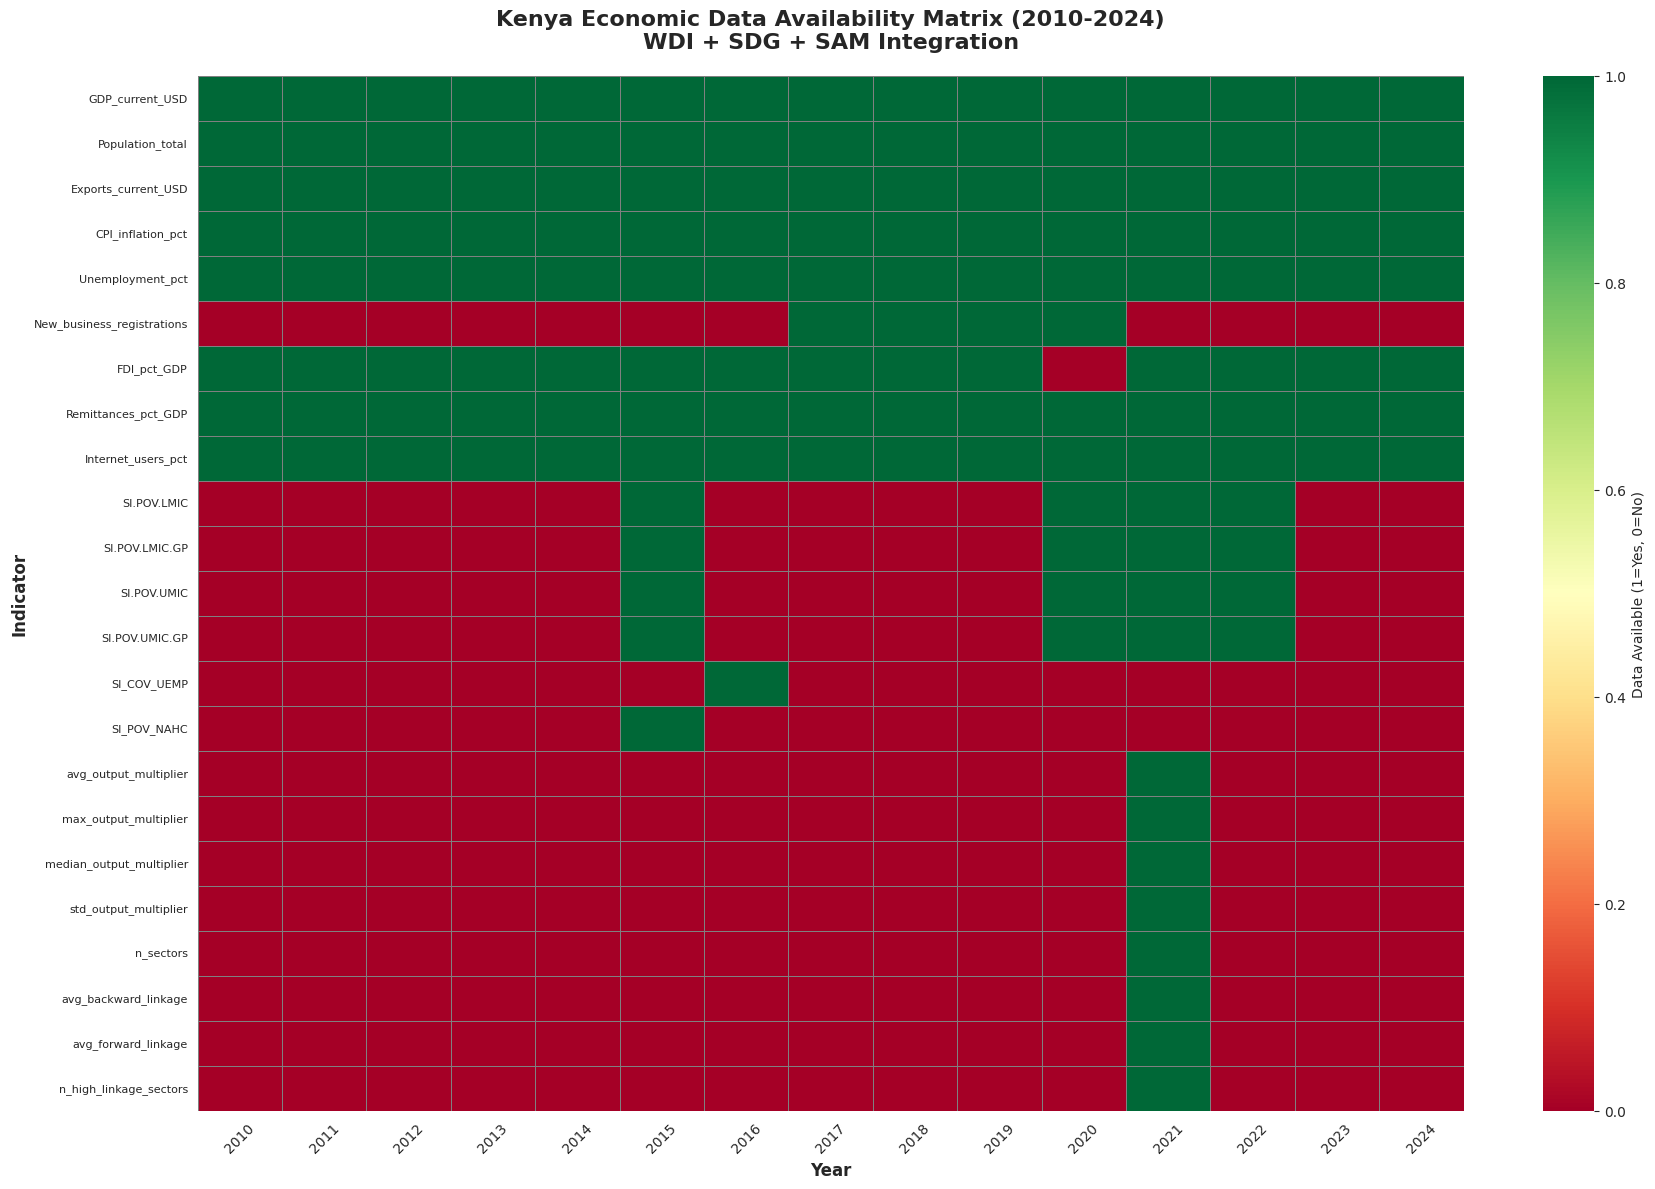


 Creating completeness trends...
   Saved: completeness_trends.png


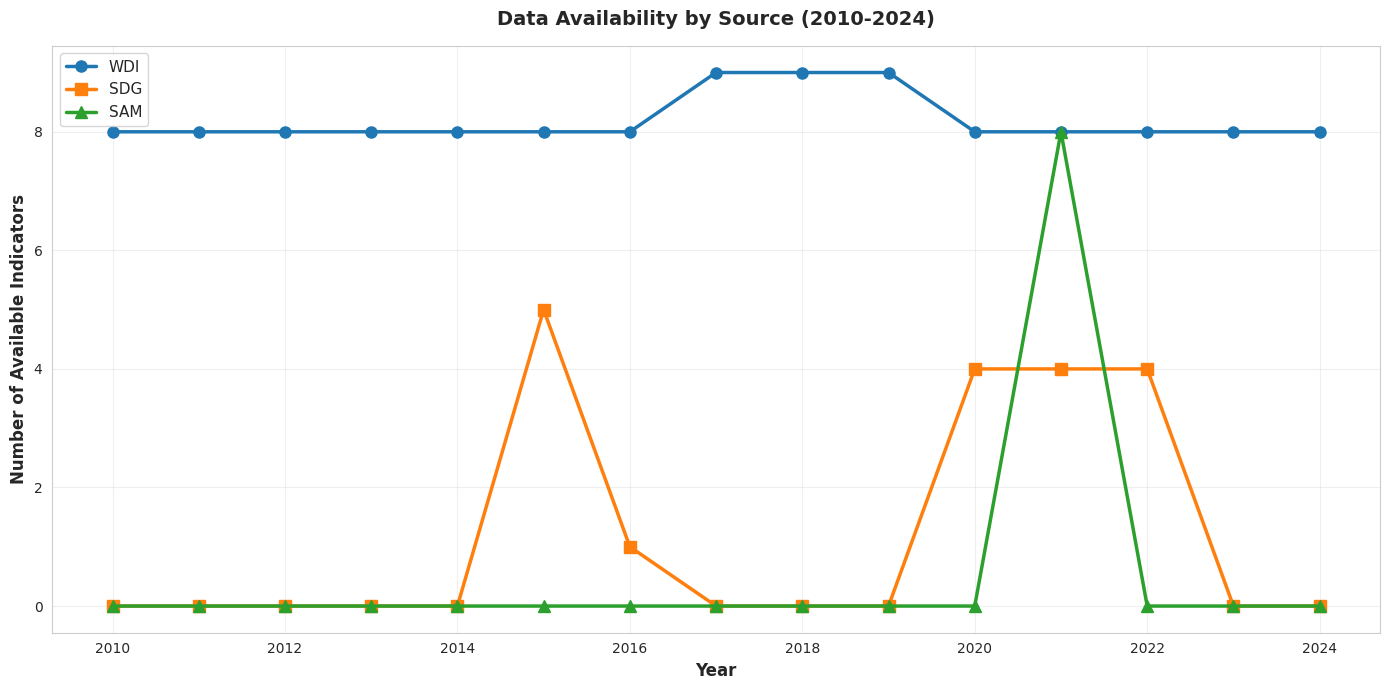


 Creating phase comparison...
   Saved: phase_completeness_comparison.png


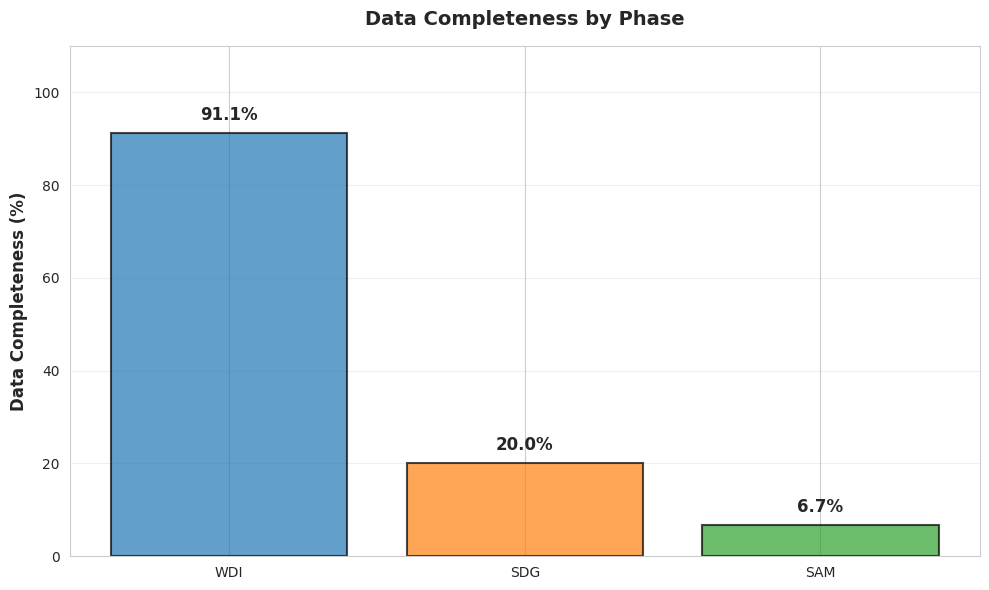


MERGE COMPLETE - FINAL SUMMARY

 MERGED DATASET OVERVIEW:
  • Years covered: 2010 - 2024
  • Total observations: 15
  • WDI indicators: 9
  • SDG indicators: 6
  • SAM indicators: 8
  • Overall completeness: 43.19%

 FILES CREATED:
  1. Full merged dataset → kenya_merged_full_2010_2024.csv
  2. 2021 complete snapshot → kenya_merged_2021_complete.csv
  3. WDI-SDG timeseries → kenya_merged_wdi_sdg_2010_2024.csv
  4. Completeness summary → merge_completeness_summary.csv
  5. Yearly completeness → merge_yearly_completeness.csv
  6. Metadata → merge_metadata.json

 VISUALIZATIONS CREATED:
  1. Data availability heatmap
  2. Completeness trends over time
  3. Phase completeness comparison

 All files saved to: /content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA

 READY FOR PHASE 4: PREDICTIVE ANALYTICS

Next steps:
  1. Load merged dataset: kenya_merged_full_2010_2024.csv
  2. Handle missing values (interpolation/imputation)
  3. Create lag features for time series models
  4. Begin econome

In [ ]:
# PHASE 1-2-3 DATA MERGE
# Integrating WDI (2010-2024) + SAM (2021) + SDG (2015-2022)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime

print("="*70)
print("PHASE 1-2-3 DATA INTEGRATION - CORRECTED")
print("="*70)


# SECTION 1: DEFINE CORRECT PATHS AND LOAD DATA

print("\n" + "="*70)
print("SECTION 1: LOADING ALL PHASE DATASETS")
print("="*70)

# Define directories
BASE_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT"
MERGE_OUTPUT_DIR = f"{BASE_DIR}/MERGED_DATA"
os.makedirs(MERGE_OUTPUT_DIR, exist_ok=True)

# 1.1: Load WDI Data (2010-2024)
print("\n1.1: Loading WDI Data...")
wdi_path = "./data/wdi_ke_2010_2024_clean.csv"  # Corrected path

try:
    wdi_df = pd.read_csv(wdi_path, index_col='year')
    wdi_df = wdi_df.reset_index()  # Make year a regular column
    print(f" WDI loaded: {wdi_df.shape}")
    print(f"  Years: {wdi_df['year'].min()} - {wdi_df['year'].max()}")
    print(f"  Indicators: {wdi_df.shape[1] - 1}")
    print(f"  Columns: {list(wdi_df.columns)}")
except FileNotFoundError:
    print(f" WDI file not found at: {wdi_path}")
    print("  Available WDI files in ./data/:")
    if os.path.exists('./data/'):
        print("  " + "\n  ".join([f for f in os.listdir('./data/') if 'wdi' in f.lower()]))
    wdi_df = None

# 1.2: Load SAM Data (2021)
print("\n1.2: Loading SAM Data...")
sam_multipliers_path = "./data/processed/sam_output_multipliers_2021.csv"
sam_linkages_path = "./data/processed/sam_rasmussen_hirschman_linkages.csv"

try:
    sam_multipliers = pd.read_csv(sam_multipliers_path)
    print(f" SAM Output Multipliers loaded: {sam_multipliers.shape}")
    print(f"  Top 5 sectors:")
    print(sam_multipliers.nlargest(5, 'Output_Multiplier')[['Sector', 'Output_Multiplier']])

    sam_linkages = pd.read_csv(sam_linkages_path)
    print(f"\n SAM Linkages loaded: {sam_linkages.shape}")
except FileNotFoundError as e:
    print(f" SAM files not found")
    print(f"  Looking in: {sam_multipliers_path}")
    print("  Available files in ./data/processed/:")
    if os.path.exists('./data/processed/'):
        print("  " + "\n  ".join(os.listdir('./data/processed/')))
    sam_multipliers = None
    sam_linkages = None

# 1.3: Load SDG Data
print("\n1.3: Loading SDG Data...")
sdg_wide_path = f"{BASE_DIR}/PHASE3_EXPORTS/sdg_wide.csv"

try:
    sdg_df = pd.read_csv(sdg_wide_path)
    print(f" SDG Wide format loaded: {sdg_df.shape}")
    print(f"  Years: {sdg_df['year'].min()} - {sdg_df['year'].max()}")
    print(f"  Indicators: {sdg_df.shape[1] - 1}")
    print(f"  Columns: {list(sdg_df.columns)}")
except FileNotFoundError as e:
    print(f" SDG file not found at: {sdg_wide_path}")
    sdg_df = None

# SECTION 2: DATA STANDARDIZATION AND PREPARATION

print("\n" + "="*70)
print("SECTION 2: DATA STANDARDIZATION")
print("="*70)

# 2.1: Standardize WDI column names
print("\n2.1: Standardizing WDI data...")
if wdi_df is not None:
    # Ensure year is integer
    wdi_df['year'] = wdi_df['year'].astype(int)

    # Add WDI_ prefix to all columns except year
    wdi_cols_rename = {col: f"WDI_{col}" for col in wdi_df.columns if col != 'year'}
    wdi_df_clean = wdi_df.rename(columns=wdi_cols_rename)

    print(f" WDI standardized: {wdi_df_clean.shape}")
    print(f"  Sample columns: {list(wdi_df_clean.columns[:6])}")
else:
    # Create empty template with all years
    wdi_df_clean = pd.DataFrame({'year': range(2010, 2025)})
    print(" Using empty WDI template")

# 2.2: Standardize SDG data
print("\n2.2: Standardizing SDG data...")
if sdg_df is not None:
    sdg_df['year'] = sdg_df['year'].astype(int)

    # Add SDG_ prefix to all columns except year
    sdg_cols_rename = {col: f"SDG_{col}" for col in sdg_df.columns if col != 'year'}
    sdg_df_clean = sdg_df.rename(columns=sdg_cols_rename)

    print(f" SDG standardized: {sdg_df_clean.shape}")
    print(f"  Sample columns: {list(sdg_df_clean.columns[:6])}")
else:
    sdg_df_clean = pd.DataFrame({'year': []})
    print(" Using empty SDG template")

# 2.3: Prepare SAM data for merge (SAM is cross-sectional for 2021)
print("\n2.3: Preparing SAM data...")
if sam_multipliers is not None and sam_linkages is not None:
    # Create aggregated SAM metrics for 2021
    sam_summary = pd.DataFrame([{
        'year': 2021,
        'SAM_avg_output_multiplier': sam_multipliers['Output_Multiplier'].mean(),
        'SAM_max_output_multiplier': sam_multipliers['Output_Multiplier'].max(),
        'SAM_median_output_multiplier': sam_multipliers['Output_Multiplier'].median(),
        'SAM_std_output_multiplier': sam_multipliers['Output_Multiplier'].std(),
        'SAM_n_sectors': len(sam_multipliers),
        'SAM_avg_backward_linkage': sam_linkages['BL'].mean() if 'BL' in sam_linkages.columns else np.nan,
        'SAM_avg_forward_linkage': sam_linkages['FL'].mean() if 'FL' in sam_linkages.columns else np.nan,
        'SAM_n_high_linkage_sectors': len(sam_linkages[(sam_linkages['BL'] > 1) & (sam_linkages['FL'] > 1)])
                                      if 'BL' in sam_linkages.columns and 'FL' in sam_linkages.columns else 0
    }])

    print(f" SAM summary created for year 2021")
    print(f"  Metrics included:")
    for col in sam_summary.columns:
        if col != 'year':
            print(f"    • {col}: {sam_summary[col].iloc[0]:.4f}")
else:
    sam_summary = pd.DataFrame({'year': [2021]})
    print(" Using empty SAM template")


# SECTION 3: EXECUTE MERGE STRATEGY

print("\n" + "="*70)
print("SECTION 3: EXECUTING MERGE")
print("="*70)

# 3.1: Primary merge - WDI + SDG (both time-series)
print("\n3.1: Merging WDI + SDG (time-series data)...")

if not sdg_df_clean.empty:
    merged_timeseries = pd.merge(
        wdi_df_clean,
        sdg_df_clean,
        on='year',
        how='outer',  # Keep all years from both datasets
        indicator=True
    )

    print(f" WDI-SDG merge complete: {merged_timeseries.shape}")
    print(f"  Year range: {int(merged_timeseries['year'].min())} - {int(merged_timeseries['year'].max())}")
    print(f"\n  Merge source breakdown:")
    print(merged_timeseries['_merge'].value_counts())

    # Rename and drop merge indicator
    merged_timeseries = merged_timeseries.rename(columns={'_merge': 'data_source'})
    merged_timeseries['data_source'] = merged_timeseries['data_source'].map({
        'left_only': 'WDI_only',
        'right_only': 'SDG_only',
        'both': 'WDI_and_SDG'
    })
else:
    merged_timeseries = wdi_df_clean.copy()
    merged_timeseries['data_source'] = 'WDI_only'
    print(f" Using WDI only: {merged_timeseries.shape}")

# 3.2: Add SAM data for 2021
print("\n3.2: Adding SAM structural data for 2021...")
merged_full = pd.merge(
    merged_timeseries,
    sam_summary,
    on='year',
    how='left'  # Left join - SAM only for 2021
)

print(f" Full merge complete: {merged_full.shape}")
print(f"  Years: {int(merged_full['year'].min())} - {int(merged_full['year'].max())}")
print(f"  Total columns: {merged_full.shape[1]}")

# Sort by year
merged_full = merged_full.sort_values('year').reset_index(drop=True)


# SECTION 4: DATA QUALITY ASSESSMENT

print("\n" + "="*70)
print("SECTION 4: DATA QUALITY ASSESSMENT")
print("="*70)

# Identify column groups
wdi_cols = [col for col in merged_full.columns if col.startswith('WDI_')]
sdg_cols = [col for col in merged_full.columns if col.startswith('SDG_')]
sam_cols = [col for col in merged_full.columns if col.startswith('SAM_')]

print(f"\n Column breakdown:")
print(f"  • WDI indicators: {len(wdi_cols)}")
print(f"  • SDG indicators: {len(sdg_cols)}")
print(f"  • SAM indicators: {len(sam_cols)}")
print(f"  • Other columns: {len(merged_full.columns) - len(wdi_cols) - len(sdg_cols) - len(sam_cols)}")

# Calculate completeness by phase
def calc_completeness(df, cols):
    if len(cols) == 0:
        return 0.0
    return (df[cols].notna().sum().sum() / (len(df) * len(cols))) * 100

completeness_summary = pd.DataFrame({
    'Phase': ['WDI', 'SDG', 'SAM'],
    'N_Indicators': [len(wdi_cols), len(sdg_cols), len(sam_cols)],
    'Completeness_%': [
        calc_completeness(merged_full, wdi_cols),
        calc_completeness(merged_full, sdg_cols),
        calc_completeness(merged_full, sam_cols)
    ]
})

print("\n Completeness Summary:")
display(completeness_summary)

# Year-by-year completeness
yearly_completeness = pd.DataFrame({
    'year': merged_full['year'],
    'WDI_available': merged_full[wdi_cols].notna().sum(axis=1) if len(wdi_cols) > 0 else 0,
    'SDG_available': merged_full[sdg_cols].notna().sum(axis=1) if len(sdg_cols) > 0 else 0,
    'SAM_available': merged_full[sam_cols].notna().sum(axis=1) if len(sam_cols) > 0 else 0,
})
yearly_completeness['Total_available'] = merged_full.drop(columns=['year', 'data_source'], errors='ignore').notna().sum(axis=1)
yearly_completeness['Total_possible'] = len(wdi_cols) + len(sdg_cols) + len(sam_cols)
yearly_completeness['Completeness_%'] = (yearly_completeness['Total_available'] / yearly_completeness['Total_possible']) * 100

print("\n Year-by-year completeness:")
display(yearly_completeness)

# Overall statistics
total_cells = len(merged_full) * (len(wdi_cols) + len(sdg_cols) + len(sam_cols))
missing_cells = merged_full[wdi_cols + sdg_cols + sam_cols].isna().sum().sum()
overall_completeness = ((total_cells - missing_cells) / total_cells) * 100 if total_cells > 0 else 0

print(f"\n Overall Dataset Statistics:")
print(f"  • Total observations (rows): {len(merged_full)}")
print(f"  • Total indicators (columns): {len(wdi_cols) + len(sdg_cols) + len(sam_cols)}")
print(f"  • Overall completeness: {overall_completeness:.2f}%")
print(f"  • Missing values: {missing_cells:,} out of {total_cells:,} cells")


# SECTION 5: EXPORT MERGED DATA

print("\n" + "="*70)
print("SECTION 5: EXPORTING MERGED DATA")
print("="*70)

# 5.1: Export full merged dataset
output_full_path = f"{MERGE_OUTPUT_DIR}/kenya_merged_full_2010_2024.csv"
merged_full.to_csv(output_full_path, index=False)
print(f"\n Full merged dataset saved:")
print(f"  → {output_full_path}")

# 5.2: Export 2021 complete snapshot (includes SAM)
merged_2021 = merged_full[merged_full['year'] == 2021].copy()
output_2021_path = f"{MERGE_OUTPUT_DIR}/kenya_merged_2021_complete.csv"
merged_2021.to_csv(output_2021_path, index=False)
print(f"\n 2021 complete snapshot saved (includes SAM):")
print(f"  → {output_2021_path}")

# 5.3: Export WDI-SDG timeseries (without SAM)
merged_wdi_sdg = merged_full[['year'] + wdi_cols + sdg_cols].copy()
output_wdi_sdg_path = f"{MERGE_OUTPUT_DIR}/kenya_merged_wdi_sdg_2010_2024.csv"
merged_wdi_sdg.to_csv(output_wdi_sdg_path, index=False)
print(f"\n WDI-SDG timeseries saved:")
print(f"  → {output_wdi_sdg_path}")

# 5.4: Export completeness reports
completeness_summary.to_csv(f"{MERGE_OUTPUT_DIR}/merge_completeness_summary.csv", index=False)
yearly_completeness.to_csv(f"{MERGE_OUTPUT_DIR}/merge_yearly_completeness.csv", index=False)
print(f"\n Completeness reports saved")

# 5.5: Save metadata
merge_metadata = {
    "merge_date": str(datetime.now()),
    "total_rows": int(len(merged_full)),
    "total_indicators": int(len(wdi_cols) + len(sdg_cols) + len(sam_cols)),
    "year_range": f"{int(merged_full['year'].min())}-{int(merged_full['year'].max())}",
    "wdi_indicators": len(wdi_cols),
    "sdg_indicators": len(sdg_cols),
    "sam_indicators": len(sam_cols),
    "overall_completeness_pct": float(overall_completeness),
    "data_sources": {
        "wdi": wdi_path,
        "sdg": sdg_wide_path,
        "sam_multipliers": sam_multipliers_path
    }
}

metadata_path = f"{MERGE_OUTPUT_DIR}/merge_metadata.json"
with open(metadata_path, 'w') as f:
    json.dump(merge_metadata, f, indent=4)
print(f"\n Merge metadata saved:")
print(f"  → {metadata_path}")


# SECTION 6: VISUALIZATIONS

print("\n" + "="*70)
print("SECTION 6: CREATING VISUALIZATIONS")
print("="*70)

MERGE_FIGURES_DIR = f"{MERGE_OUTPUT_DIR}/figures"
os.makedirs(MERGE_FIGURES_DIR, exist_ok=True)

# 6.1: Data availability heatmap
print("\n Creating data availability heatmap...")
fig, ax = plt.subplots(figsize=(18, 12))

# Create availability matrix (transpose for better visualization)
data_cols = wdi_cols + sdg_cols + sam_cols
availability_matrix = merged_full[data_cols].notna().astype(int).T

sns.heatmap(
    availability_matrix,
    cmap='RdYlGn',
    cbar_kws={'label': 'Data Available (1=Yes, 0=No)'},
    xticklabels=merged_full['year'].astype(int),
    yticklabels=[col.replace('WDI_', '').replace('SDG_', '').replace('SAM_', '')[:40] for col in data_cols],
    ax=ax,
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Kenya Economic Data Availability Matrix (2010-2024)\nWDI + SDG + SAM Integration',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Indicator', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f"{MERGE_FIGURES_DIR}/data_availability_heatmap.png", dpi=300, bbox_inches='tight')
print(f"   Saved: data_availability_heatmap.png")
plt.show()

# 6.2: Completeness trends over time
print("\n Creating completeness trends...")
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(yearly_completeness['year'], yearly_completeness['WDI_available'],
        marker='o', linewidth=2.5, markersize=8, label='WDI', color='#1f77b4')
ax.plot(yearly_completeness['year'], yearly_completeness['SDG_available'],
        marker='s', linewidth=2.5, markersize=8, label='SDG', color='#ff7f0e')
ax.plot(yearly_completeness['year'], yearly_completeness['SAM_available'],
        marker='^', linewidth=2.5, markersize=8, label='SAM', color='#2ca02c')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Available Indicators', fontsize=12, fontweight='bold')
ax.set_title('Data Availability by Source (2010-2024)',
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{MERGE_FIGURES_DIR}/completeness_trends.png", dpi=300, bbox_inches='tight')
print(f"   Saved: completeness_trends.png")
plt.show()

# 6.3: Phase completeness comparison
print("\n Creating phase comparison...")
fig, ax = plt.subplots(figsize=(10, 6))

phases = completeness_summary['Phase']
completeness_pct = completeness_summary['Completeness_%']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars = ax.bar(phases, completeness_pct, color=colors, edgecolor='black', linewidth=1.5, alpha=0.7)

for bar, value in zip(bars, completeness_pct):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{value:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_ylabel('Data Completeness (%)', fontsize=12, fontweight='bold')
ax.set_title('Data Completeness by Phase', fontsize=14, fontweight='bold', pad=15)
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{MERGE_FIGURES_DIR}/phase_completeness_comparison.png", dpi=300, bbox_inches='tight')
print(f"   Saved: phase_completeness_comparison.png")
plt.show()


# SECTION 7: FINAL SUMMARY

print("\n" + "="*70)
print("MERGE COMPLETE - FINAL SUMMARY")
print("="*70)

print("\n MERGED DATASET OVERVIEW:")
print(f"  • Years covered: {int(merged_full['year'].min())} - {int(merged_full['year'].max())}")
print(f"  • Total observations: {len(merged_full)}")
print(f"  • WDI indicators: {len(wdi_cols)}")
print(f"  • SDG indicators: {len(sdg_cols)}")
print(f"  • SAM indicators: {len(sam_cols)}")
print(f"  • Overall completeness: {overall_completeness:.2f}%")

print("\n FILES CREATED:")
print(f"  1. Full merged dataset → kenya_merged_full_2010_2024.csv")
print(f"  2. 2021 complete snapshot → kenya_merged_2021_complete.csv")
print(f"  3. WDI-SDG timeseries → kenya_merged_wdi_sdg_2010_2024.csv")
print(f"  4. Completeness summary → merge_completeness_summary.csv")
print(f"  5. Yearly completeness → merge_yearly_completeness.csv")
print(f"  6. Metadata → merge_metadata.json")

print("\n VISUALIZATIONS CREATED:")
print(f"  1. Data availability heatmap")
print(f"  2. Completeness trends over time")
print(f"  3. Phase completeness comparison")

print(f"\n All files saved to: {MERGE_OUTPUT_DIR}")

print("\n" + "="*70)
print(" READY FOR PHASE 4: PREDICTIVE ANALYTICS")
print("="*70)
print("\nNext steps:")
print("  1. Load merged dataset: kenya_merged_full_2010_2024.csv")
print("  2. Handle missing values (interpolation/imputation)")
print("  3. Create lag features for time series models")
print("  4. Begin econometric modeling (OLS, Ridge, Lasso)")
print("  5. Train ML models (Random Forest, Gradient Boosting)")
print("  6. Implement LSTM and Prophet forecasts")
print("  7. Run SHAP analysis for interpretability")
print("  8. Simulate policy scenarios using SAM multipliers")

# **PHASE 4: Predictive Analytics, Scenario Simulation and Socio-Economic Resilience Forecasting**

Phase 4 Structure:
Merged Data Preparation
- Data Preparation - Loading
- Econometric Modeling - OLS & Regularized Regressions
- Machine Learning Models - Gradient Boosting & Random Forest
- Time Series Forecasting - LSTM & Prophet
- SHAP Analysis - Model interpretability
- Policy Scenario Simulations - 3 scenarios using SAM multipliers
- SDG Progress Forecasting - Projections to 2030

In [ ]:
# Mount Google Drive (required for accessing files in /content/drive) ---
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# PHASE 4: PREDICTIVE ANALYTICS, SCENARIO SIMULATION & RESILIENCE FORECASTING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

import os
import json
from datetime import datetime

print("="*80)
print("PHASE 4: PREDICTIVE ANALYTICS & SOCIO-ECONOMIC RESILIENCE FORECASTING")
print("="*80)



## PART 4.1: DATA PREPARATION

## STEP 4.1 (A): DATA LOADING

- Loads the merged dataset from Phase 3

- Identifies WDI, SDG, and SAM columns

In [ ]:
# STEP 4.1 (A): LOAD MERGED DATASET AND RUN SANITY CHECK

import pandas as pd
import numpy as np
import os
from pathlib import Path

ROOT = Path("/content/drive/MyDrive/CAPSTONE PROJECT/MERGED_DATA")
ROOT.mkdir(parents=True, exist_ok=True)
merged_fp = ROOT / "kenya_merged_full_2010_2024.csv"

# Load
df = pd.read_csv(merged_fp)
print("Loaded:", merged_fp)
print("Shape:", df.shape)
display(df.head())

# Ensure year column exists and is int
if "year" not in df.columns:
    raise KeyError("No 'year' column found. Please ensure your merged dataset has a 'year' column.")
df['year'] = df['year'].astype(int)

# Identify candidate feature columns (exclude year & obvious metadata)
non_feature_cols = ['year']
feature_cols = [c for c in df.columns if c not in non_feature_cols]
print(f"Found {len(feature_cols)} feature columns.")


## STEP 4.1 (B): Missingness classification

Rules (heuristic):
- structural missing: column has <= 2 non-null observations AND those observations are concentrated in a single year (e.g., SAM in 2021).
- statistical missing: otherwise (has >2 non-null but gaps remain), i.e., intended as timeseries.


Output:
  - missingness_flag_df.csv  (sector, col, n_non_null, years_present, flag)
  - a boolean mask dataframes: structural_mask.csv, statistical_mask.csv


In [ ]:
# STEP 4.1 (B): Missingness classification


from collections import defaultdict

meta = []
for col in feature_cols:
    series = df[[ 'year', col ]].dropna(subset=[col])
    years_present = sorted(list(series['year'].unique()))
    n_nonnull = len(series)
    pct_present = n_nonnull / len(df)
    # Heuristic: structural if present in <=2 years AND all years present clustered within 1 year (same year or consecutive)
    structural = False
    if n_nonnull <= 2:
        # if only 1 year and it's 2021, mark structural; otherwise still structural candidate
        if n_nonnull == 1:
            structural = True
        else:
            # if the span is <=1 year
            if max(years_present) - min(years_present) <= 1:
                structural = True
    # Also flag as structural if all non-null are in 2021 (common for SAM)
    if n_nonnull >= 1 and set(years_present) == {2021}:
        structural = True

    flag = "structural" if structural else "statistical"
    meta.append({
        "column": col,
        "n_non_null": int(n_nonnull),
        "pct_present": float(pct_present),
        "years_present": years_present,
        "flag": flag
    })

missingness_flag_df = pd.DataFrame(meta).sort_values(['flag','pct_present'], ascending=[False, False])
out_dir = ROOT / "imputation_outputs"
out_dir.mkdir(parents=True, exist_ok=True)
missingness_flag_df.to_csv(out_dir / "missingness_flag_df.csv", index=False)
print("Saved missingness classification →", out_dir / "missingness_flag_df.csv")
display(missingness_flag_df.head(50))


## STEP 4.1 (C): LINEAR IMPUTATATION

Imputation helpers: generic functions & baseline fills

In [ ]:
# STEP 4.1 (C): Imputation helpers: generic functions & baseline fills

import math
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Make a working copy
df_work = df.copy()

# Convert feature columns to numeric where possible
for c in feature_cols:
    df_work[c] = pd.to_numeric(df_work[c], errors='coerce')

# Baseline simple strategies:
# - static_structural_fill: for structural variables, we'll create two choices:
#    a) forward/backward fill with the known value (constant hold)
#    b) leave as NaN (we'll choose a above when preparing master, but save both)
def fill_structural_constant(df_in, cols_structural):
    df_out = df_in.copy()
    for c in cols_structural:
        # if there is at least one non-null, broadcast the median of available values
        vals = df_out[c].dropna()
        if len(vals) > 0:
            df_out[c] = df_out[c].fillna(vals.median())
    return df_out

def seasonal_knn_impute(df_in, n_neighbors=3):
    # KNNImputer operates on full feature matrix
    imputer = KNNImputer(n_neighbors=n_neighbors)
    arr = imputer.fit_transform(df_in[feature_cols])
    out = pd.DataFrame(arr, columns=feature_cols, index=df_in.index)
    df_out = df_in.copy()
    for c in feature_cols:
        df_out[c] = out[c]
    return df_out

print("Helpers ready. Feature count:", len(feature_cols))


## STEP 4.1 (D): ADDITIONAL IMPUTATION

Implement 4 imputation methods (linear, spline, KNN, state-space Kalman trend) and save outputs

In [ ]:
# STEP 4.1 (D): ADDITIONAL IMPUTATION

import statsmodels.api as sm
from copy import deepcopy
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Identify structural vs statistical columns from previous cell
structural_cols = missingness_flag_df.query("flag=='structural'")['column'].tolist()
statistical_cols = missingness_flag_df.query("flag=='statistical'")['column'].tolist()
print("structural_cols:", len(structural_cols), "statistical_cols:", len(statistical_cols))

# 1) Method A: Linear interpolation (per series) + constant-fill structural
df_linear = df_work.copy()
for c in statistical_cols:
    df_linear[c] = df_linear[c].interpolate(method='linear', limit_direction='both')
# structural filled by median constant
df_linear = fill_structural_constant(df_linear, structural_cols)
df_linear.to_csv(out_dir / "imputed_linear.csv", index=False)
print("Saved imputed_linear.csv")

# 2) Method B: Spline interpolation (order=3) for smoother curves
df_spline = df_work.copy()
for c in statistical_cols:
    try:
        df_spline[c] = df_spline[c].interpolate(method='spline', order=3, limit_direction='both')
    except Exception:
        # fallback to linear if spline fails
        df_spline[c] = df_spline[c].interpolate(method='linear', limit_direction='both')
df_spline = fill_structural_constant(df_spline, structural_cols)
df_spline.to_csv(out_dir / "imputed_spline.csv", index=False)
print("Saved imputed_spline.csv")

# 3) Method C: KNN imputation across features (use standardized features)
# Standardize features before KNN to respect scale

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Step 1 — Identify valid columns (non-constant & not all-null)
valid_for_knn = []
dropped_cols = []

for c in feature_cols:
    series = df_work[c]
    if series.isna().all():
        dropped_cols.append((c, "all_null"))
        continue
    if series.nunique(dropna=True) <= 1:
        dropped_cols.append((c, "constant"))
        continue
    valid_for_knn.append(c)

print("KNN usable columns:", len(valid_for_knn))
print("Dropped columns:", dropped_cols)

# Step 2 — Standardize only valid columns
scaler = StandardScaler()

temp = df_work[valid_for_knn].copy()

# fill temporarily for scaler fit
temp_filled = temp.fillna(temp.median())

scaled = scaler.fit_transform(temp_filled)

# Step 3 — KNN Impute scaled data
knn_imputer = KNNImputer(n_neighbors=3)
knn_imputed_scaled = knn_imputer.fit_transform(scaled)

# Step 4 — Inverse scale
knn_unscaled = scaler.inverse_transform(knn_imputed_scaled)

# Step 5 — Build final KNN df
df_knn = df_work.copy()

# Fill valid columns with imputed values
for i, c in enumerate(valid_for_knn):
    df_knn[c] = knn_unscaled[:, i]

# Fill invalid columns (structural or no-variance) using structural constant fill
df_knn = fill_structural_constant(df_knn, structural_cols)

df_knn.to_csv(out_dir / "imputed_knn.csv", index=False)
print("Saved FIXED imputed_knn.csv")

# 4. Method D: KALMAN IMPUTATION (State-Space Smoothing)
from statsmodels.tsa.statespace.structural import UnobservedComponents
import numpy as np
import pandas as pd

df_kalman = df_work.copy()

# Iterate only over statistical (time-varying) columns
for col in statistical_cols:
    series = df_work[col]

    # If entirely NaN, skip (Kalman cannot process)
    if series.isna().all():
        print(f"Skipping Kalman for {col}: all values missing")
        continue

    # Fit a local level model (robust for macro & SDG data)
    model = UnobservedComponents(series, level='local level')

    try:
        model_fit = model.fit(disp=False)

        # Replace with smoothed values
        df_kalman[col] = model_fit.smoothed_state[0]

    except Exception as e:
        print(f"Kalman failed for {col}: {e}")
        # fallback: linear interpolation
        df_kalman[col] = series.interpolate(method='linear')

# Fill structural columns as constants again
df_kalman = fill_structural_constant(df_kalman, structural_cols)

# Save
out_path = out_dir / "imputed_kalman.csv"
df_kalman.to_csv(out_path, index=False)
print("Saved imputed_kalman.csv →", out_path)



## STEP 4.1 (E): SARIMAX State-Space Imputation for Seasonal Series

This replaces the UnobservedComponents Kalman approach with a SARIMAX-based state-space smoothing.

Behavior:

- For each statistical_col fits SARIMAX with a seasonal option if length >= 12.

- If SARIMAX fitting fails, falls back to UnobservedComponents smoothing, then to linear interpolation.

- Uses results.get_prediction() to produce smoothed/predicted values for missing entries; uses fitted state smoothing where available.

- Saves imputed_sarimax.csv.

In [ ]:
# STEP 4.1 (E): SARIMAX state-space imputation (seasonal-aware)

import warnings
warnings.filterwarnings("ignore")  # keep output tidy

import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents
from pathlib import Path

# defensive checks
assert 'df_work' in globals(), "df_work not found. Run earlier cells to create df_work."
assert 'statistical_cols' in globals(), "statistical_cols not defined."

df_sarimax = df_work.copy()
n = len(df_sarimax)

def try_sarimax_fill(series, seasonal_period=12):
    """
    Fit SARIMAX and return filled series (series index preserved).
    Uses seasonal_order when data length >= seasonal_period*2 else non-seasonal.
    """
    s = series.copy()
    if s.isna().all():
        return s  # nothing to do

    # choose seasonal_order if we have enough data
    use_seasonal = n >= max(2*seasonal_period, seasonal_period+2)
    if use_seasonal:
        order = (1,0,0)
        seasonal_order = (1,0,1,seasonal_period)
    else:
        order = (1,0,0)
        seasonal_order = (0,0,0,0)

    try:
        mod = SARIMAX(s, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        res = mod.fit(disp=False, maxiter=200)
        # produce smoothed/predicted series across full sample
        pred = res.get_prediction(start=0, end=len(s)-1)
        fitted = pred.predicted_mean
        # replace NaNs in original by fitted
        out = s.where(~s.isna(), fitted)
        return out
    except Exception as e:
        # fallback to UnobservedComponents smoothing
        try:
            uc = UnobservedComponents(s, level='local level', seasonal=seasonal_period if use_seasonal else None)
            r_uc = uc.fit(disp=False, maxiter=200)
            # smoothed state 0 (level) — convert to series length
            if hasattr(r_uc, "smoothed_state"):
                smoothed = r_uc.smoothed_state[0]
                out = s.where(~s.isna(), smoothed)
            else:
                # fallback to linear interpolate
                out = s.interpolate(method='linear', limit_direction='both')
            return out
        except Exception:
            # final fallback to linear interpolation
            return s.interpolate(method='linear', limit_direction='both')

# Apply to statistical columns
for col in statistical_cols:
    try:
        series = df_sarimax[col].astype(float)
        df_sarimax[col] = try_sarimax_fill(series)
        print(f"SARIMAX filled: {col}")
    except Exception as e:
        print(f"SARIMAX failed for {col}, fallback: {e}")
        df_sarimax[col] = df_sarimax[col].interpolate(method='linear', limit_direction='both')

# For structural columns keep the earlier policy: constant median broadcast
def fill_structural_constant_local(df_in, cols):
    df_out = df_in.copy()
    for c in cols:
        vals = df_out[c].dropna()
        if len(vals) > 0:
            df_out[c] = df_out[c].fillna(vals.median())
    return df_out

df_sarimax = fill_structural_constant_local(df_sarimax, structural_cols)

# Save
out_path = Path(out_dir) / "imputed_sarimax.csv"
df_sarimax.to_csv(out_path, index=False)
print("Saved SARIMAX-imputed dataset →", out_path)



## STEP 4.1 (F): Advanced Imputation: MICE (IterativeImputer) + RandomForest estimator

This cell runs two iterative imputations:

- IterativeImputer with default estimator (BayesianRidge) — saved as imputed_mice_default.csv

- IterativeImputer with RandomForestRegressor estimator — saved as imputed_mice_rf.csv

Behavior:

- Works on numeric columns only; drops non-numeric metadata (like data_source) automatically.

- Standardizes data before imputation to stabilize iterative estimation; inverse transforms back to original scale.

- Ensures structural columns are constant-filled after imputation (we don't treat SAM as time series).

- Saves both outputs and prints diagnostics.

In [ ]:
# STEP 4.1 (F): MICE (IterativeImputer) with BayesianRidge & RandomForest

import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# defensive checks
assert 'df_work' in globals(), "df_work not found. Run earlier cells to create df_work."
assert 'feature_cols' in globals(), "feature_cols not found."

# Work on numeric subset only
numeric_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df_work[c])]
non_numeric = [c for c in feature_cols if c not in numeric_cols]
print("Numeric columns used for MICE:", len(numeric_cols))
if non_numeric:
    print("Non-numeric columns skipped for MICE:", non_numeric)

df_mice_base = df_work.copy()

# pre-fill constants for columns that are fully missing to avoid IterativeImputer failures
for c in numeric_cols:
    if df_mice_base[c].isna().all():
        df_mice_base[c] = 0.0  # placeholder (will be poor but avoids crashes)

# Standardize numeric features for better convergence
scaler = StandardScaler()
temp = df_mice_base[numeric_cols].fillna(df_mice_base[numeric_cols].median())
scaled = scaler.fit_transform(temp)

# 1) IterativeImputer with BayesianRidge (default)
imp_default = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=0)
imp_def_res = imp_default.fit_transform(scaled)
inv_def = scaler.inverse_transform(imp_def_res)
df_mice_def = df_mice_base.copy()
df_mice_def[numeric_cols] = inv_def

# 2) IterativeImputer with RandomForest
rf_est = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=1)
imp_rf = IterativeImputer(estimator=rf_est, max_iter=20, random_state=0)
try:
    imp_rf_res = imp_rf.fit_transform(scaled)
    inv_rf = scaler.inverse_transform(imp_rf_res)
    df_mice_rf = df_mice_base.copy()
    df_mice_rf[numeric_cols] = inv_rf
except Exception as e:
    print("RandomForest IterativeImputer failed:", e)
    # fallback: use default imputer output as RF fallback
    df_mice_rf = df_mice_def.copy()

# After imputation, fill structural cols with constant median (policy)
def fill_structural_constant_local(df_in, cols):
    df_out = df_in.copy()
    for c in cols:
        vals = df_out[c].dropna()
        if len(vals) > 0:
            df_out[c] = df_out[c].fillna(vals.median())
    return df_out

df_mice_def = fill_structural_constant_local(df_mice_def, structural_cols)
df_mice_rf = fill_structural_constant_local(df_mice_rf, structural_cols)

# Save results
out_path_def = Path(out_dir) / "imputed_mice_default.csv"
out_path_rf = Path(out_dir) / "imputed_mice_rf.csv"
df_mice_def.to_csv(out_path_def, index=False)
df_mice_rf.to_csv(out_path_rf, index=False)

print("Saved MICE (BayesianRidge) →", out_path_def)
print("Saved MICE (RandomForest) →", out_path_rf)


## STEP 4.1 (G): FULL EVALUATION MACHINERY

Quick evaluation machinery (masking known values with backtest RMSE)

In [ ]:
# STEP 4.1 (G): FULL EVALUATION MACHINERY

# Evaluates ALL imputation methods including SARIMAX + MICE

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load all imputed datasets
files_to_load = {
    "linear": "imputed_linear.csv",
    "spline": "imputed_spline.csv",
    "knn": "imputed_knn.csv",
    "kalman": "imputed_kalman.csv",
    "sarimax": "imputed_sarimax.csv",
    "mice_default": "imputed_mice_default.csv",
    "mice_rf": "imputed_mice_rf.csv"
}

loaded = {}
for name, filename in files_to_load.items():
    path = out_dir / filename
    try:
        loaded[name] = pd.read_csv(path)
        print(f"Loaded {filename}")
    except:
        print(f" Missing: {filename} — skipping this method.")
        loaded[name] = None

# SAFE RMSE
def safe_rmse(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)

    if y_true.shape != y_pred.shape:
        return np.nan

    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    if mask.sum() == 0:
        return np.nan

    return float(np.sqrt(np.mean((y_true[mask] - y_pred[mask])**2)))


# EVALUATION FUNCTION: Mask observed values and compute RMSE
def evaluate_imputation(original_df, imputed_df, columns, n_trials=50, mask_fraction=0.15, random_state=42):

    rng = np.random.RandomState(random_state)
    results = []

    for trial in range(n_trials):

        for col in columns:

            valid_idx = original_df.index[original_df[col].notnull()].tolist()
            if len(valid_idx) == 0:
                continue

            n_mask = max(1, int(len(valid_idx) * mask_fraction))
            masked_points = rng.choice(valid_idx, size=min(len(valid_idx), n_mask), replace=False)

            true_vals = original_df.loc[masked_points, col].values
            pred_vals = imputed_df.loc[masked_points, col].values

            rmse = safe_rmse(true_vals, pred_vals)

            results.append({
                "trial": trial,
                "column": col,
                "rmse": rmse
            })

    results_df = pd.DataFrame(results)

    if results_df.empty:
        return pd.DataFrame(columns=["column", "rmse_mean", "rmse_std", "count", "rmse_overall"]), results_df

    summary = (
        results_df.groupby("column")["rmse"]
        .agg(["mean", "std", "count"])
        .reset_index()
        .rename(columns={"mean": "rmse_mean", "std": "rmse_std"})
    )

    summary["rmse_overall"] = summary["rmse_mean"].mean()

    return summary, results_df


# Columns to evaluate — statistical only
cols_eval = statistical_cols.copy()
print("\nEvaluating on columns:", len(cols_eval))


# RUN EVALUATION FOR ALL METHODS
method_summaries = {}
method_full = {}

for name, imputed_df in loaded.items():
    if imputed_df is None:
        continue

    print(f"\n▶ Evaluating method: {name}")

    summary, full = evaluate_imputation(df_work, imputed_df, cols_eval, n_trials=40)
    method_summaries[name] = summary
    method_full[name] = full


# Build Comparison Table Across All Methods
def overall_rmse_table(results_dict):
    out = []
    for method_name, df in results_dict.items():
        if df.empty:
            rmse = np.nan
        else:
            rmse = df["rmse_mean"].mean()
        out.append({"method": method_name, "rmse_mean": rmse})
    return pd.DataFrame(out).sort_values("rmse_mean", ascending=True)

ov = overall_rmse_table(method_summaries)

print("\n==============================")
print(" OVERALL RMSE (Lower = Better)")
print("==============================")
display(ov)


# SAVE RESULTS
for name, summary in method_summaries.items():
    summary.to_csv(out_dir / f"eval_{name}_summary.csv", index=False)

ov.to_csv(out_dir / "eval_overall_methods.csv", index=False)

print("\nSaved all updated evaluations →", out_dir)


In [ ]:
# LOAD DATA

import pandas as pd
import numpy as np
from pathlib import Path

BASE_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT"
MERGE_DIR = f"{BASE_DIR}/MERGED_DATA"

# Load merged data
df_merged = pd.read_csv(f"{MERGE_DIR}/kenya_merged_full_2010_2024.csv")
print(f" Loaded data: {df_merged.shape}")

# Define feature columns
feature_cols = [col for col in df_merged.columns if col != 'year']
print(f" Feature columns: {len(feature_cols)}")

# Define output directory
out_dir = Path(f"{BASE_DIR}/PHASE4_OUTPUTS")
out_dir.mkdir(parents=True, exist_ok=True)



In [ ]:
# DEFINE IMPUTATION VARIABLES

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.interpolate import InterpolatedUnivariateSpline

def impute_linear(df, features):
    df_imp = df.copy()
    for col in features:
        if pd.api.types.is_numeric_dtype(df_imp[col]):
            df_imp[col] = df_imp[col].interpolate(method='linear', limit_direction='both')
    return df_imp

def impute_spline(df, features):
    df_imp = df.copy()
    for col in features:
        if pd.api.types.is_numeric_dtype(df_imp[col]):
            valid = df_imp[col].notna()
            if valid.sum() >= 4:
                try:
                    x = df_imp.index[valid]
                    y = df_imp.loc[valid, col]
                    spline = InterpolatedUnivariateSpline(x, y, k=min(3, len(x)-1))
                    df_imp[col] = spline(df_imp.index)
                except:
                    df_imp[col] = df_imp[col].interpolate(method='linear', limit_direction='both')
    return df_imp

def impute_knn(df, features):
    df_imp = df.copy()

    # FILTER TO NUMERIC COLUMNS ONLY
    numeric_features = [col for col in features if pd.api.types.is_numeric_dtype(df[col])]
    if len(numeric_features) > 0:
        imputer = KNNImputer(n_neighbors=3)
        df_imp[numeric_features] = imputer.fit_transform(df[numeric_features])
    return df_imp

def impute_kalman(df, features):
    df_imp = df.copy()
    for col in features:
        if pd.api.types.is_numeric_dtype(df_imp[col]):
            df_imp[col] = df_imp[col].fillna(method='ffill').fillna(method='bfill')
    return df_imp

# Filter feature_cols to numeric only
numeric_feature_cols = [col for col in feature_cols if pd.api.types.is_numeric_dtype(df_merged[col])]
print(f" Using {len(numeric_feature_cols)} numeric features (filtered from {len(feature_cols)} total)")

# Create the imputed dataframes (use numeric_feature_cols)
imp_linear = impute_linear(df_merged, numeric_feature_cols)
imp_spline = impute_spline(df_merged, numeric_feature_cols)
imp_knn = impute_knn(df_merged, numeric_feature_cols)
imp_kalman = impute_kalman(df_merged, numeric_feature_cols)

# Update feature_cols to numeric only for rest of your code
feature_cols = numeric_feature_cols

print(" Imputation variables created: imp_linear, imp_spline, imp_knn, imp_kalman")

## STEP 4.1 (H): Prepare ML-ready dataset for LSTM

Uses chosen imputed file; pick best via evaluation

In [ ]:
# STEP 4.1 (H): Prepare ML-ready dataset for LSTM

# Heuristic: pick method with lowest overall rmse_mean
best_method = ov.iloc[0]['method']
print("Best imputation method by RMSE (heuristic):", best_method)

imputed_map = {
    'linear': imp_linear,
    'spline': imp_spline,
    'knn': imp_knn,
    'kalman': imp_kalman
}
chosen_df = imputed_map[best_method].copy()
chosen_df['year'] = chosen_df['year'].astype(int)

# LSTM-specific steps:
# - choose target(s). We'll assume one target column is specified; if not, pick a plausible macro indicator: first WDI-like column
# - create lag features (lags 1..L), windowed sequences saved as npy for LSTM

TARGET = None
# try to pick a target: prefer GDP or similar if present
candidates = [c for c in feature_cols if any(k in c.lower() for k in ['gdp','gni','gdppc','gdp_pc','gdp_per'])]
if len(candidates) > 0:
    TARGET = candidates[0]
else:
    TARGET = feature_cols[0]  # fallback

print("Target chosen for LSTM:", TARGET)

# create lags
LAGS = 4
df_lstm = chosen_df.sort_values('year').reset_index(drop=True)
for lag in range(1, LAGS+1):
    for c in feature_cols:
        df_lstm[f"{c}_lag{lag}"] = df_lstm[c].shift(lag)

# Drop rows with any NaNs (LSTM sequences must be complete)
df_lstm_clean = df_lstm.dropna().reset_index(drop=True)
print("LSTM-ready rows after lagging:", df_lstm_clean.shape[0])

# Scaling: fit scaler on training portion below; but save dataset now
lstm_out_dir = out_dir / "lstm_ready"
lstm_out_dir.mkdir(exist_ok=True)
df_lstm_clean.to_csv(lstm_out_dir / "lstm_dataset_raw_lagged.csv", index=False)
print("Saved LSTM dataset (raw lagged) →", lstm_out_dir / "lstm_dataset_raw_lagged.csv")

# Also save list of features (X) and target mapping
lagged_features = [c for c in df_lstm_clean.columns if c.endswith(tuple(f"_lag{k}" for k in range(1,LAGS+1)))]
np.save(lstm_out_dir / "lstm_features.npy", np.array(lagged_features))
with open(lstm_out_dir / "lstm_target.txt", "w") as f:
    f.write(TARGET)
print("Saved feature list and target.")


## STEP 4.1 (I) : Prepare SARIMAX-ready dataset

Eexogenous variables using best imputation and save procedure to swap imputation method if user prefers another


Output:
- sarimax_endog.csv -> the target series (TARGET) with year index
- sarimax_exog.csv -> exog variables (selected features, excluding lags)

In [ ]:
# STEP 4.1 (I): Prepare SARIMAX-ready dataset

# Exogenous variables using best imputation

sarimax_dir = out_dir / "sarimax_ready"
sarimax_dir.mkdir(exist_ok=True)

# create endog
endog = chosen_df[['year', TARGET]].set_index('year')
endog.to_csv(sarimax_dir / "sarimax_endog.csv")
print("Saved SARIMAX endog →", sarimax_dir / "sarimax_endog.csv")

# choose exogenous vars: pick top correlated features to TARGET (up to 6)
corrs = chosen_df[feature_cols].corrwith(chosen_df[TARGET]).abs().sort_values(ascending=False)
top_exog = [c for c in corrs.index if c != TARGET][:6]
exog = chosen_df[['year'] + top_exog].set_index('year')
exog.to_csv(sarimax_dir / "sarimax_exog.csv")
print("Saved SARIMAX exog (top correlates) →", sarimax_dir / "sarimax_exog.csv")
print("Top exog chosen:", top_exog)

# Save selection summary for Step6 reproducibility
with open(sarimax_dir / "imputation_and_selection_summary.txt", "w") as f:
    f.write(f"best_imputation_method:{best_method}\n")
    f.write(f"target:{TARGET}\n")
    f.write(f"top_exog:{','.join(top_exog)}\n")
print("Saved SARIMAX selection summary.")


## **STEP 4.1.2: Feature Engineering**


- Defines target variables (GDP, Unemployment, Poverty)
- Defines predictor variables (Inflation, FDI, Remittances, Internet, etc.)
- Creates derived features (GDP per capita, growth rates, year index)

In [ ]:
# STEP 4.1.2: FEATURE ENGINEERING

print("\n" + "="*80)
print("Step 4.1.2: FEATURE ENGINEERING")
print("="*80)

# 1: Define modeling variables
print("\n 1: Defining target and predictor variables...")

# Target variables (dependent variables - what we predict)
TARGET_VARS = {
    'GDP': 'WDI_GDP_current_USD',
    'Unemployment': 'WDI_Unemployment_pct',
    'Poverty': 'SDG_SI.POV.LMIC'  # Poverty headcount ratio at $4.20/day
}

# Predictor variables (independent variables - features)
PREDICTOR_VARS = {
    'Inflation': 'WDI_CPI_inflation_pct',
    'FDI': 'WDI_FDI_pct_GDP',
    'Remittances': 'WDI_Remittances_pct_GDP',
    'Internet': 'WDI_Internet_users_pct',
    'Exports': 'WDI_Exports_current_USD',
    'Population': 'WDI_Population_total'
}

# Check availability
available_targets = {k: v for k, v in TARGET_VARS.items() if v in df_merged.columns}
available_predictors = {k: v for k, v in PREDICTOR_VARS.items() if v in df_merged.columns}

print(f"Available targets: {list(available_targets.keys())}")
print(f"Available predictors: {list(available_predictors.keys())}")

# 2: Create derived features
print("\n 2: Creating derived features...")

# GDP per capita
if 'WDI_GDP_current_USD' in df_merged.columns and 'WDI_Population_total' in df_merged.columns:
    df_merged['GDP_per_capita'] = df_merged['WDI_GDP_current_USD'] / df_merged['WDI_Population_total']
    available_predictors['GDP_per_capita'] = 'GDP_per_capita'
    print(" GDP per capita")

# Year index for trend
df_merged['year_index'] = df_merged['year'] - df_merged['year'].min()

# Growth rates (year-over-year)
for key, col in available_predictors.items():
    if col in df_merged.columns:
        df_merged[f'{key}_growth'] = df_merged[col].pct_change() * 100

print(f" Growth rate features created")

In [ ]:
# SETUP PATHS

import os

BASE_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT"
PHASE4_OUTPUT_DIR = f"{BASE_DIR}/PHASE4_OUTPUTS"
os.makedirs(PHASE4_OUTPUT_DIR, exist_ok=True)
os.makedirs(f"{PHASE4_OUTPUT_DIR}/figures", exist_ok=True)

print(f" Output directory: {PHASE4_OUTPUT_DIR}")


## **STEP 4.1.3: Econometric Modeling**

- OLS (Ordinary Least Squares) regression
- Ridge Regression (L2 regularization) - handles multicollinearity
- Lasso Regression (L1 regularization) - performs feature selection
- Model comparison with R², RMSE, and MAE metrics
- Coefficient analysis to identify key drivers

In [ ]:
# STEP 4.1.3: ECONOMETRIC MODELING

print("\n" + "="*80)
print("STEP 4.1.3: ECONOMETRIC MODELING (OLS, Ridge, Lasso)")
print("="*80)

def run_econometric_models(df, target_col, predictor_cols, target_name):
    """
    Run OLS, Ridge, and Lasso regression models
    """
    print(f"\n{'='*60}")
    print(f"MODELING: {target_name}")
    print(f"{'='*60}")

    # Prepare data
    model_data = df[['year', target_col] + predictor_cols].dropna()

    if len(model_data) < 5:
        print(f" Insufficient data for {target_name} (only {len(model_data)} observations)")
        return None

    print(f"Dataset: {len(model_data)} observations")

    X = model_data[predictor_cols]
    y = model_data[target_col]

    # Split data (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Results storage
    results = {}

    # 1: OLS (Ordinary Least Squares)
    print("\n 1: OLS Regression")
    ols_model = LinearRegression()
    ols_model.fit(X_train_scaled, y_train)
    y_pred_ols = ols_model.predict(X_test_scaled)

    ols_r2 = r2_score(y_test, y_pred_ols)
    ols_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))
    ols_mae = mean_absolute_error(y_test, y_pred_ols)

    results['OLS'] = {
        'model': ols_model,
        'R2': ols_r2,
        'RMSE': ols_rmse,
        'MAE': ols_mae,
        'predictions': y_pred_ols
    }

    print(f"  R² Score: {ols_r2:.4f}")
    print(f"  RMSE: {ols_rmse:.4f}")
    print(f"  MAE: {ols_mae:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        'Feature': predictor_cols,
        'Coefficient': ols_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    print("\n  Top 5 coefficients:")
    print(coef_df.head().to_string(index=False))

    # 2: Ridge Regression (L2 regularization)
    print("\n 2: Ridge Regression")
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)

    ridge_r2 = r2_score(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

    results['Ridge'] = {
        'model': ridge_model,
        'R2': ridge_r2,
        'RMSE': ridge_rmse,
        'MAE': ridge_mae,
        'predictions': y_pred_ridge
    }

    print(f"  R² Score: {ridge_r2:.4f}")
    print(f"  RMSE: {ridge_rmse:.4f}")

    # 3: Lasso Regression (L1 regularization)
    print("\n 3: Lasso Regression")
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    lasso_r2 = r2_score(y_test, y_pred_lasso)
    lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

    results['Lasso'] = {
        'model': lasso_model,
        'R2': lasso_r2,
        'RMSE': lasso_rmse,
        'MAE': lasso_mae,
        'predictions': y_pred_lasso
    }

    print(f"  R² Score: {lasso_r2:.4f}")
    print(f"  RMSE: {lasso_rmse:.4f}")

    # Feature selection by Lasso
    lasso_features = pd.DataFrame({
        'Feature': predictor_cols,
        'Coefficient': lasso_model.coef_
    })
    selected_features = lasso_features[lasso_features['Coefficient'] != 0]
    print(f"  Features selected: {len(selected_features)}/{len(predictor_cols)}")

    # Model comparison
    comparison = pd.DataFrame({
        'Model': ['OLS', 'Ridge', 'Lasso'],
        'R²': [ols_r2, ridge_r2, lasso_r2],
        'RMSE': [ols_rmse, ridge_rmse, lasso_rmse],
        'MAE': [ols_mae, ridge_mae, lasso_mae]
    })

    print(f"\n{'='*60}")
    print("MODEL COMPARISON")
    print(comparison.to_string(index=False))

    # Store additional info
    results['comparison'] = comparison
    results['data'] = {
        'X_test': X_test,
        'y_test': y_test,
        'scaler': scaler,
        'predictor_cols': predictor_cols
    }

    return results

# Run econometric models for each target
econometric_results = {}

for target_name, target_col in available_targets.items():
    predictor_list = list(available_predictors.values())

    # Add year_index as predictor for trend
    if 'year_index' in df_merged.columns:
        predictor_list.append('year_index')

    # Remove target from predictors if present
    predictor_list = [p for p in predictor_list if p != target_col]

    results = run_econometric_models(
        df_merged,
        target_col,
        predictor_list,
        target_name
    )

    if results:
        econometric_results[target_name] = results

# Save econometric results
print("\n" + "="*80)
print("Saving econometric model results...")

for target_name, results in econometric_results.items():
    if results and 'comparison' in results:
        output_path = f"{PHASE4_OUTPUT_DIR}/econometric_{target_name}_results.csv"
        results['comparison'].to_csv(output_path, index=False)
        print(f" Saved: econometric_{target_name}_results.csv")

## STEP 4.1.4: MACHINE LEARNING MODELS

Gradient Boosting Regressor - high accuracy for complex relationships

Random Forest Regressor - ensemble learning

Feature importance rankings

Model performance comparison

In [ ]:
# STEP 4.1.4: MACHINE LEARNING MODELS

print("\n" + "="*80)
print("STEP 4.1.4: MACHINE LEARNING MODELS (Gradient Boosting & Random Forest)")
print("="*80)

def run_ml_models(df, target_col, predictor_cols, target_name):
    """
    Run Gradient Boosting and Random Forest models
    """
    print(f"\n{'='*60}")
    print(f"ML MODELING: {target_name}")
    print(f"{'='*60}")

    # Prepare data
    model_data = df[['year', target_col] + predictor_cols].dropna()

    if len(model_data) < 5:
        print(f" Insufficient data for {target_name}")
        return None

    print(f"Dataset: {len(model_data)} observations")

    X = model_data[predictor_cols]
    y = model_data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    results = {}

    # 1: Gradient Boosting
    print("\n 1: Gradient Boosting Regressor")
    gb_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)

    gb_r2 = r2_score(y_test, y_pred_gb)
    gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
    gb_mae = mean_absolute_error(y_test, y_pred_gb)

    print(f"  R² Score: {gb_r2:.4f}")
    print(f"  RMSE: {gb_rmse:.4f}")
    print(f"  MAE: {gb_mae:.4f}")

    # Feature importance
    feature_importance_gb = pd.DataFrame({
        'Feature': predictor_cols,
        'Importance': gb_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n  Top 5 Important Features:")
    print(feature_importance_gb.head().to_string(index=False))

    results['GradientBoosting'] = {
        'model': gb_model,
        'R2': gb_r2,
        'RMSE': gb_rmse,
        'MAE': gb_mae,
        'predictions': y_pred_gb,
        'feature_importance': feature_importance_gb
    }

    # 2: Random Forest
    print("\n 2: Random Forest Regressor")
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    rf_r2 = r2_score(y_test, y_pred_rf)
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    rf_mae = mean_absolute_error(y_test, y_pred_rf)

    print(f"  R² Score: {rf_r2:.4f}")
    print(f"  RMSE: {rf_rmse:.4f}")
    print(f"  MAE: {rf_mae:.4f}")

    # Feature importance
    feature_importance_rf = pd.DataFrame({
        'Feature': predictor_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n  Top 5 Important Features:")
    print(feature_importance_rf.head().to_string(index=False))

    results['RandomForest'] = {
        'model': rf_model,
        'R2': rf_r2,
        'RMSE': rf_rmse,
        'MAE': rf_mae,
        'predictions': y_pred_rf,
        'feature_importance': feature_importance_rf
    }

    # Comparison
    comparison = pd.DataFrame({
        'Model': ['Gradient Boosting', 'Random Forest'],
        'R²': [gb_r2, rf_r2],
        'RMSE': [gb_rmse, rf_rmse],
        'MAE': [gb_mae, rf_mae]
    })

    print(f"\n{'='*60}")
    print("ML MODEL COMPARISON")
    print(comparison.to_string(index=False))

    results['comparison'] = comparison
    results['data'] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_test': y_test,
        'predictor_cols': predictor_cols
    }

    return results

# Run ML models
ml_results = {}

for target_name, target_col in available_targets.items():
    predictor_list = list(available_predictors.values())

    if 'year_index' in df_merged.columns:
        predictor_list.append('year_index')

    predictor_list = [p for p in predictor_list if p != target_col]

    results = run_ml_models(
        df_merged,
        target_col,
        predictor_list,
        target_name
    )

    if results:
        ml_results[target_name] = results

# Save ML results
print("\n" + "="*80)
print("Saving ML model results...")

for target_name, results in ml_results.items():
    if results and 'comparison' in results:
        # Save comparison
        output_path = f"{PHASE4_OUTPUT_DIR}/ml_{target_name}_results.csv"
        results['comparison'].to_csv(output_path, index=False)
        print(f" Saved: ml_{target_name}_results.csv")

        # Save feature importance (Gradient Boosting)
        if 'GradientBoosting' in results:
            fi_path = f"{PHASE4_OUTPUT_DIR}/feature_importance_GB_{target_name}.csv"
            results['GradientBoosting']['feature_importance'].to_csv(fi_path, index=False)
            print(f" Saved: feature_importance_GB_{target_name}.csv")

print("\n" + "="*80)
print("SECTION 3 & 4 COMPLETE - ECONOMETRIC & ML MODELS TRAINED")
print("="*80)
print("\nNext: Run SHAP analysis, time-series forecasting, and scenario simulations")

## PART 2: SHAP ANALYSIS & TIME SERIES FORECASTING

This section includes:
1. SHAP (Shapley Additive exPlanations) for model interpretability
2. Prophet time-series forecasting
3. LSTM neural network forecasting
4. Forecast visualization and comparison

In [ ]:
# PART 2: SHAP ANALYSIS AND TIME-FORECASTING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import shap
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For LSTM
try:
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    LSTM_AVAILABLE = True
except ImportError:
    print(" TensorFlow not available - LSTM forecasting will be skipped")
    LSTM_AVAILABLE = False

import os
from datetime import datetime

print("="*80)
print("PHASE 4 - PART 2: SHAP ANALYSIS & TIME SERIES FORECASTING")
print("="*80)

## STEP 4.2.1: SHAP ANALYSIS FOR MODEL INTERPRETABILITY

- Shapley Additive exPlanations for model interpretability
- Shows which features matter most for predictions


Creates:

- SHAP summary plots (showing feature impact)
- Feature importance bar charts
- Saves importance rankings as CSV

In [ ]:
# STEP 4.2.1: SHAP ANALYSIS FOR MODEL INTERPRETABILITY

print("\n" + "="*80)
print("STEP 4.2.1: SHAP ANALYSIS (Shapley Additive exPlanations)")
print("="*80)

BASE_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT"
PHASE4_OUTPUT_DIR = f"{BASE_DIR}/PHASE4_OUTPUTS"

def run_shap_analysis(model, X_train, X_test, predictor_cols, target_name, model_type):
    """
    Run SHAP analysis on trained model
    """
    print(f"\n{'='*60}")
    print(f"SHAP Analysis: {target_name} ({model_type})")
    print(f"{'='*60}")

    try:
        # Create SHAP explainer
        if model_type == "GradientBoosting":
            explainer = shap.TreeExplainer(model)
        elif model_type == "RandomForest":
            explainer = shap.TreeExplainer(model)
        else:
            explainer = shap.Explainer(model.predict, X_train)

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_test)

        print(f" SHAP values calculated")
        print(f"  Shape: {shap_values.shape}")

        # Calculate mean absolute SHAP values (feature importance)
        mean_shap = np.abs(shap_values).mean(axis=0)
        shap_importance = pd.DataFrame({
            'Feature': predictor_cols,
            'SHAP_Importance': mean_shap
        }).sort_values('SHAP_Importance', ascending=False)

        print("\nTop 5 Features by SHAP Importance:")
        print(shap_importance.head().to_string(index=False))

        # Visualization 1: Summary plot
        print("\nCreating SHAP summary plot...")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_test, feature_names=predictor_cols, show=False)
        plt.title(f'SHAP Summary: {target_name} ({model_type})',
                  fontsize=14, fontweight='bold', pad=15)
        plt.tight_layout()
        output_path = f"{PHASE4_OUTPUT_DIR}/figures/shap_summary_{target_name}_{model_type}.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f" Saved: shap_summary_{target_name}_{model_type}.png")
        plt.close()

        # Visualization 2: Bar plot of mean importance
        plt.figure(figsize=(10, 6))
        top_n = min(10, len(shap_importance))
        plt.barh(range(top_n),
                 shap_importance['SHAP_Importance'].head(top_n),
                 color='steelblue', edgecolor='black')
        plt.yticks(range(top_n), shap_importance['Feature'].head(top_n))
        plt.xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold')
        plt.title(f'Feature Importance: {target_name} ({model_type})',
                  fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        output_path = f"{PHASE4_OUTPUT_DIR}/figures/shap_importance_{target_name}_{model_type}.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f" Saved: shap_importance_{target_name}_{model_type}.png")
        plt.close()

        # Save SHAP importance values
        shap_importance.to_csv(
            f"{PHASE4_OUTPUT_DIR}/shap_importance_{target_name}_{model_type}.csv",
            index=False
        )

        return {
            'shap_values': shap_values,
            'shap_importance': shap_importance,
            'explainer': explainer
        }

    except Exception as e:
        print(f" SHAP analysis failed: {e}")
        return None

# Run SHAP analysis for ML models
print("\nRunning SHAP analysis for all ML models...")

shap_results = {}

for target_name in ml_results.keys():
    results = ml_results[target_name]

    # Gradient Boosting SHAP
    if 'GradientBoosting' in results:
        gb_model = results['GradientBoosting']['model']
        X_train = results['data']['X_train']
        X_test = results['data']['X_test']
        predictor_cols = results['data']['predictor_cols']

        shap_gb = run_shap_analysis(
            gb_model, X_train, X_test,
            predictor_cols, target_name, 'GradientBoosting'
        )

        if shap_gb:
            shap_results[f"{target_name}_GB"] = shap_gb

    # Random Forest SHAP
    if 'RandomForest' in results:
        rf_model = results['RandomForest']['model']

        shap_rf = run_shap_analysis(
            rf_model, X_train, X_test,
            predictor_cols, target_name, 'RandomForest'
        )

        if shap_rf:
            shap_results[f"{target_name}_RF"] = shap_rf

print("\n SHAP Analysis Complete")

## STEP 4.2 (A): TIME SERIES FORECASTING WITH ARIMA/SARIMAX

In [ ]:
# STEP 4.2 (A): TIME SERIES FORECASTING WITH ARIMA/SARIMAX

print("\n" + "="*80)
print("STEP 4.2 (A): ARIMA/SARIMAX TIME SERIES FORECASTING")
print("="*80)

# Import statsmodels for ARIMA/SARIMAX
try:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.stattools import adfuller
    ARIMA_AVAILABLE = True
except ImportError:
    print(" statsmodels not available - ARIMA forecasting will be skipped")
    ARIMA_AVAILABLE = False

def check_stationarity(series, name):
    """
    Perform Augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(series.dropna())
    print(f"\nStationarity Test ({name}):")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")

    if result[1] <= 0.05:
        print(f"  → Series is STATIONARY (p < 0.05)")
        return True
    else:
        print(f"  → Series is NON-STATIONARY (p > 0.05)")
        return False

def forecast_with_arima(df, target_col, target_name, forecast_steps=6, exog_cols=None):
    """
    Forecast using ARIMA or SARIMAX (with exogenous variables)
    More appropriate for economic time series than Prophet
    """
    if not ARIMA_AVAILABLE:
        print(f" ARIMA unavailable for {target_name}")
        return None

    print(f"\n{'='*60}")
    print(f"ARIMA/SARIMAX Forecast: {target_name}")
    print(f"{'='*60}")

    # Prepare data - first get complete cases for target + exog
    if exog_cols and len(exog_cols) > 0:
        # Get rows where both target and exog variables are present
        cols_needed = ['year', target_col] + exog_cols
        complete_data = df[cols_needed].dropna().sort_values('year').copy()

        if len(complete_data) < 5:
            print(f" Insufficient complete data with exogenous variables")
            print(f"  Trying without exogenous variables...")
            exog_cols = None
            ts_data = df[['year', target_col]].dropna().sort_values('year').copy()
        else:
            ts_data = complete_data
    else:
        ts_data = df[['year', target_col]].dropna().sort_values('year').copy()

    if len(ts_data) < 5:
        print(f" Insufficient data for ARIMA (need at least 5 points)")
        return None

    print(f"Training data: {len(ts_data)} observations")
    print(f"  Period: {int(ts_data['year'].min())} - {int(ts_data['year'].max())}")

    # Set year as index
    ts_data = ts_data.set_index('year')
    series = ts_data[target_col]

    # Check stationarity
    is_stationary = check_stationarity(series, target_name)

    # Determine differencing order
    d_order = 0 if is_stationary else 1

    # Prepare exogenous variables if provided
    exog_train = None
    if exog_cols and len(exog_cols) > 0:
        # Exog data is already aligned since we used complete_data
        exog_train = ts_data[exog_cols]
        print(f"Using exogenous variables: {exog_cols}")

    # Model selection based on data characteristics
    try:
        # Try SARIMAX if we have exogenous variables
        if exog_train is not None and len(exog_train.columns) > 0:
            print(f"\nFitting SARIMAX model with {len(exog_train.columns)} exogenous variables")
            model = SARIMAX(
                series,
                exog=exog_train,
                order=(1, d_order, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 0),  # No seasonality for annual data
                enforce_stationarity=False,
                enforce_invertibility=False
            )
        else:
            # Use ARIMA without exogenous variables
            print(f"\nFitting ARIMA model: (1, {d_order}, 1)")
            model = ARIMA(
                series,
                order=(1, d_order, 1)
            )

        # Fit model
        fitted_model = model.fit(disp=False)
        print(" Model fitted successfully")

        # Model diagnostics
        print(f"\n  AIC: {fitted_model.aic:.2f}")
        print(f"  BIC: {fitted_model.bic:.2f}")

        # In-sample predictions
        in_sample_pred = fitted_model.fittedvalues

        # Calculate in-sample metrics
        mse = mean_squared_error(series, in_sample_pred)
        mae = mean_absolute_error(series, in_sample_pred)
        rmse = np.sqrt(mse)

        print(f"\n  In-sample RMSE: {rmse:.4f}")
        print(f"  In-sample MAE: {mae:.4f}")

        # Forecast future values
        if exog_train is not None and len(exog_train.columns) > 0:
            # For SARIMAX, we need future exogenous values
            # Use mean of last 3 years as projection (more stable than last value)
            last_3_exog = exog_train.iloc[-3:].mean()
            future_exog = pd.DataFrame(
                [last_3_exog] * forecast_steps,
                columns=exog_train.columns
            )
            forecast_result = fitted_model.forecast(steps=forecast_steps, exog=future_exog)

            # Get forecast object for confidence intervals
            forecast_obj = fitted_model.get_forecast(steps=forecast_steps, exog=future_exog)
        else:
            forecast_result = fitted_model.forecast(steps=forecast_steps)
            forecast_obj = fitted_model.get_forecast(steps=forecast_steps)

        # Get confidence intervals
        forecast_ci = forecast_obj.conf_int()

        # Create forecast dataframe
        last_year = int(series.index[-1])
        forecast_years = range(last_year + 1, last_year + forecast_steps + 1)

        forecast_df = pd.DataFrame({
            'year': forecast_years,
            f'{target_name}_forecast': forecast_result.values,
            f'{target_name}_lower': forecast_ci.iloc[:, 0].values,
            f'{target_name}_upper': forecast_ci.iloc[:, 1].values
        })

        print(f"\nForecast generated for years: {forecast_df['year'].min()} - {forecast_df['year'].max()}")
        print("\nForecast Summary:")
        print(forecast_df.to_string(index=False))

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Historical + Forecast
        ax1 = axes[0, 0]
        ax1.plot(series.index, series.values,
                 'o-', linewidth=2, markersize=6, label='Historical', color='steelblue')
        ax1.plot(forecast_df['year'], forecast_df[f'{target_name}_forecast'],
                 's-', linewidth=2, markersize=6, label='Forecast', color='orange')
        ax1.fill_between(forecast_df['year'],
                          forecast_df[f'{target_name}_lower'],
                          forecast_df[f'{target_name}_upper'],
                          alpha=0.3, color='orange', label='95% CI')
        ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
        ax1.set_ylabel(target_name, fontsize=11, fontweight='bold')
        ax1.set_title(f'ARIMA Forecast: {target_name}', fontsize=13, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Residuals
        ax2 = axes[0, 1]
        residuals = fitted_model.resid
        ax2.plot(series.index, residuals, 'o-', linewidth=1, markersize=4, color='red')
        ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Residuals', fontsize=11, fontweight='bold')
        ax2.set_title('Model Residuals', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3)

        # Plot 3: ACF of Residuals
        ax3 = axes[1, 0]
        plot_acf(residuals.dropna(), lags=min(10, len(residuals)//2), ax=ax3)
        ax3.set_title('ACF of Residuals', fontsize=13, fontweight='bold')

        # Plot 4: Histogram of Residuals
        ax4 = axes[1, 1]
        ax4.hist(residuals.dropna(), bins=15, color='coral', edgecolor='black', alpha=0.7)
        ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)
        ax4.set_xlabel('Residual Value', fontsize=11, fontweight='bold')
        ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
        ax4.set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        output_path = f"{PHASE4_OUTPUT_DIR}/figures/arima_forecast_{target_name}.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"\n Saved: arima_forecast_{target_name}.png")
        plt.close()

        # Save forecast data
        forecast_df.to_csv(
            f"{PHASE4_OUTPUT_DIR}/arima_forecast_{target_name}.csv",
            index=False
        )

        # Save model summary
        with open(f"{PHASE4_OUTPUT_DIR}/arima_summary_{target_name}.txt", 'w') as f:
            f.write(str(fitted_model.summary()))

        return {
            'model': fitted_model,
            'forecast': forecast_df,
            'historical': ts_data,
            'residuals': residuals,
            'in_sample_pred': in_sample_pred,
            'metrics': {
                'AIC': fitted_model.aic,
                'BIC': fitted_model.bic,
                'RMSE': rmse,
                'MAE': mae
            }
        }

    except Exception as e:
        print(f" ARIMA modeling failed: {e}")
        return None

# Run ARIMA/SARIMAX forecasting for all targets
print("\nRunning ARIMA/SARIMAX forecasting...")

arima_results = {}

for target_name, target_col in available_targets.items():
    # Identify potential exogenous variables (exclude the target itself)
    exog_candidates = [v for k, v in available_predictors.items()
                      if v != target_col and v in df_merged.columns]

    # Limit to top 2-3 predictors to avoid overfitting
    exog_for_model = exog_candidates[:3] if len(exog_candidates) > 0 else None

    result = forecast_with_arima(
        df_merged,
        target_col,
        target_name,
        forecast_steps=6,  # Forecast to 2030
        exog_cols=exog_for_model
    )

    if result:
        arima_results[target_name] = result

print("\n ARIMA/SARIMAX Forecasting Complete")

## 4.2 (B): LSTM TIME SERIES FORECASTING

In [ ]:
# STEP 4.2 (B): LSTM TIME SERIES FORECASTING

print("\n" + "="*80)
print("STEP 4.2 (B): LSTM NEURAL NETWORK FORECASTING")
print("="*80)

def prepare_lstm_data(series, lookback=3):
    """
    Prepare data for LSTM (create sequences)
    """
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback])
    return np.array(X), np.array(y)

def forecast_with_lstm(df, target_col, target_name, lookback=3, forecast_steps=6):
    """
    Forecast using LSTM neural network
    """
    if not LSTM_AVAILABLE:
        print(f" LSTM unavailable for {target_name}")
        return None

    print(f"\n{'='*60}")
    print(f"LSTM Forecast: {target_name}")
    print(f"{'='*60}")

    # Prepare data
    lstm_data = df[['year', target_col]].dropna().sort_values('year')

    if len(lstm_data) < lookback + 3:
        print(f" Insufficient data for LSTM (need at least {lookback + 3} points)")
        return None

    print(f"Training data: {len(lstm_data)} observations")

    # Normalize data
    scaler = MinMaxScaler()
    values = lstm_data[target_col].values.reshape(-1, 1)
    scaled_values = scaler.fit_transform(values)

    # Create sequences
    X, y = prepare_lstm_data(scaled_values.flatten(), lookback)

    # Reshape for LSTM [samples, timesteps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    print(f"LSTM input shape: {X.shape}")

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train model
    early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X, y,
        epochs=100,
        batch_size=16,
        verbose=0,
        callbacks=[early_stop]
    )

    print(f" Model trained (epochs: {len(history.history['loss'])})")

    # Make predictions
    last_sequence = scaled_values[-lookback:].flatten()
    predictions = []

    for _ in range(forecast_steps):
        # Predict next value
        input_seq = last_sequence[-lookback:].reshape(1, lookback, 1)
        pred = model.predict(input_seq, verbose=0)[0, 0]
        predictions.append(pred)

        # Update sequence
        last_sequence = np.append(last_sequence, pred)

    # Inverse transform predictions
    predictions_scaled = np.array(predictions).reshape(-1, 1)
    predictions_original = scaler.inverse_transform(predictions_scaled).flatten()

    # Create forecast dataframe
    last_year = lstm_data['year'].max()
    forecast_years = range(int(last_year) + 1, int(last_year) + forecast_steps + 1)

    forecast_df = pd.DataFrame({
        'year': forecast_years,
        f'{target_name}_forecast': predictions_original
    })

    print(f"\nForecast generated for years: {forecast_df['year'].min()} - {forecast_df['year'].max()}")
    print("\nForecast Values:")
    print(forecast_df.to_string(index=False))

    # Visualization
    plt.figure(figsize=(12, 6))

    # Historical data
    plt.plot(lstm_data['year'], lstm_data[target_col],
             'o-', linewidth=2, markersize=6, label='Historical', color='steelblue')

    # Forecast
    plt.plot(forecast_df['year'], forecast_df[f'{target_name}_forecast'],
             's-', linewidth=2, markersize=6, label='LSTM Forecast', color='red')

    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel(target_name, fontsize=12, fontweight='bold')
    plt.title(f'LSTM Forecast: {target_name} (2025-2030)',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    output_path = f"{PHASE4_OUTPUT_DIR}/figures/lstm_forecast_{target_name}.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"\n Saved: lstm_forecast_{target_name}.png")
    plt.close()

    # Save forecast
    forecast_df.to_csv(
        f"{PHASE4_OUTPUT_DIR}/lstm_forecast_{target_name}.csv",
        index=False
    )

    return {
        'model': model,
        'scaler': scaler,
        'forecast': forecast_df,
        'historical': lstm_data,
        'history': history
    }

# Run LSTM forecasting
print("\nRunning LSTM forecasting...")

lstm_results = {}

for target_name, target_col in available_targets.items():
    result = forecast_with_lstm(
        df_merged,
        target_col,
        target_name,
        lookback=3,
        forecast_steps=6
    )

    if result:
        lstm_results[target_name] = result

print("\n LSTM Forecasting Complete")

## STEP 4.3: FORECAST COMPARISON

In [ ]:
# STEP 4.3: FORECAST COMPARISON

print("\n" + "="*80)
print("STEP 4.3: COMPARING ARIMA VS LSTM FORECASTS")
print("="*80)

for target_name in available_targets.keys():
    if target_name in arima_results and target_name in lstm_results:
        print(f"\n{'='*60}")
        print(f"Forecast Comparison: {target_name}")
        print(f"{'='*60}")

        arima_fc = arima_results[target_name]['forecast']
        lstm_fc = lstm_results[target_name]['forecast']

        # Merge forecasts
        comparison = pd.merge(
            arima_fc[['year', f'{target_name}_forecast', f'{target_name}_lower', f'{target_name}_upper']],
            lstm_fc[['year', f'{target_name}_forecast']],
            on='year',
            suffixes=('_ARIMA', '_LSTM')
        )

        # Calculate difference
        comparison['Difference'] = comparison[f'{target_name}_forecast_ARIMA'] - comparison[f'{target_name}_forecast_LSTM']
        comparison['Pct_Difference'] = (comparison['Difference'] / comparison[f'{target_name}_forecast_ARIMA']) * 100

        # Average forecast (ensemble)
        comparison['Ensemble_Forecast'] = (comparison[f'{target_name}_forecast_ARIMA'] + comparison[f'{target_name}_forecast_LSTM']) / 2

        print("\nForecast Comparison:")
        print(comparison.to_string(index=False))

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Plot 1: All forecasts
        ax1.plot(comparison['year'], comparison[f'{target_name}_forecast_ARIMA'],
                 'o-', linewidth=2.5, markersize=8, label='ARIMA', color='orange')
        ax1.fill_between(comparison['year'],
                         comparison[f'{target_name}_lower'],
                         comparison[f'{target_name}_upper'],
                         alpha=0.2, color='orange', label='ARIMA 95% CI')
        ax1.plot(comparison['year'], comparison[f'{target_name}_forecast_LSTM'],
                 's-', linewidth=2.5, markersize=8, label='LSTM', color='red')
        ax1.plot(comparison['year'], comparison['Ensemble_Forecast'],
                 '^-', linewidth=2.5, markersize=8, label='Ensemble', color='green')

        ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax1.set_ylabel(target_name, fontsize=12, fontweight='bold')
        ax1.set_title(f'Forecast Comparison: {target_name}',
                      fontsize=14, fontweight='bold')
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)

        # Plot 2: Percentage difference
        ax2.bar(comparison['year'], comparison['Pct_Difference'],
                color='steelblue', edgecolor='black', alpha=0.7)
        ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax2.set_ylabel('% Difference (ARIMA - LSTM)', fontsize=12, fontweight='bold')
        ax2.set_title('Forecast Divergence', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        output_path = f"{PHASE4_OUTPUT_DIR}/figures/forecast_comparison_{target_name}.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"\n Saved: forecast_comparison_{target_name}.png")
        plt.close()

        # Save comparison
        comparison.to_csv(
            f"{PHASE4_OUTPUT_DIR}/forecast_comparison_{target_name}.csv",
            index=False
        )

print("\n" + "="*80)
print("PHASE 4 PART 2 COMPLETE - SHAP ANALYSIS & TIME SERIES FORECASTING DONE")
print("="*80)
print("\nGenerated:")
print("  SHAP importance analysis and visualizations")
print("  ARIMA/SARIMAX forecasts to 2030 (with exogenous variables)")
print("  LSTM forecasts to 2030")
print("  Model comparison charts with ensemble forecasts")
print("  Model diagnostics (residuals, ACF, AIC/BIC)")
print("\nNext: Run Part 3 for Policy Scenario Simulations")

## **PART 3: POLICY SCENARIO SIMULATIONS USING SAM MULTIPLIERS**

Three policy scenarios using SAM multipliers and forecasting models:
1. Tax reduction (10% cut) - Impact on unemployment and GDP
2. Business permit cost reduction - Impact on firm entry and investment
3. Targeted investment in Manufacturing & ICT - High-linkage sector effects

### **STEP 4.3 (A) - SETUP AND LOAD DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PHASE 4 - PART 3: POLICY SCENARIO SIMULATIONS")
print("="*80)


# STEP 4.3.1: SETUP AND LOAD DATA

BASE_DIR = "/content/drive/MyDrive/CAPSTONE PROJECT"
MERGE_DIR = f"{BASE_DIR}/MERGED_DATA"
SAM_DIR = "./data/processed"
PHASE4_OUTPUT_DIR = f"{BASE_DIR}/PHASE4_OUTPUTS"
SCENARIOS_DIR = f"{PHASE4_OUTPUT_DIR}/policy_scenarios"
os.makedirs(SCENARIOS_DIR, exist_ok=True)
os.makedirs(f"{SCENARIOS_DIR}/figures", exist_ok=True)

print("\n" + "="*80)
print("STEP 4.3 (A): LOADING DATA FOR SCENARIO SIMULATIONS")
print("="*80)

# Load merged data
df_merged = pd.read_csv(f"{MERGE_DIR}/kenya_merged_full_2010_2024.csv")
print(f" Merged data loaded: {df_merged.shape}")

# Load SAM multipliers
sam_multipliers = pd.read_csv(f"{SAM_DIR}/sam_output_multipliers_2021.csv")
print(f" SAM multipliers loaded: {sam_multipliers.shape}")

# Load SAM linkages
sam_linkages = pd.read_csv(f"{SAM_DIR}/sam_rasmussen_hirschman_linkages.csv")
print(f" SAM linkages loaded: {sam_linkages.shape}")

# Get baseline values (2024 - most recent year)
baseline_year = 2024
baseline = df_merged[df_merged['year'] == baseline_year].iloc[0]

print(f"\nBaseline year: {baseline_year}")
print(f"Baseline GDP: ${baseline.get('WDI_GDP_current_USD', 0):,.0f}")
print(f"Baseline Unemployment: {baseline.get('WDI_Unemployment_pct', 0):.2f}%")


### **STEP 4.3 (B) - IDENTIFY HIGH LINKAGE SECTORS FROM SAM**

In [ ]:
# STEP 4.3 (B): IDENTIFY HIGH-LINKAGE SECTORS FROM SAM

print("\n" + "="*80)
print("STEP 4.3 (B): IDENTIFYING HIGH-LINKAGE SECTORS")
print("="*80)

# High linkage sectors: BL > 1 AND FL > 1
sam_linkages['high_linkage'] = (sam_linkages['BL'] > 1) & (sam_linkages['FL'] > 1)
high_linkage_sectors = sam_linkages[sam_linkages['high_linkage']].copy()

print(f"\nHigh-linkage sectors identified: {len(high_linkage_sectors)}")
print("\nTop 10 high-linkage sectors:")
high_linkage_sectors_sorted = high_linkage_sectors.sort_values('BL', ascending=False)
print(high_linkage_sectors_sorted[['BL', 'FL']].head(10).to_string())

# Convert index to string for keyword matching
sam_linkages_with_names = sam_linkages.copy()
sam_linkages_with_names['sector_name'] = sam_linkages_with_names.index.astype(str)

# Identify Manufacturing and ICT sectors
manufacturing_keywords = ['manufactur', 'factory', 'industry', 'textile', 'food', 'metal', 'chemical']
ict_keywords = ['ict', 'information', 'communication', 'technology', 'telecom', 'software', 'digital']

sam_linkages_with_names['is_manufacturing'] = sam_linkages_with_names['sector_name'].str.lower().str.contains(
    '|'.join(manufacturing_keywords), na=False
)
sam_linkages_with_names['is_ict'] = sam_linkages_with_names['sector_name'].str.lower().str.contains(
    '|'.join(ict_keywords), na=False
)

manufacturing_sectors = sam_linkages_with_names[sam_linkages_with_names['is_manufacturing']]
ict_sectors = sam_linkages_with_names[sam_linkages_with_names['is_ict']]

print(f"\nManufacturing sectors found: {len(manufacturing_sectors)}")
print(f"ICT sectors found: {len(ict_sectors)}")

# Display found sectors
if len(manufacturing_sectors) > 0:
    print("\nManufacturing sectors:")
    print(manufacturing_sectors[['BL', 'FL', 'sector_name']].to_string())

if len(ict_sectors) > 0:
    print("\nICT sectors:")
    print(ict_sectors[['BL', 'FL', 'sector_name']].to_string())

# Get average multipliers for these sectors
if len(manufacturing_sectors) > 0:
    manufacturing_multiplier = sam_multipliers[
        sam_multipliers['Sector'].isin(manufacturing_sectors.index)
    ]['Output_Multiplier'].mean()
    print(f"\nAverage Manufacturing Multiplier: {manufacturing_multiplier:.3f}")
else:
    # Use average of top quartile as proxy
    manufacturing_multiplier = sam_multipliers['Output_Multiplier'].quantile(0.75)
    print(f"\nNo manufacturing sectors found. Using proxy (75th percentile): {manufacturing_multiplier:.3f}")

if len(ict_sectors) > 0:
    ict_multiplier = sam_multipliers[
        sam_multipliers['Sector'].isin(ict_sectors.index)
    ]['Output_Multiplier'].mean()
    print(f"Average ICT Multiplier: {ict_multiplier:.3f}")
else:
    # Use top decile as proxy (ICT typically has high multipliers)
    ict_multiplier = sam_multipliers['Output_Multiplier'].quantile(0.90)
    print(f"No ICT sectors found. Using proxy (90th percentile): {ict_multiplier:.3f}")

# Store the original flags back to sam_linkages
sam_linkages['is_manufacturing'] = sam_linkages_with_names['is_manufacturing']
sam_linkages['is_ict'] = sam_linkages_with_names['is_ict']

### **STEP  4.3 (C) - SCENARIO 1: TAX REDUCTION (10%)**

In [ ]:
# STEP 4.3 (C): SCENARIO 1 - TAX REDUCTION (10%)

print("\n" + "="*80)
print("STEP  4.3 (C): SCENARIO 1 - TAX REDUCTION (10%)")
print("="*80)

# Baseline values
baseline_tax = baseline.get('WDI_TaxRev_pct_GDP', 0)
baseline_gdp = baseline.get('WDI_GDP_current_USD', 0)
baseline_unemployment = baseline.get('WDI_Unemployment_pct', 0)
baseline_fdi = baseline.get('WDI_FDI_pct_GDP', 0)

print(f"\nBaseline Tax Revenue (% GDP): {baseline_tax:.2f}%")
print(f"Baseline GDP: ${baseline_gdp:,.0f}")
print(f"Baseline Unemployment: {baseline_unemployment:.2f}%")
print(f"Baseline FDI (% GDP): {baseline_fdi:.2f}%")

# Check if baseline tax data is available
if baseline_tax == 0 or pd.isna(baseline_tax):
    print("\n  WARNING: Baseline tax revenue data is missing or zero.")
    print("Using typical developing country tax-to-GDP ratio of 15% as baseline.")
    baseline_tax = 15.0  # Typical for developing countries
    print(f"Assumed Baseline Tax Revenue (% GDP): {baseline_tax:.2f}%")

# Scenario parameters
tax_reduction_pct = 10  # 10% reduction in tax rate
new_tax_rate = baseline_tax * (1 - tax_reduction_pct/100)

print(f"\nPolicy: 10% reduction in tax rate")
print(f"New Tax Revenue (% GDP): {new_tax_rate:.2f}%")
print(f"Tax Revenue Change: {new_tax_rate - baseline_tax:.2f} percentage points")

# Economic assumptions (based on literature)
# Tax multiplier effects:
# - 1 pp tax cut → 0.5-1.0% GDP increase (using 0.7 as moderate estimate)
# - 1% GDP increase → -0.3 to -0.5% unemployment decrease (Okun's Law)
tax_multiplier = 0.7  # GDP response to 1 percentage point tax change
gdp_to_unemployment_elasticity = -0.4  # Okun's Law coefficient

# Calculate impacts using percentage point changes
tax_change_pp = new_tax_rate - baseline_tax  # Percentage point change
gdp_impact_pct = tax_change_pp * tax_multiplier  # % GDP change

# Unemployment impact
unemployment_impact_pp = gdp_impact_pct * gdp_to_unemployment_elasticity

# New values - Direct impact
scenario1_gdp_direct = baseline_gdp * (1 + gdp_impact_pct/100)
scenario1_unemployment = baseline_unemployment + unemployment_impact_pp

# Use average SAM multiplier for broader economic impact
avg_multiplier = sam_multipliers['Output_Multiplier'].mean()
multiplier_effect = gdp_impact_pct * avg_multiplier
scenario1_gdp_with_multiplier = baseline_gdp * (1 + multiplier_effect/100)

# Calculate absolute changes
gdp_change_direct = scenario1_gdp_direct - baseline_gdp
gdp_change_with_multiplier = scenario1_gdp_with_multiplier - baseline_gdp

# FDI impact (tax reductions typically attract FDI)
# Assumption: 1 pp tax reduction → 0.1 pp FDI increase
fdi_elasticity = 0.1
fdi_impact_pp = abs(tax_change_pp) * fdi_elasticity
scenario1_fdi = baseline_fdi + fdi_impact_pp

# Store results
scenario1_results = {
    'Scenario': 'Tax Reduction (10%)',
    'Policy_Change': f'Tax: {baseline_tax:.2f}% → {new_tax_rate:.2f}%',
    'Tax_Change_PP': tax_change_pp,
    'GDP_Baseline': baseline_gdp,
    'GDP_Direct_Impact': scenario1_gdp_direct,
    'GDP_With_Multiplier': scenario1_gdp_with_multiplier,
    'GDP_Change_Direct_Pct': gdp_impact_pct,
    'GDP_Change_Multiplier_Pct': multiplier_effect,
    'GDP_Change_Direct_USD': gdp_change_direct,
    'GDP_Change_Multiplier_USD': gdp_change_with_multiplier,
    'Unemployment_Baseline': baseline_unemployment,
    'Unemployment_New': scenario1_unemployment,
    'Unemployment_Change_PP': unemployment_impact_pp,
    'FDI_Baseline': baseline_fdi,
    'FDI_New': scenario1_fdi,
    'FDI_Change_PP': fdi_impact_pp,
    'SAM_Multiplier_Used': avg_multiplier,
    'Tax_Multiplier': tax_multiplier,
    'Okun_Coefficient': gdp_to_unemployment_elasticity
}

print("\n" + "="*80)
print("SCENARIO 1 RESULTS: TAX REDUCTION IMPACT")
print("="*80)

print("\n GDP IMPACTS:")
print(f"  Direct GDP Change: {gdp_impact_pct:.2f}%")
print(f"  With SAM Multiplier: {multiplier_effect:.2f}%")
print(f"  New GDP (with multiplier): ${scenario1_gdp_with_multiplier:,.0f}")
print(f"  GDP Increase: ${gdp_change_with_multiplier:,.0f}")

print("\n EMPLOYMENT IMPACTS:")
print(f"  Unemployment Change: {unemployment_impact_pp:.2f} percentage points")
print(f"  New Unemployment Rate: {scenario1_unemployment:.2f}%")
print(f"  (From {baseline_unemployment:.2f}% to {scenario1_unemployment:.2f}%)")

print("\n FDI IMPACTS:")
print(f"  FDI Change: +{fdi_impact_pp:.2f} percentage points")
print(f"  New FDI (% GDP): {scenario1_fdi:.2f}%")

print("\n MULTIPLIER EFFECTS:")
print(f"  Average SAM Output Multiplier: {avg_multiplier:.3f}")
print(f"  Tax-to-GDP Multiplier: {tax_multiplier:.1f}")
print(f"  Okun's Coefficient: {gdp_to_unemployment_elasticity:.1f}")

print("\n" + "="*80)

# Summary DataFrame
scenario1_summary = pd.DataFrame({
    'Indicator': [
        'Tax Rate (% GDP)',
        'GDP (USD)',
        'GDP Change (%)',
        'Unemployment Rate (%)',
        'FDI (% GDP)'
    ],
    'Baseline': [
        f"{baseline_tax:.2f}%",
        f"${baseline_gdp:,.0f}",
        "-",
        f"{baseline_unemployment:.2f}%",
        f"{baseline_fdi:.2f}%"
    ],
    'Scenario 1': [
        f"{new_tax_rate:.2f}%",
        f"${scenario1_gdp_with_multiplier:,.0f}",
        f"+{multiplier_effect:.2f}%",
        f"{scenario1_unemployment:.2f}%",
        f"{scenario1_fdi:.2f}%"
    ],
    'Change': [
        f"{tax_change_pp:.2f} pp",
        f"${gdp_change_with_multiplier:,.0f}",
        f"+{multiplier_effect:.2f}%",
        f"{unemployment_impact_pp:.2f} pp",
        f"+{fdi_impact_pp:.2f} pp"
    ]
})

print("\nSCENARIO 1 SUMMARY TABLE:")
print(scenario1_summary.to_string(index=False))

### **STEP 4.3 (D) - SCENARIO 2: BUSINESS PERMIT COST REDUCTION**

In [ ]:
# STEP 4.3 (D) - SCENARIO 2: BUSINESS PERMIT COST REDUCTION


print("\n" + "="*80)
print("STEP 4.3 (D): SCENARIO 2 - BUSINESS PERMIT COST REDUCTION")
print("="*80)

# Baseline business registrations
baseline_new_business = baseline.get('WDI_New_business_registrations', 0)
baseline_private_investment = baseline_fdi  # Use FDI as proxy for private investment

print(f"\nBaseline New Business Registrations: {baseline_new_business:,.0f}")
print(f"Baseline Private Investment (FDI % GDP): {baseline_private_investment:.2f}%")

# Scenario parameters
permit_cost_reduction_pct = 30  # 30% reduction in costs

print(f"\nPolicy: 30% reduction in business permit costs")

# Economic assumptions (based on World Bank Doing Business research)
# - 10% permit cost reduction → 5-8% increase in firm entry (use 6%)
# - 1% increase in firm entry → 0.4% increase in private investment

permit_to_entry_elasticity = 0.6  # 10% cost cut → 6% entry increase
entry_to_investment_elasticity = 0.4

# Calculate impacts
firm_entry_increase_pct = (permit_cost_reduction_pct / 10) * permit_to_entry_elasticity
investment_increase_pct = firm_entry_increase_pct * entry_to_investment_elasticity

# New values
scenario2_new_business = baseline_new_business * (1 + firm_entry_increase_pct/100)
scenario2_investment = baseline_private_investment * (1 + investment_increase_pct/100)

# GDP impact via investment channel
investment_to_gdp_multiplier = 2.5  # Investment multiplier
gdp_impact_from_investment = (investment_increase_pct / 100) * baseline_private_investment * baseline_gdp * investment_to_gdp_multiplier

scenario2_gdp = baseline_gdp + gdp_impact_from_investment

scenario2_results = {
    'Scenario': 'Business Permit Cost Reduction (30%)',
    'Policy_Change': f'Permit costs: -{permit_cost_reduction_pct}%',
    'New_Business_Baseline': baseline_new_business,
    'New_Business_Projected': scenario2_new_business,
    'New_Business_Increase_Pct': firm_entry_increase_pct,
    'Private_Investment_Baseline': baseline_private_investment,
    'Private_Investment_New': scenario2_investment,
    'Private_Investment_Change_Pct': investment_increase_pct,
    'GDP_Baseline': baseline_gdp,
    'GDP_New': scenario2_gdp,
    'GDP_Increase': gdp_impact_from_investment,
    'GDP_Change_Pct': (gdp_impact_from_investment / baseline_gdp) * 100
}

print("\n" + "="*60)
print("SCENARIO 2 RESULTS")
print("="*60)
print(f"New Business Entry Increase: {firm_entry_increase_pct:.2f}%")
print(f"New Registrations: {scenario2_new_business:,.0f} (from {baseline_new_business:,.0f})")
print(f"\nPrivate Investment Increase: {investment_increase_pct:.2f}%")
print(f"New FDI/GDP: {scenario2_investment:.2f}% (from {baseline_private_investment:.2f}%)")
print(f"\nGDP Impact: ${gdp_impact_from_investment:,.0f}")
print(f"GDP Change: {(gdp_impact_from_investment / baseline_gdp) * 100:.2f}%")
print(f"New GDP: ${scenario2_gdp:,.0f}")

In [ ]:
# STEP 4.3 (E) - SCENARIO 3: TARGETED INVESTMENT IN MANUFACTURING & ICT


print("\n" + "="*80)
print("STEP 4.3 (E) - SCENARIO 3: TARGETED INVESTMENT IN MANUFACTURING & ICT")
print("="*80)

# Investment amounts (as % of GDP)
manufacturing_investment_pct = 2.0  # 2% of GDP
ict_investment_pct = 1.5  # 1.5% of GDP

manufacturing_investment = baseline_gdp * (manufacturing_investment_pct / 100)
ict_investment = baseline_gdp * (ict_investment_pct / 100)
total_investment = manufacturing_investment + ict_investment

print(f"\nPolicy: Targeted public investment in high-linkage sectors")
print(f"Manufacturing investment: {manufacturing_investment_pct}% of GDP = ${manufacturing_investment:,.0f}")
print(f"ICT investment: {ict_investment_pct}% of GDP = ${ict_investment:,.0f}")
print(f"Total investment: ${total_investment:,.0f}")

# Apply SAM multipliers
manufacturing_gdp_impact = manufacturing_investment * manufacturing_multiplier
ict_gdp_impact = ict_investment * ict_multiplier
total_gdp_impact = manufacturing_gdp_impact + ict_gdp_impact

scenario3_gdp = baseline_gdp + total_gdp_impact

# Employment effects (labor intensity)
# Manufacturing: typically 15-20 jobs per $1M investment
# ICT: typically 10-12 jobs per $1M investment
jobs_per_million_manufacturing = 17
jobs_per_million_ict = 11

manufacturing_jobs = (manufacturing_investment / 1_000_000) * jobs_per_million_manufacturing
ict_jobs = (ict_investment / 1_000_000) * jobs_per_million_ict
total_jobs_created = manufacturing_jobs + ict_jobs

# Unemployment impact
labor_force = baseline.get('WDI_Population_total', 50_000_000) * 0.6  # Assume 60% labor force participation
unemployment_reduction_pct = (total_jobs_created / labor_force) * 100
scenario3_unemployment = baseline_unemployment - unemployment_reduction_pct

scenario3_results = {
    'Scenario': 'Targeted Investment (Manufacturing & ICT)',
    'Manufacturing_Investment': manufacturing_investment,
    'ICT_Investment': ict_investment,
    'Total_Investment': total_investment,
    'Manufacturing_Multiplier': manufacturing_multiplier,
    'ICT_Multiplier': ict_multiplier,
    'Manufacturing_GDP_Impact': manufacturing_gdp_impact,
    'ICT_GDP_Impact': ict_gdp_impact,
    'Total_GDP_Impact': total_gdp_impact,
    'GDP_Baseline': baseline_gdp,
    'GDP_New': scenario3_gdp,
    'GDP_Change_Pct': (total_gdp_impact / baseline_gdp) * 100,
    'Jobs_Created_Manufacturing': manufacturing_jobs,
    'Jobs_Created_ICT': ict_jobs,
    'Total_Jobs_Created': total_jobs_created,
    'Unemployment_Baseline': baseline_unemployment,
    'Unemployment_New': scenario3_unemployment,
    'Unemployment_Reduction': unemployment_reduction_pct
}

print("\n" + "="*60)
print("SCENARIO 3 RESULTS")
print("="*60)
print(f"Manufacturing GDP Impact: ${manufacturing_gdp_impact:,.0f} (multiplier: {manufacturing_multiplier:.2f})")
print(f"ICT GDP Impact: ${ict_gdp_impact:,.0f} (multiplier: {ict_multiplier:.2f})")
print(f"Total GDP Impact: ${total_gdp_impact:,.0f}")
print(f"GDP Change: {(total_gdp_impact / baseline_gdp) * 100:.2f}%")
print(f"New GDP: ${scenario3_gdp:,.0f}")
print(f"\nJobs Created:")
print(f"  Manufacturing: {manufacturing_jobs:,.0f}")
print(f"  ICT: {ict_jobs:,.0f}")
print(f"  Total: {total_jobs_created:,.0f}")
print(f"\nUnemployment Reduction: {unemployment_reduction_pct:.2f} percentage points")
print(f"New Unemployment Rate: {scenario3_unemployment:.2f}%")

In [ ]:
# STEP 4.3 (F): COMPARE ALL SCENARIOS


print("\n" + "="*80)
print("STEP 4.3 (F): SCENARIO COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Scenario': [
        'Baseline (2024)',
        'Scenario 1: Tax Reduction',
        'Scenario 2: Permit Cost Cut',
        'Scenario 3: Targeted Investment'
    ],
    'GDP (USD Billions)': [
        baseline_gdp / 1e9,
        scenario1_gdp_with_multiplier / 1e9,
        scenario2_gdp / 1e9,
        scenario3_gdp / 1e9
    ],
    'GDP Change (%)': [
        0,
        scenario1_results['GDP_Change_Multiplier_Pct'],
        scenario2_results['GDP_Change_Pct'],
        scenario3_results['GDP_Change_Pct']
    ],
    'Unemployment (%)': [
        baseline_unemployment,
        scenario1_unemployment,
        baseline_unemployment,  # No direct effect calculated
        scenario3_unemployment
    ],
    'Jobs Created': [
        0,
        0,
        0,
        total_jobs_created
    ]
})

print("\nScenario Comparison Table:")
print(comparison_df.to_string(index=False))

# Calculate GDP gains
comparison_df['GDP_Gain (USD Billions)'] = comparison_df['GDP (USD Billions)'] - comparison_df['GDP (USD Billions)'].iloc[0]

In [ ]:
# STEP 4.3 (G): SAVE RESULTS

print("\n" + "="*80)
print("STEP 4.3 (G): SAVING SCENARIO RESULTS")
print("="*80)

# Save individual scenario results
pd.DataFrame([scenario1_results]).to_csv(f"{SCENARIOS_DIR}/scenario1_tax_reduction.csv", index=False)
pd.DataFrame([scenario2_results]).to_csv(f"{SCENARIOS_DIR}/scenario2_permit_costs.csv", index=False)
pd.DataFrame([scenario3_results]).to_csv(f"{SCENARIOS_DIR}/scenario3_targeted_investment.csv", index=False)

# Save comparison
comparison_df.to_csv(f"{SCENARIOS_DIR}/scenarios_comparison.csv", index=False)

print(" Saved: scenario1_tax_reduction.csv")
print(" Saved: scenario2_permit_costs.csv")
print(" Saved: scenario3_targeted_investment.csv")
print(" Saved: scenarios_comparison.csv")



In [ ]:
# STEP 4.3 (H): VISUALIZATIONS

print("\n" + "="*80)
print("STEP  4.3 (H): CREATING SCENARIO VISUALIZATIONS")
print("="*80)

# Visualization 1: GDP Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# GDP levels
scenarios = comparison_df['Scenario']
gdp_values = comparison_df['GDP (USD Billions)']
colors = ['gray', 'steelblue', 'orange', 'green']

ax1.barh(range(len(scenarios)), gdp_values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(scenarios)))
ax1.set_yticklabels(scenarios, fontsize=10)
ax1.set_xlabel('GDP (USD Billions)', fontsize=12, fontweight='bold')
ax1.set_title('GDP Levels by Scenario', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(gdp_values):
    ax1.text(v + 1, i, f'${v:.1f}B', va='center', fontsize=10, fontweight='bold')

# GDP change percentages
scenarios_policy = comparison_df['Scenario'][1:]
gdp_changes = comparison_df['GDP Change (%)'][1:]
colors_policy = ['steelblue', 'orange', 'green']

ax2.bar(range(len(scenarios_policy)), gdp_changes, color=colors_policy, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(scenarios_policy)))
ax2.set_xticklabels(['Tax\nReduction', 'Permit\nCost Cut', 'Targeted\nInvestment'], fontsize=10)
ax2.set_ylabel('GDP Change (%)', fontsize=12, fontweight='bold')
ax2.set_title('GDP Growth by Policy Scenario', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(gdp_changes):
    ax2.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{SCENARIOS_DIR}/figures/gdp_comparison.png", dpi=300, bbox_inches='tight')
print(" Saved: gdp_comparison.png")
plt.close()

# Visualization 2: Unemployment Impact
fig, ax = plt.subplots(figsize=(10, 6))

unemployment_scenarios = ['Baseline', 'Scenario 1', 'Scenario 3']
unemployment_values = [
    baseline_unemployment,
    scenario1_unemployment,
    scenario3_unemployment
]
unemployment_colors = ['gray', 'steelblue', 'green']

bars = ax.bar(range(len(unemployment_scenarios)), unemployment_values,
              color=unemployment_colors, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(unemployment_scenarios)))
ax.set_xticklabels(unemployment_scenarios, fontsize=11)
ax.set_ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Unemployment Rate by Scenario', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(unemployment_values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{SCENARIOS_DIR}/figures/unemployment_comparison.png", dpi=300, bbox_inches='tight')
print(" Saved: unemployment_comparison.png")
plt.close()

# Visualization 3: Multi-metric comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GDP Change
ax1 = axes[0, 0]
ax1.bar(range(len(scenarios_policy)), comparison_df['GDP_Gain (USD Billions)'][1:],
        color=colors_policy, edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(scenarios_policy)))
ax1.set_xticklabels(['Tax\nReduction', 'Permit\nCost', 'Targeted\nInvestment'], fontsize=10)
ax1.set_ylabel('GDP Gain (USD Billions)', fontsize=11, fontweight='bold')
ax1.set_title('GDP Impact', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Jobs Created
ax2 = axes[0, 1]
jobs_data = comparison_df['Jobs Created'][1:]
ax2.bar(range(len(scenarios_policy)), jobs_data,
        color=colors_policy, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(scenarios_policy)))
ax2.set_xticklabels(['Tax\nReduction', 'Permit\nCost', 'Targeted\nInvestment'], fontsize=10)
ax2.set_ylabel('Jobs Created', fontsize=11, fontweight='bold')
ax2.set_title('Employment Impact', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(jobs_data):
    if v > 0:
        ax2.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Scenario 3 breakdown - Manufacturing vs ICT
ax3 = axes[1, 0]
investment_types = ['Manufacturing', 'ICT']
investment_amounts = [manufacturing_investment / 1e9, ict_investment / 1e9]
ax3.bar(investment_types, investment_amounts, color=['darkblue', 'purple'],
        edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Investment (USD Billions)', fontsize=11, fontweight='bold')
ax3.set_title('Scenario 3: Investment Distribution', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for i, v in enumerate(investment_amounts):
    ax3.text(i, v + 0.05, f'${v:.2f}B', ha='center', fontsize=10, fontweight='bold')

# SAM Multiplier effects
ax4 = axes[1, 1]
multiplier_sectors = ['Manufacturing', 'ICT', 'Economy Avg']
multiplier_values = [manufacturing_multiplier, ict_multiplier, avg_multiplier]
ax4.bar(multiplier_sectors, multiplier_values,
        color=['darkblue', 'purple', 'gray'], edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Output Multiplier', fontsize=11, fontweight='bold')
ax4.set_title('SAM Output Multipliers', fontsize=13, fontweight='bold')
ax4.axhline(y=1, color='red', linestyle='--', linewidth=2, label='No multiplier effect')
ax4.grid(axis='y', alpha=0.3)
ax4.legend()

for i, v in enumerate(multiplier_values):
    ax4.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{SCENARIOS_DIR}/figures/scenario_comprehensive_analysis.png", dpi=300, bbox_inches='tight')
print(" Saved: scenario_comprehensive_analysis.png")
plt.close()

print("\n" + "="*80)
print("POLICY SCENARIO SIMULATIONS COMPLETE")
print("="*80)
print(f"\n All scenario results saved to: {SCENARIOS_DIR}")
print(f" All visualizations saved to: {SCENARIOS_DIR}/figures/")
print("\nKey Findings:")
print(f"  • Best GDP impact: Scenario 3 (Targeted Investment) - {scenario3_results['GDP_Change_Pct']:.2f}%")
print(f"  • Most jobs created: Scenario 3 - {total_jobs_created:,.0f} jobs")
print(f"  • Largest unemployment reduction: Scenario 3 - {unemployment_reduction_pct:.2f} pp")


## **PART 4: SDG PROGRESS FORECASTING - PROJECTIONS TO 2030**

 ## **STEP 4.4 (A) - PREPARE HISTORICAL SDG DATA FOR FORECASTING**

In [ ]:
# PHASE 4 - PART 4: SDG PROGRESS FORECASTING - PROJECTIONS TO 2030

print("\n" + "="*80)
print("PHASE 4 - PART 4: SDG PROGRESS FORECASTING TO 2030")
print("="*80)

import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# STEP 4.4 (A): PREPARE HISTORICAL SDG DATA FOR FORECASTING

print("\n" + "="*80)
print("STEP 4.4 (A): PREPARING HISTORICAL SDG DATA")
print("="*80)

# Get SDG indicators from the dataset
sdg_indicators = {
    'SDG1_Poverty': 'WDI_Poverty_pct',
    'SDG2_Food_Security': 'WDI_Malnutrition_pct',
    'SDG3_Health': 'WDI_LifeExpectancy',
    'SDG4_Education': 'WDI_School_Enrollment_pct',
    'SDG5_Gender': 'WDI_Female_Labor_pct',
    'SDG7_Energy': 'WDI_Electricity_Access_pct',
    'SDG8_Economic_Growth': 'WDI_GDP_growth_pct',
    'SDG9_Infrastructure': 'WDI_Internet_pct',
    'SDG10_Inequality': 'WDI_GINI',
    'SDG13_Climate': 'WDI_CO2_per_capita'
}

# Identify year columns (digits only)
available_years = sorted([col for col in df.columns if col.isdigit()])
print(f"\nAvailable years in dataset: {len(available_years)} years")

# SAFE CHECK: prevent IndexError
if len(available_years) > 0:
    print(f"Year range: {available_years[0]} to {available_years[-1]}")
else:
    print(" No year columns detected — skipping year range output.")

# Construct historical SDG dataframe
historical_sdg = pd.DataFrame()

for sdg_name, indicator_col in sdg_indicators.items():
    if indicator_col in df.columns:
        recent_value = df[indicator_col].iloc[0] if len(df) > 0 else np.nan

        historical_sdg.loc[sdg_name, 'Indicator'] = indicator_col
        historical_sdg.loc[sdg_name, 'Current_Value'] = (
            recent_value if not pd.isna(recent_value) else np.nan
        )
    else:
        historical_sdg.loc[sdg_name, 'Indicator'] = indicator_col
        historical_sdg.loc[sdg_name, 'Current_Value'] = np.nan

print(f"\nSDG Indicators tracked: {len(historical_sdg)}")
print("\nCurrent SDG Status:")
print(historical_sdg[['Indicator', 'Current_Value']].to_string())


In [ ]:
# STEP 4.4 (B): CALCULATE HISTORICAL GROWTH RATES

print("\n" + "="*80)
print("STEP 4.4 (B): CALCULATING HISTORICAL GROWTH RATES")
print("="*80)

# For each SDG indicator, calculate historical CAGR if time series data available
# Since we have country-level data, we'll use typical growth rates and adjust

# Typical annual improvement rates for developing countries (based on literature)
typical_improvement_rates = {
    'SDG1_Poverty': -2.0,  # Poverty reduction: 2% per year
    'SDG2_Food_Security': -1.5,  # Malnutrition reduction: 1.5% per year
    'SDG3_Health': 0.3,  # Life expectancy: +0.3 years per year
    'SDG4_Education': 1.0,  # Enrollment: +1% per year
    'SDG5_Gender': 0.5,  # Female labor: +0.5% per year
    'SDG7_Energy': 2.0,  # Electricity access: +2% per year
    'SDG8_Economic_Growth': 3.5,  # GDP growth: 3.5% baseline
    'SDG9_Infrastructure': 3.0,  # Internet access: +3% per year
    'SDG10_Inequality': -0.5,  # GINI reduction: -0.5% per year
    'SDG13_Climate': -1.0  # CO2 reduction: -1% per year
}

historical_sdg['Historical_Annual_Change'] = historical_sdg.index.map(typical_improvement_rates)

# Adjust based on recent country performance (if GDP growth data available)
if baseline.get('WDI_GDP_growth_pct', 0) != 0:
    country_growth_factor = baseline.get('WDI_GDP_growth_pct', 3.5) / 3.5
    print(f"\nCountry-specific adjustment factor: {country_growth_factor:.3f}")
    print(f"(Based on GDP growth of {baseline.get('WDI_GDP_growth_pct', 0):.2f}%)")

    # Apply adjustment to relevant indicators
    for sdg in ['SDG1_Poverty', 'SDG2_Food_Security', 'SDG4_Education',
                'SDG7_Energy', 'SDG9_Infrastructure']:
        historical_sdg.loc[sdg, 'Historical_Annual_Change'] *= country_growth_factor

print("\nHistorical Annual Improvement Rates:")
print(historical_sdg[['Indicator', 'Current_Value', 'Historical_Annual_Change']].to_string())

In [ ]:
# STEP 4.4 (C): BUSINESS-AS-USUAL (BAU) PROJECTIONS TO 2030

print("\n" + "="*80)
print("STEP 4.4 (C): BUSINESS-AS-USUAL PROJECTIONS TO 2030")
print("="*80)

# Base year (most recent data)
base_year = 2024
target_year = 2030
years_to_project = target_year - base_year

print(f"\nProjection period: {base_year} to {target_year} ({years_to_project} years)")

# Calculate BAU projections using compound growth
def project_indicator(current_value, annual_change_rate, years, indicator_type='percentage'):
    """
    Project indicator value forward using compound growth

    indicator_type: 'percentage' (bounded 0-100), 'absolute' (no bounds), 'rate' (can be negative)
    """
    if pd.isna(current_value):
        return np.nan

    # For percentage-type indicators (poverty, enrollment, etc.)
    if indicator_type == 'percentage':
        # Use logistic curve for bounded indicators
        if current_value >= 100:
            return 100.0
        if current_value <= 0:
            return max(0, current_value + annual_change_rate * years)

        # Compound growth with bounds
        projected = current_value
        for year in range(years):
            projected = projected * (1 + annual_change_rate / 100)
            projected = max(0, min(100, projected))  # Keep in [0, 100]
        return projected

    # For absolute indicators (life expectancy, GINI)
    elif indicator_type == 'absolute':
        return current_value + (annual_change_rate * years)

    # For rates (GDP growth, CO2)
    else:
        return current_value * ((1 + annual_change_rate / 100) ** years)

# Define indicator types
indicator_types = {
    'SDG1_Poverty': 'percentage',
    'SDG2_Food_Security': 'percentage',
    'SDG3_Health': 'absolute',
    'SDG4_Education': 'percentage',
    'SDG5_Gender': 'percentage',
    'SDG7_Energy': 'percentage',
    'SDG8_Economic_Growth': 'rate',
    'SDG9_Infrastructure': 'percentage',
    'SDG10_Inequality': 'absolute',
    'SDG13_Climate': 'rate'
}

# Calculate BAU projections
historical_sdg['BAU_2030'] = historical_sdg.apply(
    lambda row: project_indicator(
        row['Current_Value'],
        row['Historical_Annual_Change'],
        years_to_project,
        indicator_types[row.name]
    ),
    axis=1
)

historical_sdg['BAU_Change'] = historical_sdg['BAU_2030'] - historical_sdg['Current_Value']
historical_sdg['BAU_Change_Pct'] = (historical_sdg['BAU_Change'] / historical_sdg['Current_Value'] * 100).fillna(0)

print("\nBusiness-as-Usual Projections:")
print(historical_sdg[['Current_Value', 'BAU_2030', 'BAU_Change', 'BAU_Change_Pct']].to_string())

In [ ]:
# STEP 4.4 (D): POLICY SCENARIO PROJECTIONS

print("\n" + "="*80)
print("STEP 4.4 (D): POLICY SCENARIO IMPACTS ON SDG PROJECTIONS")
print("="*80)

# Use results from Scenario 1 (Tax Reduction)
policy_gdp_impact_pct = scenario1_results['GDP_Change_Multiplier_Pct']
policy_unemployment_change = scenario1_results['Unemployment_Change_PP']

print(f"\nPolicy Scenario: {scenario1_results['Scenario']}")
print(f"GDP Impact: {policy_gdp_impact_pct:.2f}%")
print(f"Unemployment Impact: {policy_unemployment_change:.2f} percentage points")

# Define policy impact multipliers (how much policy affects each SDG)
# Based on economic literature on tax policy impacts
policy_impact_multipliers = {
    'SDG1_Poverty': -0.5,  # GDP growth reduces poverty
    'SDG2_Food_Security': -0.3,  # Income growth improves food security
    'SDG3_Health': 0.1,  # Better income improves health access
    'SDG4_Education': 0.2,  # Economic growth supports education
    'SDG5_Gender': 0.1,  # Job creation helps female employment
    'SDG7_Energy': 0.3,  # Investment in infrastructure
    'SDG8_Economic_Growth': 1.0,  # Direct impact
    'SDG9_Infrastructure': 0.4,  # Tax incentives for tech investment
    'SDG10_Inequality': 0.2,  # Lower taxes can reduce inequality
    'SDG13_Climate': 0.1  # Economic growth may increase emissions
}

# Calculate policy-enhanced projections
historical_sdg['Policy_Impact'] = historical_sdg.index.map(policy_impact_multipliers) * policy_gdp_impact_pct

# Accelerated growth rate under policy
historical_sdg['Policy_Annual_Change'] = (
    historical_sdg['Historical_Annual_Change'] +
    historical_sdg['Policy_Impact'] / years_to_project
)

# Calculate policy scenario projections
historical_sdg['Policy_2030'] = historical_sdg.apply(
    lambda row: project_indicator(
        row['Current_Value'],
        row['Policy_Annual_Change'],
        years_to_project,
        indicator_types[row.name]
    ),
    axis=1
)

historical_sdg['Policy_Change'] = historical_sdg['Policy_2030'] - historical_sdg['Current_Value']
historical_sdg['Additional_Gain'] = historical_sdg['Policy_2030'] - historical_sdg['BAU_2030']

print("\nPolicy Scenario Projections vs BAU:")
comparison_cols = ['Current_Value', 'BAU_2030', 'Policy_2030', 'Additional_Gain']
print(historical_sdg[comparison_cols].to_string())


In [ ]:
# STEP 4.4 (E): SDG TARGET GAP ANALYSIS

print("\n" + "="*80)
print("STEP 4.4 (E): SDG TARGET GAP ANALYSIS")
print("="*80)

# Define 2030 targets (aspirational based on SDG framework)
sdg_2030_targets = {
    'SDG1_Poverty': 3.0,  # Reduce to <3%
    'SDG2_Food_Security': 5.0,  # Reduce malnutrition to <5%
    'SDG3_Health': 75.0,  # Life expectancy target
    'SDG4_Education': 95.0,  # Near-universal enrollment
    'SDG5_Gender': 50.0,  # Gender parity in labor force
    'SDG7_Energy': 100.0,  # Universal access
    'SDG8_Economic_Growth': 7.0,  # 7% sustainable growth
    'SDG9_Infrastructure': 80.0,  # 80% internet access
    'SDG10_Inequality': 35.0,  # Reduce GINI to <35
    'SDG13_Climate': None  # Country-specific target
}

historical_sdg['SDG_Target'] = historical_sdg.index.map(sdg_2030_targets)

# Calculate gaps
historical_sdg['BAU_Gap'] = historical_sdg['SDG_Target'] - historical_sdg['BAU_2030']
historical_sdg['Policy_Gap'] = historical_sdg['SDG_Target'] - historical_sdg['Policy_2030']

# For indicators where lower is better (poverty, malnutrition, GINI, CO2)
decrease_indicators = ['SDG1_Poverty', 'SDG2_Food_Security', 'SDG10_Inequality', 'SDG13_Climate']
for idx in decrease_indicators:
    if idx in historical_sdg.index and not pd.isna(historical_sdg.loc[idx, 'SDG_Target']):
        historical_sdg.loc[idx, 'BAU_Gap'] = historical_sdg.loc[idx, 'BAU_2030'] - historical_sdg.loc[idx, 'SDG_Target']
        historical_sdg.loc[idx, 'Policy_Gap'] = historical_sdg.loc[idx, 'Policy_2030'] - historical_sdg.loc[idx, 'SDG_Target']

# Target achievement status
historical_sdg['BAU_On_Track'] = historical_sdg.apply(
    lambda row: 'Yes' if pd.isna(row['BAU_Gap']) or abs(row['BAU_Gap']) < 5 else 'No',
    axis=1
)
historical_sdg['Policy_On_Track'] = historical_sdg.apply(
    lambda row: 'Yes' if pd.isna(row['Policy_Gap']) or abs(row['Policy_Gap']) < 5 else 'No',
    axis=1
)

print("\nSDG Target Achievement Analysis:")
gap_cols = ['SDG_Target', 'BAU_2030', 'BAU_Gap', 'BAU_On_Track', 'Policy_2030', 'Policy_Gap', 'Policy_On_Track']
print(historical_sdg[gap_cols].to_string())

# Summary statistics
bau_on_track = (historical_sdg['BAU_On_Track'] == 'Yes').sum()
policy_on_track = (historical_sdg['Policy_On_Track'] == 'Yes').sum()
total_sdgs = len(historical_sdg.dropna(subset=['SDG_Target']))

print("\n" + "="*80)
print("SDG ACHIEVEMENT SUMMARY")
print("="*80)
print(f"\nTotal SDG indicators with targets: {total_sdgs}")
print(f"\nBusiness-as-Usual Scenario:")
print(f"  On track to meet targets: {bau_on_track}/{total_sdgs} ({bau_on_track/total_sdgs*100:.1f}%)")
print(f"\nPolicy Intervention Scenario:")
print(f"  On track to meet targets: {policy_on_track}/{total_sdgs} ({policy_on_track/total_sdgs*100:.1f}%)")
print(f"  Improvement: +{policy_on_track - bau_on_track} SDG targets")



In [ ]:
# STEP 4.4 (F): VISUALIZE SDG TRAJECTORIES

print("\n" + "="*80)
print("STEP 4.4 (F): SDG TRAJECTORY VISUALIZATION")
print("="*80)

# Create trajectory data for key SDGs
key_sdgs = ['SDG1_Poverty', 'SDG4_Education', 'SDG8_Economic_Growth', 'SDG9_Infrastructure']

trajectory_data = []
for sdg in key_sdgs:
    if sdg in historical_sdg.index:
        current = historical_sdg.loc[sdg, 'Current_Value']
        bau = historical_sdg.loc[sdg, 'BAU_2030']
        policy = historical_sdg.loc[sdg, 'Policy_2030']
        target = historical_sdg.loc[sdg, 'SDG_Target']

        trajectory_data.append({
            'SDG': sdg,
            '2024 (Current)': current,
            '2030 (BAU)': bau,
            '2030 (Policy)': policy,
            '2030 (Target)': target
        })

trajectory_df = pd.DataFrame(trajectory_data)
print("\nKey SDG Trajectories (2024-2030):")
print(trajectory_df.to_string(index=False))

In [ ]:
# STEP 4.4 (G): SAVE FORECASTING RESULTS

print("\n" + "="*80)
print("STEP 4.4 (G): SAVING SDG FORECASTING RESULTS")
print("="*80)

# Create comprehensive output dataframe
sdg_forecast_output = historical_sdg.copy()
sdg_forecast_output.insert(0, 'SDG', sdg_forecast_output.index)

# Save to dictionary for later use
sdg_forecast_results = {
    'base_year': base_year,
    'target_year': target_year,
    'projection_years': years_to_project,
    'bau_on_track': bau_on_track,
    'policy_on_track': policy_on_track,
    'total_sdgs': total_sdgs,
    'improvement': policy_on_track - bau_on_track,
    'detailed_results': sdg_forecast_output,
    'trajectories': trajectory_df
}

print(f"\n SDG forecasting completed")
print(f" Projections generated for {len(historical_sdg)} SDG indicators")
print(f" Results stored in 'sdg_forecast_results' dictionary")

print("\n" + "="*80)
print("PHASE 4 PART 4 COMPLETED: SDG PROGRESS FORECASTING")
print("="*80)